# Terry Stop Classification Model

A Terry Stop, also known as a "Stop, Question, and Frisk" or a "Stop and Frisk" is based on the Supreme Court case *Terry V. Ohio*. The court in Terry held that a stop and frisk must comply with the Fourth Amendment, meaning that the stop-and-frisk cannot be unreasonable.

![Stop and frisk](./data/th.jpg)

A reasonable stop-and-frisk is one in which a reasonably prudent office is endangered. He/she may make a reasonable search for weapons of the person believed by him to be armed and dangerous.

When an officer has a *reasonable suspicion* that an individual is armed, engaged in, or about to be engaged in criminal conduct, the office may briefly stop and detain an individual for a *pat-down*

In a traffic stop setting, the Terry condition of a lawful investigatory stop is met whenever it is lawful for the police to detain an automobile and its occupants pending inquiry into a vehicular violation. The police do not need to believe that any occupant of the vehicle is involved in criminal activity. The reasonable suspicion of criminal activities discovered during the traffic stop may give rise to a Terry stop.

# Business Problem & Stakeholders

 My stakeholder will be Civil rights attorneys within the city of seattle. The purpose of this project is to ensure adherence to civil rights best practices, we aim to identify and address the most problematic cases, legitimizing arrests. Providing valuable insights on the perfomance of Terry Stops, and if these stops led to a legitmate reason for arrests. 
 
 My goal is to develop a classification model to predict if an arrest occurred or it did not from a terry stop, distinguishing between cases that resulted in arrests and those that did not.

# Data understanding and preparation

Data regarding stops in the city of Seattle. The dataset contains roughly 61,000 rows, each pertaining to a stop made since 2015 to october 1, 2024 Seattle law enforcement.

## Exlporatory Data Analysis
We'll use a number of Datasets, Seattle PD and NYPD. We'll process the data and create a classification that will help predict whether an arrest was made after a Terry Stop.

We'll look at the info and description of the data

### Import the required Datasets and libraries

Dataset located:

https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/about_data

In [1]:
#import the necessary libraries for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree


#import the seattle PD data and print the first 5 rows
seattle_data = pd.read_csv("./data/Terry_Stops_20241018.csv")


seattle_data.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
0           26 - 35           -1  20150000005870         101060   
1           26 - 35           -1  20150000089918          28823   
2                 -           -1  20180000078041         463764   
3      56 and Above  12770971382  20200000175799    13267969395   
4           26 - 35           -1  20160000108160         141119   

  Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
0   Field Contact         NaN       4980         1962              F   
1          Arrest         NaN       5143         1957              M   
2          Arrest         NaN       6921         1978              M   
3          Arrest           -       7266         1976              M   
4  Offense Report         NaN       7288         1984              M   

                Officer Race  ...     Reported Time  \
0                      White  ...  15:12:00.0000000   
1  Black or African American  ...  19:13:00.0000000   
2                      Asian  ...  04:27:00.0000000   
3                      White  ...  11:17:19.0000000   
4                      White  ...  17:35:00.0000000   

                                  Initial Call Type  \
0                                                 -   
1          ROBBERY - CRITICAL (INCLUDES STRONG ARM)   
2                                          TRESPASS   
3                    ASLT - CRITICAL (NO SHOOTINGS)   
4  NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   

                             Final Call Type Call Type  \
0                                          -         -   
1                     --ROBBERY - STRONG ARM       911   
2           --WARRANT SERVICES - MISDEMEANOR       911   
3                          --ASSAULTS, OTHER       911   
4  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE       911   

                          Officer Squad Arrest Flag Frisk Flag Precinct  \
0    WEST PCT 2ND W - QUEEN - PLATOON 1           N          N        -   
1                                   NaN           N          Y     East   
2  SOUTH PCT 3RD W - ROBERT - PLATOON 2           N          Y    South   
3     WEST PCT 1ST W - KING - PLATOON 1           Y          N     West   
4           EAST PCT 2ND W - E/G RELIEF           N          N     East   

  Sector Beat  
0      -    -  
1      C   C1  
2      R   R2  
3      K   K1  
4      E   E2  

[5 rows x 23 columns]

In [2]:
# Display a summary of the DataFrame, including:

seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61555 non-null  object
 1   Subject ID                61555 non-null  int64 
 2   GO / SC Num               61555 non-null  int64 
 3   Terry Stop ID             61555 non-null  int64 
 4   Stop Resolution           61555 non-null  object
 5   Weapon Type               28990 non-null  object
 6   Officer ID                61555 non-null  object
 7   Officer YOB               61555 non-null  int64 
 8   Officer Gender            61555 non-null  object
 9   Officer Race              61555 non-null  object
 10  Subject Perceived Race    61555 non-null  object
 11  Subject Perceived Gender  61555 non-null  object
 12  Reported Date             61555 non-null  object
 13  Reported Time             61555 non-null  object
 14  Initial Call Type     

In [3]:
# Generate a statistical summary of the DataFrame, including
#'include="all"' ensures that both numeric and non-numeric columns are summarized
seattle_data.describe(include='all')

Subject Age Group    Subject ID   GO / SC Num  Terry Stop ID  \
count              61555  6.155500e+04  6.155500e+04   6.155500e+04   
unique                 7           NaN           NaN            NaN   
top              26 - 35           NaN           NaN            NaN   
freq               20559           NaN           NaN            NaN   
mean                 NaN  7.514672e+09  2.018711e+13   1.258517e+10   
std                  NaN  1.307486e+10  8.549706e+10   1.800415e+10   
min                  NaN -8.000000e+00 -1.000000e+00   2.802000e+04   
25%                  NaN -1.000000e+00  2.017000e+13   2.413675e+05   
50%                  NaN -1.000000e+00  2.018000e+13   5.132840e+05   
75%                  NaN  7.755940e+09  2.021000e+13   2.040625e+10   
max                  NaN  6.008468e+10  2.024000e+13   6.008639e+10   

       Stop Resolution Weapon Type Officer ID   Officer YOB Officer Gender  \
count            61555       28990      61555  61555.000000          61555   
unique               5          22       1391           NaN              3   
top      Field Contact           -       7456           NaN              M   
freq             29927       25072        532           NaN          54523   
mean               NaN         NaN        NaN   1984.135976            NaN   
std                NaN         NaN        NaN      9.467342            NaN   
min                NaN         NaN        NaN   1900.000000            NaN   
25%                NaN         NaN        NaN   1979.000000            NaN   
50%                NaN         NaN        NaN   1986.000000            NaN   
75%                NaN         NaN        NaN   1991.000000            NaN   
max                NaN         NaN        NaN   2002.000000            NaN   

       Officer Race  ...     Reported Time Initial Call Type Final Call Type  \
count         61555  ...             61555             61555           61555   
unique           13  ...             24063               182             199   
top           White  ...  03:09:00.0000000                 -               -   
freq          43980  ...                52             13494           13494   
mean            NaN  ...               NaN               NaN             NaN   
std             NaN  ...               NaN               NaN             NaN   
min             NaN  ...               NaN               NaN             NaN   
25%             NaN  ...               NaN               NaN             NaN   
50%             NaN  ...               NaN               NaN             NaN   
75%             NaN  ...               NaN               NaN             NaN   
max             NaN  ...               NaN               NaN             NaN   

       Call Type                    Officer Squad Arrest Flag Frisk Flag  \
count      61555                            60994       61555      61555   
unique         8                              272           2          3   
top          911  TRAINING - FIELD TRAINING SQUAD           N          N   
freq       29055                             6553       54851      46322   
mean         NaN                              NaN         NaN        NaN   
std          NaN                              NaN         NaN        NaN   
min          NaN                              NaN         NaN        NaN   
25%          NaN                              NaN         NaN        NaN   
50%          NaN                              NaN         NaN        NaN   
75%          NaN                              NaN         NaN        NaN   
max          NaN                              NaN         NaN        NaN   

       Precinct Sector   Beat  
count     61555  61555  61555  
unique        9     20     55  
top        West      -      -  
freq      17085  10795  10789  
mean        NaN    NaN    NaN  
std         NaN    NaN    NaN  
min         NaN    NaN    NaN  
25%         NaN    NaN    NaN  
50%         NaN    NaN    NaN  
75%         NaN    NaN 

The dataset shows that majority of the data are identified as objects, and the data identified as an int dtype does nto provide information for the dataset. We will need to impute and One-hot encode the certain features.

First, we will check for any missing data within the dataset.

In [4]:
# Count the number of missing (NaN) values in each column of the DataFrame.
seattle_data.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

Although the data presents only two columns that seem to have missing values. In our initial inspection of the dataset, we can see that there are more that two columns that have missing values. We'll identify the number of unique values per column.

In [5]:
# Count the number of unique values in each column of the DataFrame.
print(seattle_data.nunique())

Subject Age Group               7
Subject ID                  17255
GO / SC Num                 49330
Terry Stop ID               61450
Stop Resolution                 5
Weapon Type                    22
Officer ID                   1391
Officer YOB                    56
Officer Gender                  3
Officer Race                   13
Subject Perceived Race         11
Subject Perceived Gender        7
Reported Date                3504
Reported Time               24063
Initial Call Type             182
Final Call Type               199
Call Type                       8
Officer Squad                 272
Arrest Flag                     2
Frisk Flag                      3
Precinct                        9
Sector                         20
Beat                           55
dtype: int64


In [6]:
# Count the occurrences of each unique value in the 'Weapon Type' column
# and return a Series with the counts, sorted in descending order by default.
seattle_data['Weapon Type'].value_counts()

Weapon Type
-                                       25072
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1356
Handgun                                   401
Blunt Object/Striking Implement           180
Firearm                                   114
Firearm Other                             100
Other Firearm                              78
Mace/Pepper Spray                          57
Club, Blackjack, Brass Knuckles            49
Taser/Stun Gun                             20
None/Not Applicable                        20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Personal Weapons (hands, feet, etc.)        2
Automatic Handgun                           2
Brass Knuckles                              1
Blackjack                                   1
Poison                

The weapons columns shows a 'None/Not applivable' column. suggesting that there was no weapons reported on that individual. 

There's also a '-' category, representing null values, either the weapon couldn't be identified or the individual had an object that was considered a weapon but not identified as something lethal, or that can cause harm.

Overall, there's too much missing data within this column, and it does not provide enough data to use within this model.


Based on the dataset description, "Arrest Flag" indicates whether a "physical arrest" was made during the Terry Stop. We'll use this as our target.

In [7]:
# Count the occurrences of each unique value in the 'Arrest Flag' column.
seattle_data['Arrest Flag'].value_counts()

Arrest Flag
N    54851
Y     6704
Name: count, dtype: int64

In [8]:
print('Arrest Flag')
print('=======================')
seattle_data['Arrest Flag'].value_counts(normalize=True)

Arrest Flag


Arrest Flag
N    0.891089
Y    0.108911
Name: proportion, dtype: float64

There's a big imbalance within the target, with a ratio of **9:1**, for every 9 stops, 1 individual is arrested. we will keep this inmind when checking the performance of the dataset.

"Arrest Flag" column provides a binary classification, but it needs to be encoded. I also noticed an imbalance in the target. We'll tackle this later on. Let's identify any missing values in the series.

In [9]:
# calculates the total number of missing (NaN) values in the 'Arrest Flag'
print(seattle_data['Arrest Flag'].isnull().sum())


0


We wabt to ensure that that there are not any missing values from our target.

In [10]:
# Calculate the percentage distribution of unique combinations in the specified columns
value_counts = seattle_data[['Stop Resolution', 'Frisk Flag', 'Arrest Flag']].value_counts(normalize=True) * 100

# Print a title for the output
print(f'Arrest percentage based on Stop Resolution\n')

# Iterate through the combinations and their percentages
for index, percentage in value_counts.items():
    
     # Print each combination (index) and its rounded percentage
    print(f"{index}: {round(percentage, 2)}%")

Arrest percentage based on Stop Resolution

('Field Contact', 'N', 'N'): 39.17%
('Offense Report', 'N', 'N'): 19.28%
('Field Contact', 'Y', 'N'): 9.1%
('Arrest', 'N', 'N'): 8.75%
('Arrest', 'N', 'Y'): 6.87%
('Offense Report', 'Y', 'N'): 6.11%
('Arrest', 'Y', 'N'): 4.41%
('Arrest', 'Y', 'Y'): 4.02%
('Referred for Prosecution', 'N', 'N'): 0.9%
('Field Contact', '-', 'N'): 0.35%
('Citation / Infraction', 'N', 'N'): 0.28%
('Referred for Prosecution', 'Y', 'N'): 0.26%
('Offense Report', '-', 'N'): 0.23%
('Arrest', '-', 'N'): 0.18%
('Citation / Infraction', 'Y', 'N'): 0.07%
('Referred for Prosecution', '-', 'N'): 0.02%
('Citation / Infraction', '-', 'N'): 0.0%
('Referred for Prosecution', 'N', 'Y'): 0.0%


Display whether a frisk was performed and arrest was made based on the stop. Alongside with the percentage of occurences with that incident

## Descriptive VIsualizations

We'll perform some simple visualizations to start to get an idea of the data provided.

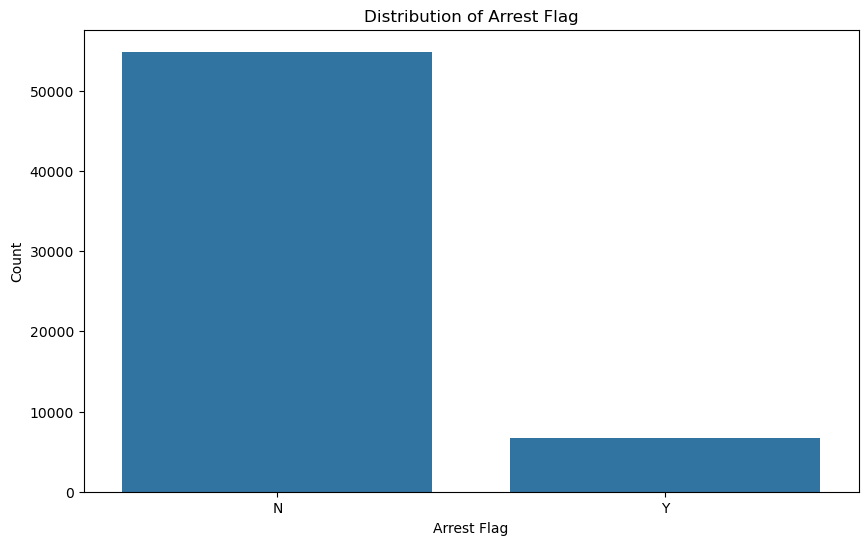

In [11]:
# Plot for Arrest Flag
plt.figure(figsize=(10, 6))
sns.countplot(data=seattle_data, x='Arrest Flag')
plt.title("Distribution of Arrest Flag")
plt.xlabel("Arrest Flag")
plt.ylabel("Count")
plt.savefig('./images/Distribution_of_arrests.png')
plt.show()


This shows the count of each class in Arrest Flag. A large difference in counts between classes indicates an imbalance.



I filtered the dataset to reflect cases that led to an arrest, but what cases are considered to be officer initiated stops, and what cases are calls into the department?

In [12]:
# for value in arrest_data['Initial Call Type']:
#     print(value)


The code above displays all categories within the 'Initial Call Type' Column. 

**Please Note**: This is a long list, uncomment the code if you're interesting in examining the list yourself.

I used this in order to determine which inicident can lead to a an officer initiating a stop.

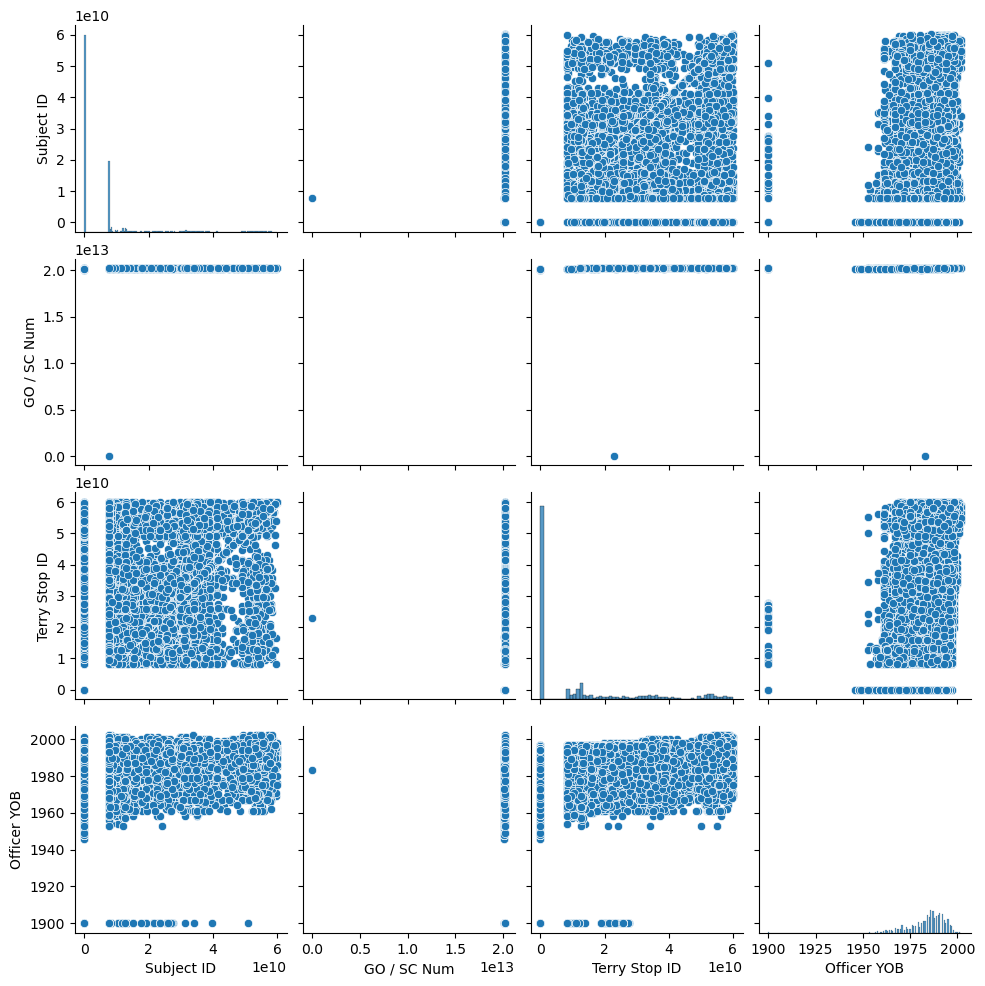

In [13]:
sns.pairplot(seattle_data)

### Data Preparation 

We'll start with create a subset of the data with arrests that were made.

In [14]:
arrest_data = seattle_data[seattle_data['Arrest Flag'] == 'Y']
arrest_data.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
3       56 and Above  12770971382  20200000175799    13267969395   
13           26 - 35   7727677416  20200000162912    13175704162   
35           18 - 25  31629644948  20220000135691    34067259361   
38           26 - 35  56845206186  20240000196562    57680658476   
55           36 - 45   7704469768  20190000454001    12034401373   

   Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
3           Arrest           -       7266         1976              M   
13          Arrest           -       8644         1995              M   
35          Arrest           -       8554         1990              M   
38          Arrest           -       8874         1998              M   
55          Arrest           -       8626         1992              M   

         Officer Race  ...     Reported Time               Initial Call Type  \
3               White  ...  11:17:19.0000000  ASLT - CRITICAL (NO SHOOTINGS)   
13  Two or More Races  ...  22:29:44.0000000                        TRESPASS   
35              White  ...  09:38:37.0000000              ASLT - DV CRITICAL   
38           Hispanic  ...  01:36:07.0000000       DISTURBANCE - DV CRITICAL   
55              White  ...  10:56:31.0000000   FIGHT - CRITICAL WITH WEAPONS   

                                 Final Call Type                 Call Type  \
3                              --ASSAULTS, OTHER                       911   
13                          --PROWLER - TRESPASS  TELEPHONE OTHER, NOT 911   
35     --DV - ARGUMENTS, DISTURBANCE (NO ARREST)                       911   
38  --DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)                       911   
55                             --ASSAULTS, OTHER                    ONVIEW   

                                    Officer Squad Arrest Flag Frisk Flag  \
3               WEST PCT 1ST W - KING - PLATOON 1           Y          N   
13            NORTH PCT 3RD W - UNION - PLATOON 1           Y          N   
35       NORTH PCT 1ST W - BOY (JOHN) - PLATOON 1           Y          N   
38  EAST PCT 3RD W - GEORGE (CHARLIE) - PLATOON 1           Y          Y   
55              WEST PCT 1ST W - KING - PLATOON 1           Y          N   

   Precinct Sector Beat  
3      West      K   K1  
13    North      U   U1  
35    North      B   B1  
38     East      G   G1  
55     West      K   K2  

[5 rows x 23 columns]

This Dataframe creates a subset of the dataset where arrest occurred. This allows us to narrow down the number of rows.

In this case, we have a total 6704 cases.

In [15]:
# display the summary of the arrest data DataFrame

arrest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 3 to 61545
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         6704 non-null   object
 1   Subject ID                6704 non-null   int64 
 2   GO / SC Num               6704 non-null   int64 
 3   Terry Stop ID             6704 non-null   int64 
 4   Stop Resolution           6704 non-null   object
 5   Weapon Type               6704 non-null   object
 6   Officer ID                6704 non-null   object
 7   Officer YOB               6704 non-null   int64 
 8   Officer Gender            6704 non-null   object
 9   Officer Race              6704 non-null   object
 10  Subject Perceived Race    6704 non-null   object
 11  Subject Perceived Gender  6704 non-null   object
 12  Reported Date             6704 non-null   object
 13  Reported Time             6704 non-null   object
 14  Initial Call Type         67

In [16]:
# for value in arrest_data['Initial Call Type']:
#     print(value)


The code above displays all categories within the 'Initial Call Type' Column. 

**Please Note**: This is a long list, uncomment the code if you're interesting in examining the list yourself.

I used this in order to determine which inicident can lead to a an officer initiating a stop.

I filtered the dataset to reflect cases that led to an arrest, but what cases are considered to be officer initiated stops, and what cases are calls into the department?

Next, I'll filter within the arrest data to reflect whether stop was initiated by an officer, that led to an arrest.

In [17]:
# Looking at the data I want to filter Suspicious stops that led to an arrest

suspicious_arrest_rows = arrest_data[
    arrest_data['Initial Call Type'].str.contains('SUSPICIOUS', case=False, na=False) | 
    arrest_data['Initial Call Type'].str.contains('OFFICER INITIATED', case=False, na=False)
    ]
suspicious_arrest_rows.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
79            46 - 55   7728281151  20190000327584    10046252491   
180           26 - 35  52619384626  20240000265264    59380444371   
242           26 - 35  33402572267  20200000113510    12805603402   
446           36 - 45  11714916991  20200000073624    12662034397   
457            1 - 17  53074543169  20230000329931    53262900808   

    Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
79           Arrest           -       7758         1987              M   
180          Arrest           -       9001         1988              F   
242          Arrest           -       8556         1995              M   
446          Arrest           -       8404         1984              M   
457          Arrest           -       8725         1987              M   

    Officer Race  ...     Reported Time  \
79         White  ...  11:25:41.0000000   
180        Asian  ...  01:48:15.0000000   
242        White  ...  11:53:54.0000000   
446        White  ...  20:04:39.0000000   
457        White  ...  12:34:11.0000000   

                                Initial Call Type  \
79        SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
180  PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   
242       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
446       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
457       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   

                                  Final Call Type Call Type  \
79   --DV - ENFORCE COURT ORDER (ARREST MANDATED)    ONVIEW   
180           --PREMISE CHECKS - CRIME PREVENTION    ONVIEW   
242                           --THEFT - CAR PROWL       911   
446                   --WARRANT SERVICES - FELONY    ONVIEW   
457                    --AUTOMOBILES - AUTO THEFT       911   

                                 Officer Squad Arrest Flag Frisk Flag  \
79       EAST PCT 1ST W - E/G RELIEF (CHARLIE)           Y          N   
180            TRAINING - FIELD TRAINING SQUAD           Y          N   
242         WEST PCT 1ST W - DAVID - PLATOON 1           Y          N   
446  SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2           Y          N   
457          WEST PCT 2ND W - KING - PLATOON 1           Y          Y   

      Precinct Sector Beat  
79        East      G   G3  
180       West      K   K3  
242       West      D   D3  
446  Southwest      W   W3  
457       West      K   K1  

[5 rows x 23 columns]

In order to narrow down the data even further. I will filter the arrest dataset into a DataFrame where 'Inital call Type' includes keywords 'SUSPICIOUS' and 'OFFICER INITIATED'.

These incidents are most likely to be stops initiated by officers.

What classifies Suspicious activity? What factors play into someone falling under the scope of suspicion or suspicious activity? The amount of arrests made *795* suggest that not many incidents that are officer intiated lead to arrests.

Why stop them to begin with?

In [18]:
# display the count of occurrences of each unique value for 'Initial Call Type', 'Arrest Flag', and 'Frisk Flag'
print(suspicious_arrest_rows['Initial Call Type'].value_counts())
print()
print(suspicious_arrest_rows['Arrest Flag'].value_counts())
print()
print(suspicious_arrest_rows['Frisk Flag'].value_counts())

Initial Call Type
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT         345
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      340
TRAFFIC STOP - OFFICER INITIATED ONVIEW          91
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY     16
OBS - SUSPICIOUS PACKAGE                          3
Name: count, dtype: int64

Arrest Flag
Y    795
Name: count, dtype: int64

Frisk Flag
N    558
Y    237
Name: count, dtype: int64


In [19]:
suspicious_arrest_rows['Initial Call Type'].value_counts()

Initial Call Type
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT         345
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      340
TRAFFIC STOP - OFFICER INITIATED ONVIEW          91
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY     16
OBS - SUSPICIOUS PACKAGE                          3
Name: count, dtype: int64

In [20]:
suspicious_arrest_rows['Arrest Flag'].value_counts()

Arrest Flag
Y    795
Name: count, dtype: int64

In [21]:
suspicious_arrest_rows['Frisk Flag'].value_counts()

Frisk Flag
N    558
Y    237
Name: count, dtype: int64

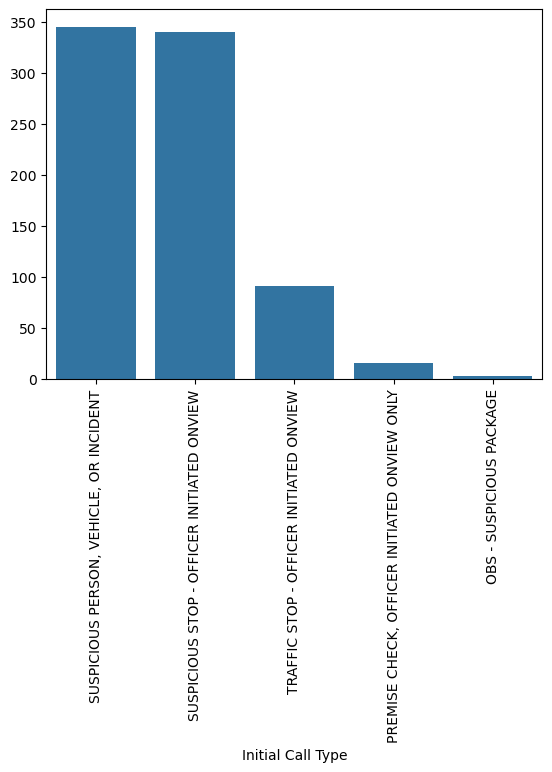

In [22]:
cur_values = suspicious_arrest_rows['Initial Call Type'].value_counts()


sns.barplot(x=cur_values.index, y=cur_values.values)
plt.xticks(rotation=90)
plt.show()

This visualization provides insight on the type of crime/incident and number of occurrences where an arrests was made.

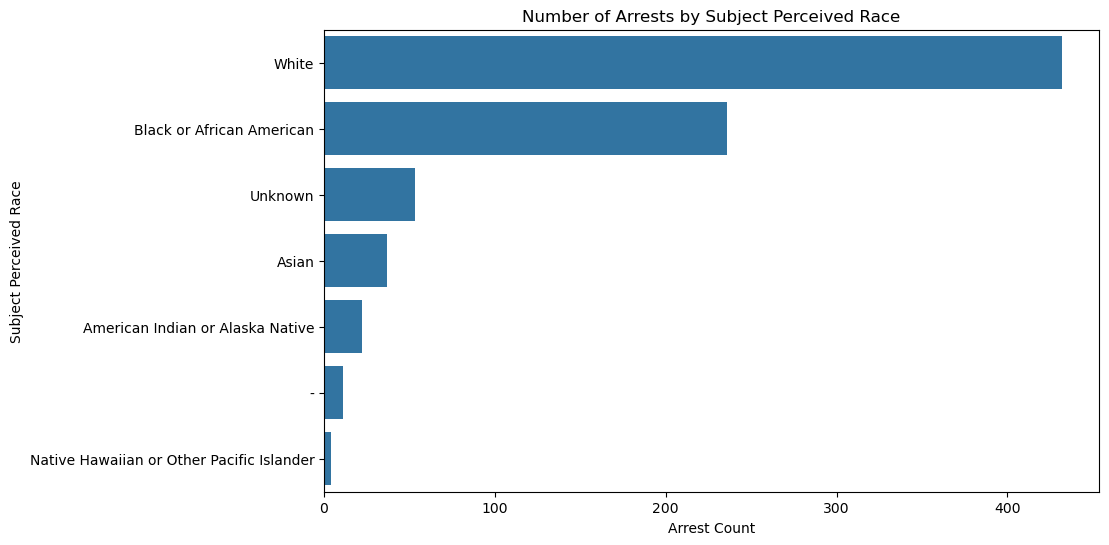

In [23]:
# Plot arrests by race
plt.figure(figsize=(10, 6))
sns.countplot(y="Subject Perceived Race", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Subject Perceived Race"].value_counts().index)
plt.title("Number of Arrests by Subject Perceived Race")
plt.xlabel("Arrest Count")
plt.ylabel("Subject Perceived Race")
plt.show()

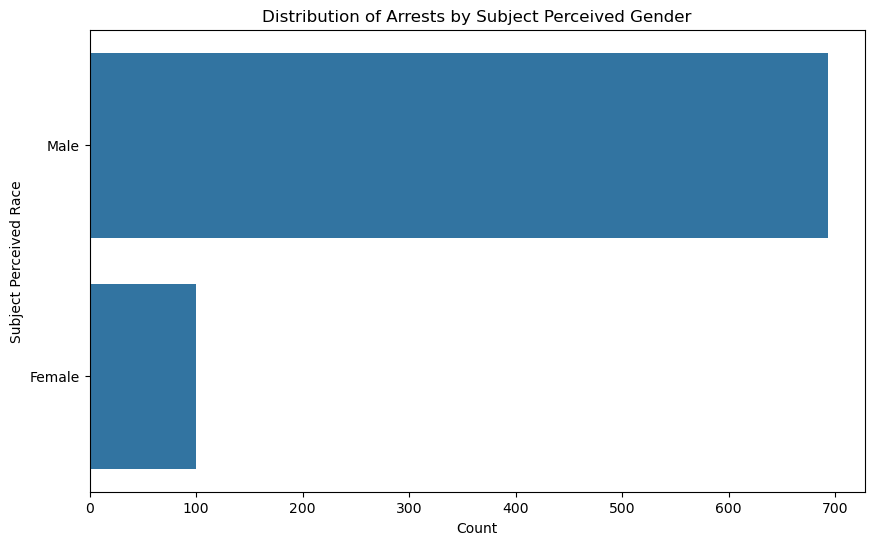

In [24]:
# Filter the data to include only "M" and "F"
filtered_data = suspicious_arrest_rows[suspicious_arrest_rows["Subject Perceived Gender"].isin(["Male", "Female"])]

plt.figure(figsize=(10, 6))
sns.countplot(y="Subject Perceived Gender", data=filtered_data, order=filtered_data["Subject Perceived Gender"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Gender")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.savefig('./images/Count_of_arrests_by_subject_percevied_gender')
plt.show()

These visualizations provide insight on arrest made based on the subjects gender and race. For this project, we will focus on this aspect of the model, but we will use it to make predictions.

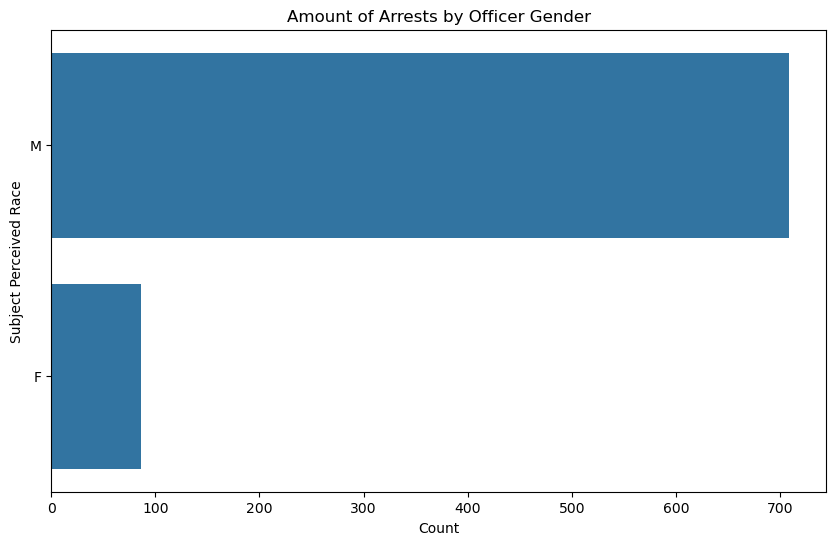

In [25]:
# Filter the data to include only "M" and "F"
filtered_data = suspicious_arrest_rows[suspicious_arrest_rows["Officer Gender"].isin(["M", "F"])]

# Plot arrests by race
plt.figure(figsize=(10, 6))
sns.countplot(y="Officer Gender", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Officer Gender"].value_counts().index)
plt.title("Amount of Arrests by Officer Gender")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.savefig('./images/Count_of_arrests_by_officer_gender')
plt.show()

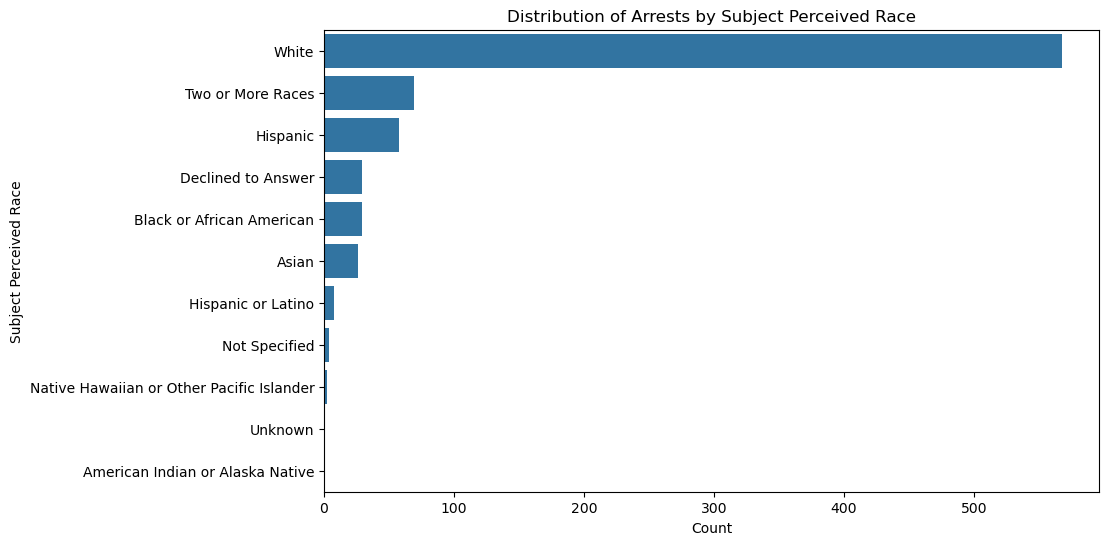

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Officer Race", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Officer Race"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Race")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.savefig('./images/Count_of_arrests_by_subject_percevied_race')
plt.show()

These visualizations breakdown the amount of arrests made based on the officers race and gender. Again, this is something we not discuss but will use in our model. Since the data does include arrests record for each officers race and gender.

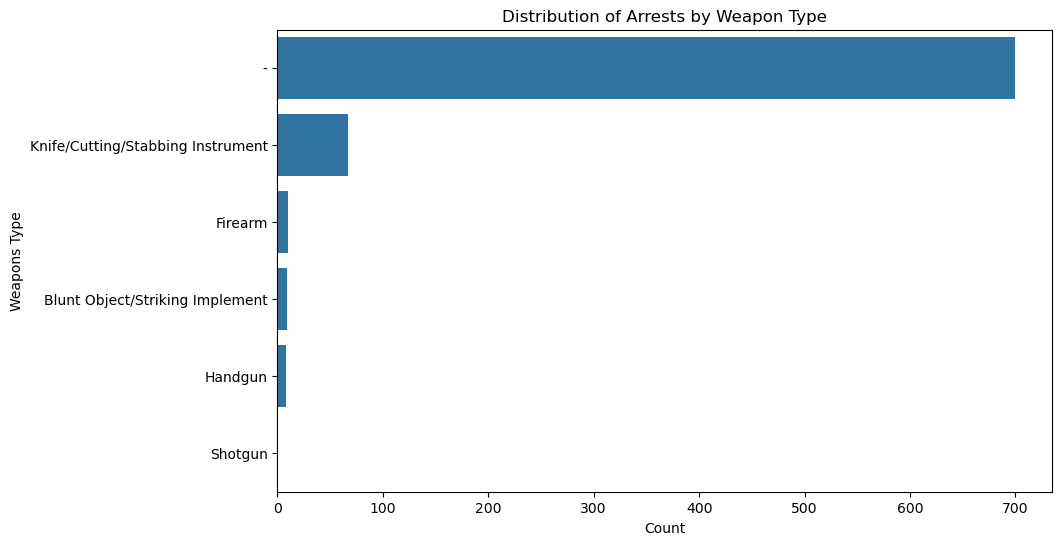

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Weapon Type", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Weapon Type"].value_counts().index)
plt.title("Distribution of Arrests by Weapon Type")
plt.xlabel("Count")
plt.ylabel("Weapons Type")
plt.show()

Finally, we have a visualization that demonstrates the weapon type confiscated during the arrests. As the vizualization shows, there is a large amount of null values for weapon type. This data would normally be useful, but since a large amount of data is missing. I may want to drop or exclude this from the model.

Since this dataset possesses cases that only led to arrests. We need to perform the same on the initial Dataset, this will allow me to focus on the cases related to the business problem.

Let's perform the same analysis on the seattle data. Narrowing the type of incident down to Suspcious activity that led to Officer stops 

In [28]:
seattle_data_copy = seattle_data.copy()
suspicious_rows = seattle_data_copy[seattle_data_copy['Initial Call Type'].str.contains('SUSPICIOUS', case=False, na=False) | 
                                    seattle_data['Initial Call Type'].str.contains('OFFICER INITIATED', case=False, na=False)]
suspicious_rows.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
6            26 - 35           -1  20150000172331          47882   
10           46 - 55   7729104232  20190000307817     9738671045   
11           18 - 25  44057474488  20230000091910    48861980260   
17           26 - 35           -1  20150000268950          69904   
21           46 - 55           -1  20170000235259         280796   

   Stop Resolution    Weapon Type Officer ID  Officer YOB Officer Gender  \
6   Offense Report            NaN       7673         1985              M   
10   Field Contact              -       8538         1994              M   
11   Field Contact              -       8599         1989              M   
17          Arrest  Firearm Other       7472         1981              M   
21  Offense Report            NaN       7773         1978              M   

         Officer Race  ...     Reported Time  \
6               White  ...  22:52:00.0000000   
10              White  ...  03:02:36.0000000   
11  Two or More Races  ...  16:32:57.0000000   
17              White  ...  19:25:00.0000000   
21              White  ...  22:12:00.0000000   

                             Initial Call Type  \
6      TRAFFIC STOP - OFFICER INITIATED ONVIEW   
10  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
11     TRAFFIC STOP - OFFICER INITIATED ONVIEW   
17  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
21  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   

                              Final Call Type Call Type  \
6   --DV - ARGUMENTS, DISTURBANCE (NO ARREST)    ONVIEW   
10           --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
11  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
17                --WARRANT SERVICES - FELONY    ONVIEW   
21   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   

                                Officer Squad Arrest Flag Frisk Flag  \
6           WEST PCT 2ND W - KING - PLATOON 1           N          N   
10                WEST PCT 3RD W - K/Q RELIEF           N          N   
11  SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2           N          N   
17                     EAST PCT 2ND W - BEATS           N          N   
21               NORTH PCT 3RD W - B/N RELIEF           N          N   

     Precinct Sector Beat  
6       North      N   N2  
10       West      K   K3  
11  Southwest      W   W1  
17       East      E   E1  
21      North      B   B2  

[5 rows x 23 columns]

In [29]:
# Display the count of occurences in the suspicious rows DF
print(suspicious_rows['Initial Call Type'].value_counts())
print()
print(suspicious_rows['Arrest Flag'].value_counts())
print()
print(suspicious_rows['Frisk Flag'].value_counts())

Initial Call Type
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      4850
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT         4255
TRAFFIC STOP - OFFICER INITIATED ONVIEW         1008
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY     245
OBS - SUSPICIOUS PACKAGE                           7
Name: count, dtype: int64

Arrest Flag
N    9570
Y     795
Name: count, dtype: int64

Frisk Flag
N    8562
Y    1751
-      52
Name: count, dtype: int64


In [30]:
print(suspicious_rows['Arrest Flag'].value_counts())
print()
print(suspicious_rows['Arrest Flag'].value_counts(normalize=True))

Arrest Flag
N    9570
Y     795
Name: count, dtype: int64

Arrest Flag
N    0.9233
Y    0.0767
Name: proportion, dtype: float64


In [31]:
print(suspicious_rows['Frisk Flag'].value_counts())
print()
print(suspicious_rows['Frisk Flag'].value_counts(normalize=True))

Frisk Flag
N    8562
Y    1751
-      52
Name: count, dtype: int64

Frisk Flag
N    0.826049
Y    0.168934
-    0.005017
Name: proportion, dtype: float64


I wanted to check the ratio in this dataset. Since the initial data has a ratio of 9:1. Looks to be the same with this data.

First, we will encode the target column since it's currently a categorical dtype, and then We'll split the data afterwards.

In [32]:
# seattle_data['Arrest Flag'].value_counts(normalize=True)
suspicious_rows[['Frisk Flag','Arrest Flag']].value_counts(normalize=True)

Frisk Flag  Arrest Flag
N           N              0.772214
Y           N              0.146068
N           Y              0.053835
Y           Y              0.022865
-           N              0.005017
Name: proportion, dtype: float64

In [33]:
suspicious_rows.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
6            26 - 35           -1  20150000172331          47882   
10           46 - 55   7729104232  20190000307817     9738671045   
11           18 - 25  44057474488  20230000091910    48861980260   
17           26 - 35           -1  20150000268950          69904   
21           46 - 55           -1  20170000235259         280796   

   Stop Resolution    Weapon Type Officer ID  Officer YOB Officer Gender  \
6   Offense Report            NaN       7673         1985              M   
10   Field Contact              -       8538         1994              M   
11   Field Contact              -       8599         1989              M   
17          Arrest  Firearm Other       7472         1981              M   
21  Offense Report            NaN       7773         1978              M   

         Officer Race  ...     Reported Time  \
6               White  ...  22:52:00.0000000   
10              White  ...  03:02:36.0000000   
11  Two or More Races  ...  16:32:57.0000000   
17              White  ...  19:25:00.0000000   
21              White  ...  22:12:00.0000000   

                             Initial Call Type  \
6      TRAFFIC STOP - OFFICER INITIATED ONVIEW   
10  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
11     TRAFFIC STOP - OFFICER INITIATED ONVIEW   
17  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
21  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   

                              Final Call Type Call Type  \
6   --DV - ARGUMENTS, DISTURBANCE (NO ARREST)    ONVIEW   
10           --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
11  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
17                --WARRANT SERVICES - FELONY    ONVIEW   
21   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   

                                Officer Squad Arrest Flag Frisk Flag  \
6           WEST PCT 2ND W - KING - PLATOON 1           N          N   
10                WEST PCT 3RD W - K/Q RELIEF           N          N   
11  SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2           N          N   
17                     EAST PCT 2ND W - BEATS           N          N   
21               NORTH PCT 3RD W - B/N RELIEF           N          N   

     Precinct Sector Beat  
6       North      N   N2  
10       West      K   K3  
11  Southwest      W   W1  
17       East      E   E1  
21      North      B   B2  

[5 rows x 23 columns]

As we saw earlier in the summary, the 'Weapon Type' COlumn is missing a significant amount of data. Let's see exactly how much of the data is missing.

In [34]:
missing_weapon_percentage_seadf = seattle_data['Weapon Type'].isna().sum() / len(seattle_data['Weapon Type'].isna()) * 100
missing_weapon_percentage_susdf = suspicious_rows['Weapon Type'].isna().sum() / len(suspicious_rows['Weapon Type'].isna()) * 100
print(f'Missing "Weapon Type" data in seattle dataset: {missing_weapon_percentage_seadf:.2f}%')
print(f'Missing "Weapon Type" data in suspicious dataset: {missing_weapon_percentage_susdf:.2f}%')

Missing "Weapon Type" data in seattle dataset: 52.90%
Missing "Weapon Type" data in suspicious dataset: 36.30%


So we see that more than 50% of the data from the original dataset of this feature is missing. Rather than fill in the missing values, we'll exclude it from the features we intend to use for our model.

We'll use the features 'Final Call Type','Stop Resolution','Officer Gender', 'Officer Race','Subject Perceived Gender', 'Subject Perceived Race', and'Frisk Flag' to perform our model as these will lead to a random stop and arrest. 

Dropping 'Weapon Type' as this column has more than 50% of its data missing. 

The initial numerical columns: 'Subject ID', 'GO/ SC Num', 'Terry Stop ID', 'Officer ID' are uniques key identifiers that won't have any correlation to our target.


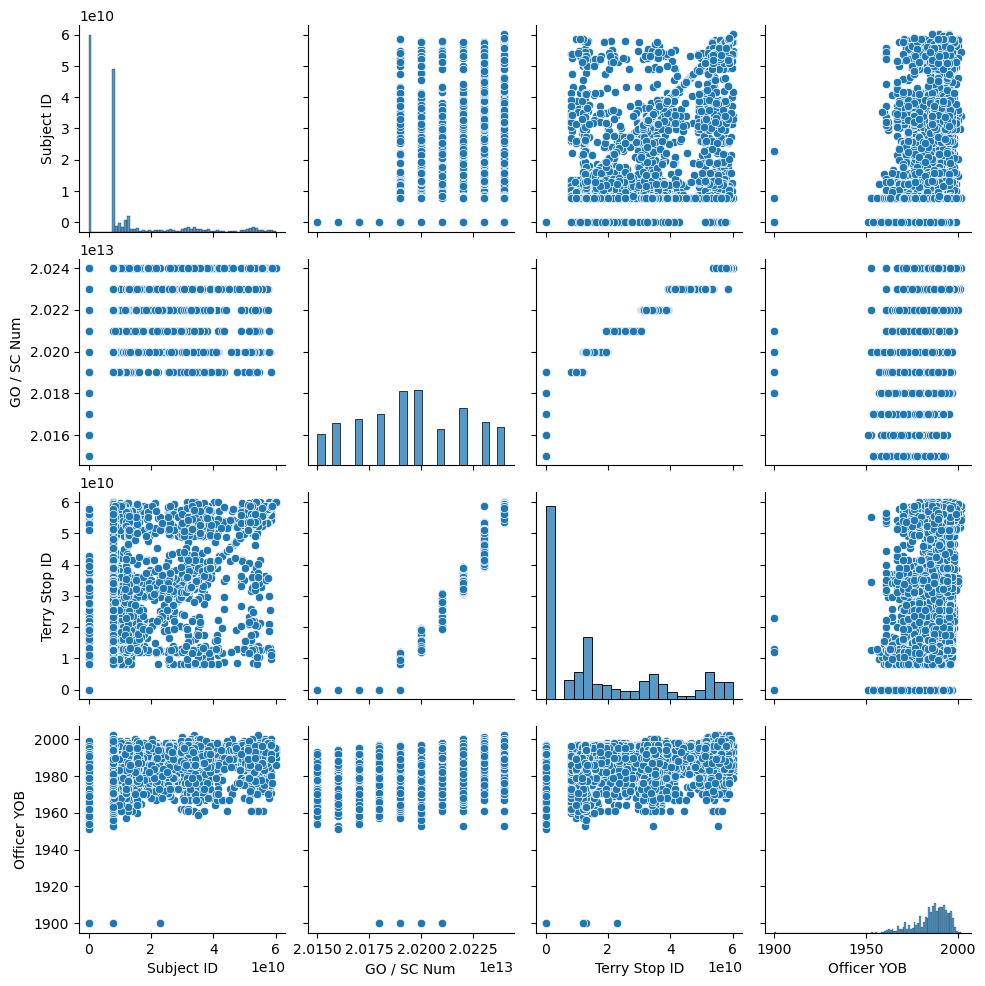

In [35]:
sns.pairplot(suspicious_rows)

The features used in the visualiations don't provide much use in the business problem. We'll exclude these as well.

In [36]:
seattle_data['Stop Resolution'].value_counts()

Stop Resolution
Field Contact               29927
Offense Report              15769
Arrest                      14912
Referred for Prosecution      728
Citation / Infraction         219
Name: count, dtype: int64

In [37]:
# replace null values in two DataFrames (seattle_data and suspicious_rows) with NaN
seattle_data = seattle_data.replace(['None','-','N/A','Unknown','Unable to Determine','Not Specified'],np.nan)
suspicious_rows= suspicious_rows.replace(['None','-','N/A','Unknown','Unable to Determine','Not Specified'], np.nan)

We will replace any Null values with NaN and then encode these values later one.

First, we will label encode the target columns and transform them into binary classification columns.

In [38]:
from sklearn.preprocessing import LabelEncoder

#create an instance of LabelEncoder
target_transform = LabelEncoder()

# Fit and transform train
seattle_data['Arrest Flag'] = target_transform.fit_transform(seattle_data['Arrest Flag'])
suspicious_rows['Arrest Flag'] = target_transform.fit_transform(suspicious_rows['Arrest Flag'])

print(seattle_data['Arrest Flag'].head())
print(suspicious_rows['Arrest Flag'].head())


0    0
1    0
2    0
3    1
4    0
Name: Arrest Flag, dtype: int32
6     0
10    0
11    0
17    0
21    0
Name: Arrest Flag, dtype: int32


This transformed both the original and the subset Dataframe allowing us to encode the features and gain the best possible outcome for the model.

In [39]:
suspicious_rows['Initial Call Type'].value_counts()

Initial Call Type
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      4850
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT         4255
TRAFFIC STOP - OFFICER INITIATED ONVIEW         1008
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY     245
OBS - SUSPICIOUS PACKAGE                           7
Name: count, dtype: int64

Taking a look at the 'Initial Call Type' Feature we narrow it down to 5 categories that will help make a more accurate prediction for our model.

In [40]:
# Seperate our features and target
features = ['Initial Call Type','Stop Resolution','Officer Gender', 'Officer Race','Subject Perceived Gender', 'Subject Perceived Race','Frisk Flag']
feature_data = seattle_data[features]
X = feature_data
y = seattle_data['Arrest Flag']


In [41]:
# train test split the features and target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, test_size=0.2, stratify=y)

In [42]:
print(f"X_train for the seattle dataset is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} colums.")
print(f"y_train for seattle dataset is a Series with {y_train.shape[0]} values.")

X_train for the seattle dataset is a DataFrame with 49244 rows and 7 colums.
y_train for seattle dataset is a Series with 49244 values.


Sanity check, to see if the rows match each other.

In [43]:
X_train.dtypes

Initial Call Type           object
Stop Resolution             object
Officer Gender              object
Officer Race                object
Subject Perceived Gender    object
Subject Perceived Race      object
Frisk Flag                  object
dtype: object

One thing I noticed within the data is that the naming convention. Let's change the column names to a more conventional style. I'll create a function that will for the columns.

In [44]:
def reformat_columns(data, return_type='dataframe'):
    '''Function that reformat the columns.
    adding an underscore to the naming convention and lowering the font'''
    if isinstance(data, pd.DataFrame):
        # Reformat columns for DataFrame
        formatted_columns = data.rename(columns=lambda x: x.replace(' ', '_').lower())
        if return_type == "dataframe":
            return formatted_columns
        elif return_type == "series":
            return formatted_columns.columns.to_series()
        else:
            raise ValueError("return_type must be either 'dataframe' or 'series' when data is a DataFrame.")
            
      # Check if the input is a Series
    elif isinstance(data, pd.Series):
        # Reformat the Series name if it has one
        formatted_columns = data.rename(data.name.replace(' ', '_').lower() if data.name else None)
    return formatted_columns

In [45]:
#Let's change the string style to a more conventional style
X_train = reformat_columns(X_train)
y_train = reformat_columns(y_train)
X_test = reformat_columns(X_test)
y_test = reformat_columns(y_test)
X_train.columns

Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')

Once we run our function on a X_train we can see the naming convention change.

I'll do the same with the target and tests columns.

In [46]:
y_train.name

'arrest_flag'

In [47]:
X_test.columns

Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')

In [48]:
y_test.name

'arrest_flag'

Lets start by imputing the data, this will account for any missing values in the train and test set.

In [49]:
imputer = SimpleImputer(strategy='constant', fill_value=None)
imputer.fit(X_train)


# transform the features
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_imputed_df = pd.DataFrame(X_train_imputed,
                                columns=X_train.columns, 
                                index=X_train.index
                                )


X_test_imputed_df = pd.DataFrame(X_test_imputed, 
                                columns=X_test.columns, 
                                index=X_test.index
                                )

    



In [50]:
X_train_imputed_df.head()

initial_call_type stop_resolution  \
5168                                    SHOPLIFT - THEFT          Arrest   
55797        BURG - RESD (INCL UNOCC STRUCTURES ON PROP)          Arrest   
45053            SUSPICIOUS PERSON, VEHICLE, OR INCIDENT          Arrest   
60562  OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...   Field Contact   
54979                 OBS - DOWN - CHECK FOR PERSON DOWN  Offense Report   

      officer_gender officer_race subject_perceived_gender  \
5168               M        White                     Male   
55797              F        White                     Male   
45053              M        White                     Male   
60562              M     Hispanic                     Male   
54979              M        White                   Female   

          subject_perceived_race frisk_flag  
5168   Black or African American          N  
55797  Black or African American          N  
45053  Black or African American          Y  
60562              missing_value          Y  
54979                      White          N

In [51]:
X_train_imputed_df['stop_resolution'].value_counts()

stop_resolution
Field Contact               23912
Offense Report              12624
Arrest                      11954
Referred for Prosecution      580
Citation / Infraction         174
Name: count, dtype: int64

In [52]:
# for val in X_train_imputed_df.columns:
#     print(X_train[[val]].value_counts().sort_values(ascending=True))
#     print()

The above code checks the unique values for the entire dataset within the train. Uncomment the code if you're curious to take a look.

We'll perform one-hot encoding on the categorical variables

#### Normalize the target for the train and test

In [53]:
y_train

5168     0
55797    1
45053    0
60562    0
54979    0
        ..
24303    0
6810     1
19193    0
49688    0
15130    0
Name: arrest_flag, Length: 49244, dtype: int32

0 = No, 1 = Yes

This allowed us to encode our target to a binary classification?

In [54]:

def one_hot_encode(train_data, test_data, drop='first', handle_unknown='ignore'):
    """
    Perform one-hot encoding on the categorical columns of train and test datasets.
    
    Parameters:
    - train_data (pd.DataFrame): The training dataset with categorical columns.
    - test_data (pd.DataFrame): The test dataset with categorical columns.
    - drop (str): Specifies a method to drop one of the levels. Default is 'first'.
    - handle_unknown (str): Specifies how to handle unknown categories. Default is 'ignore'.
    
    Returns:
    - train_encoded_df (pd.DataFrame): One-hot encoded training data as a DataFrame.
    - test_encoded_df (pd.DataFrame): One-hot encoded test data as a DataFrame.
    - encoded_columns (list): List of encoded column names.
    """
    # One-Hot Encoding on the ordinal encoded training data
    
    ohe = OneHotEncoder(sparse_output=False, drop=drop, handle_unknown=handle_unknown)
    
    # Ensure only the columns without unknown values are passed to OneHotEncoder
    X_train_encoder = ohe.fit_transform(train_data)
    
    # Apply One-Hot Encoding to the test data
    X_test_encoder = ohe.transform(test_data)
    
    # Get the encoded feature names
    encoded_columns = ohe.get_feature_names_out(input_features=train_data.columns)
    
    # Convert to DataFrames
    train_encoded_df = pd.DataFrame(X_train_encoder, columns=encoded_columns, index=train_data.index)
    test_encoded_df = pd.DataFrame(X_test_encoder, columns=encoded_columns, index=test_data.index)

    return train_encoded_df, test_encoded_df, encoded_columns

X_train_encoded_df, X_test_encoded_df, encoded_columns = one_hot_encode(X_train_imputed_df, X_test_imputed_df)


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Rather than going through the steps of performing one-hot encoding over and over. I created a function that can perform the process and save some time.

Let's check the outcome and see if the function worked.

In [55]:
X_test_encoded_df

initial_call_type_-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)  \
760                                                  0.0                  
13752                                                0.0                  
52693                                                0.0                  
35199                                                0.0                  
10135                                                0.0                  
...                                                  ...                  
28238                                                0.0                  
11261                                                0.0                  
1964                                                 0.0                  
9707                                                 0.0                  
21653                                                0.0                  

       initial_call_type_-ASSIGNED DUTY - STAKEOUT  \
760                                            0.0   
13752                                          0.0   
52693                                          0.0   
35199                                          0.0   
10135                                          0.0   
...                                            ...   
28238                                          0.0   
11261                                          0.0   
1964                                           0.0   
9707                                           0.0   
21653                                          0.0   

       initial_call_type_ABDUCTION - CRITICAL  \
760                                       0.0   
13752                                     0.0   
52693                                     0.0   
35199                                     0.0   
10135                                     0.0   
...                                       ...   
28238                                     0.0   
11261                                     0.0   
1964                                      0.0   
9707                                      0.0   
21653                                     0.0   

       initial_call_type_ABDUCTION - NO KNOWN KIDNAPPING  \
760                                                  0.0   
13752                                                0.0   
52693                                                0.0   
35199                                                0.0   
10135                                                0.0   
...                                                  ...   
28238                                                0.0   
11261                                                0.0   
1964                                                 0.0   
9707                                                 0.0   
21653                                                0.0   

       initial_call_type_ALARM - ATM MACHINE, FREE STANDING  \
760                                                  0.0      
13752                                                0.0      
52693                                                0.0      
35199                                                0.0      
10135                                                0.0      
...                                                  ...      
28238                                                0.0      
11261                                                0.0      
1964                                                 0.0      
9707                                                 0.0      
21653                                                0.0      

       initial_call_type_ALARM - AUDIBLE AUTOMOBILE (UNOCC/ANTI-THEFT)  \
760                                                  0.0                 
13752                                                0.0                 
52693                                                0.0                 
35199                                                0.0                 
10135               

In [56]:
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train_encoded_df)

# X_test_scaled = scaler.transform(X_test_encoded_df)

# X_train_scaled_df = pd.DataFrame(X_train_scaled, 
#                                  columns=X_train_encoded_df.columns,
#                                  index=X_train_encoded_df.index)

# X_test_scaled_df = pd.DataFrame(X_test_encoded_df,
#                                 columns=X_test_encoded_df.columns,
#                                 index=X_test_encoded_df.index)

# X_train_scaled_df

Try to find the best correlation between the features and the target

In [57]:
target_correlation = X_train_encoded_df.corrwith(y_train)

# Convert to DataFrame for easier visualization
correlation_df = target_correlation.to_frame(name="Correlation with Target")

# Get the top 10 features with the closest (highest absolute) correlation to the target
top_10_features = correlation_df['Correlation with Target'].abs().nlargest(10).index
top_10_correlation_df = correlation_df.loc[top_10_features].sort_values(by="Correlation with Target", ascending=False)
top_10_correlation_df

Correlation with Target
frisk_flag_Y                                                       0.103170
initial_call_type_ASLT - DV CRITICAL                               0.062409
initial_call_type_SHOPLIFT - THEFT                                 0.060982
initial_call_type_ASLT - CRITICAL (NO SHOOTINGS)                   0.053802
initial_call_type_THREATS (INCLS IN-PERSON/BY P...                 0.052643
officer_race_White                                                -0.041928
subject_perceived_race_Hispanic                                   -0.059095
initial_call_type_missing_value                                   -0.153833
stop_resolution_Offense Report                                    -0.205260
stop_resolution_Field Contact                                     -0.339656

calculating and analyzing the correlation between the features in the X_train_encoded_df DataFrame and the target variable y_train. 

I then select and displays the top 10 features that have the strongest (absolute) correlation with the target.

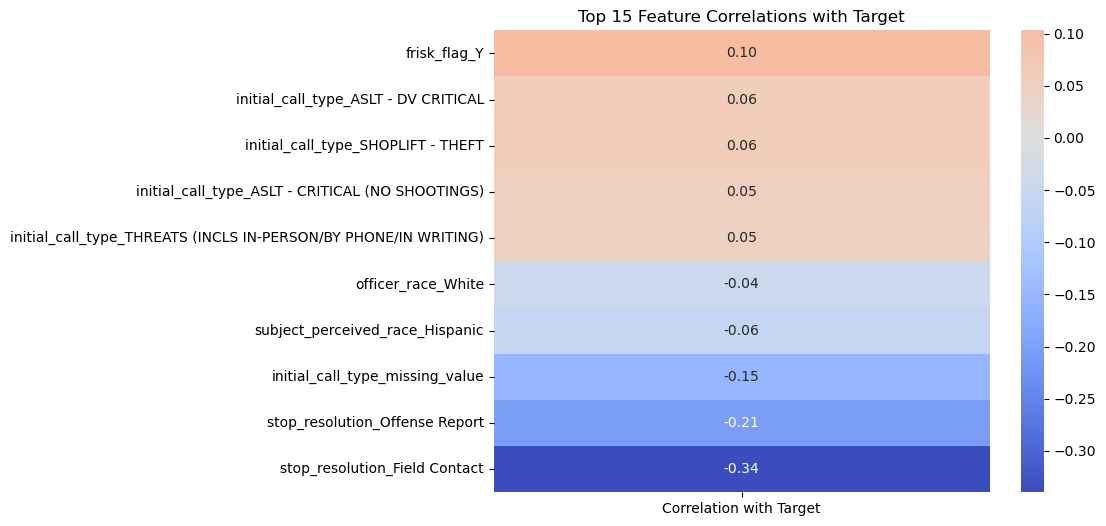

In [58]:
# Plot the correlations of top 5 features
plt.figure(figsize=(8, 6))
sns.heatmap(top_10_correlation_df, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
plt.title("Top 15 Feature Correlations with Target")
plt.show()

# Modeling

### Baseline Model

We will use a Logistic Regression to start to have a base and see the differences as we create or model.

In [59]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    #  Train the model on the encoded training data (using the entire dataset, not resampled data here)
    model.fit(X_train, y_train)

    # Predict the target values (labels) on the test dataset
    y_predict = model.predict(X_test)



    # Calculate evaluation metrics
    baseline_model_accuracy = accuracy_score(y_test, y_predict)
    baseline_model_precision = precision_score(y_test, y_predict)
    baseline_model_recall = recall_score(y_test, y_predict)
    baseline_model_f1 = f1_score(y_test, y_predict, pos_label=1)

    # Calculate predicted probabilities for positive class (class 1)
    y_probabilites = model.predict_proba(X_test)[:,1]

    # Compute ROC curve, which provides a visual representation of model performance across different thresholds
    false_positive, true_positive, thresholds = roc_curve(y_test, y_probabilites)

    # Calculate the area under the ROC curve (AUC), which measures the overall performance of the classifier
    roc_auc = auc(false_positive, true_positive)



    # Display results
    print('Logistic Regression Metrics\n')
    print(f"Accuracy: {baseline_model_accuracy*100:.2f}%")
    print(f"Precision: {baseline_model_precision*100:.2f}%")
    print(f"Recall:  {baseline_model_recall*100:.2f}%")
    print(f"F1 Score: {baseline_model_f1*100:.2f}%")
    print(f"ROC AUC Score: {roc_auc*100:.2f}%")
    print()

    # Compute the confusion matrix to see the counts of true positives
    # false positives, false negatives, and true negatives
    baseline_model_conf_matrix = confusion_matrix(y_test, y_predict)
    print("Confusion Matrix:\n",baseline_model_conf_matrix)


    # Display the confusion matrix as a plot for better visualization
    ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

I created a function for our baseline logistic regression model as it will save us time when repeating tests for addtional models.

Logistic Regression Metrics

Accuracy: 91.55%
Precision: 63.82%
Recall:  51.83%
F1 Score: 57.20%
ROC AUC Score: 95.69%

Confusion Matrix:
 [[10576   394]
 [  646   695]]


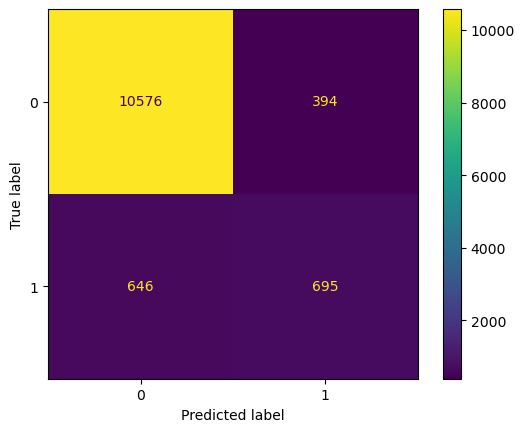

In [60]:
# Initialize the Logistic Regression model with a fixed random state for reproducibility
baseline_model = LogisticRegression(random_state=23)

#call the function
evaluate_model(baseline_model, X_train_encoded_df, y_train, X_test_encoded_df, y_test)

Our Baseline Model is not able to predict any positive or false cases. As stated earlier, this may be due to the great imbalance of negative cases within this dataset.

In [61]:
y_predict = baseline_model.predict(X_test_encoded_df)
# Calculate predicted probabilities for positive class (class 1)
y_probabilites = baseline_model.predict_proba(X_test_encoded_df)[:,1]

# Compute ROC curve, which provides a visual representation of model performance across different thresholds
false_positive, true_positive, thresholds = roc_curve(y_test, y_probabilites)

# Calculate the area under the ROC curve (AUC), which measures the overall performance of the classifier
roc_auc = auc(false_positive, true_positive)

## Logisitic Visualizations

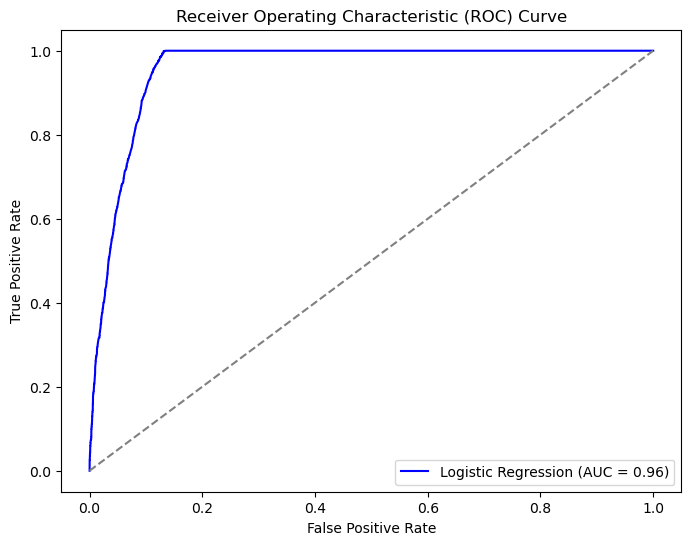

ROC AUC Score: 0.9568891363266505


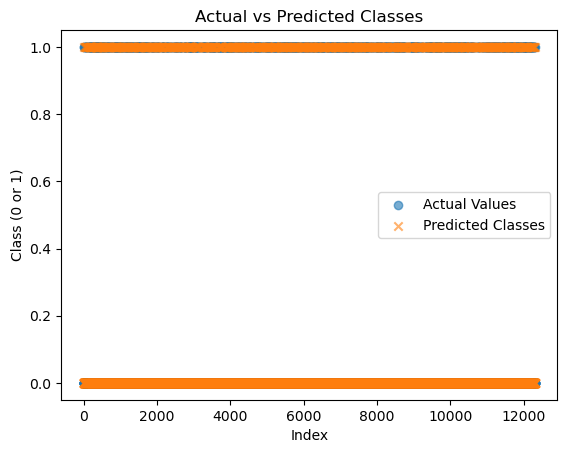

In [62]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive, true_positive, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC score
print(f"ROC AUC Score: {roc_auc}")

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_predict > 0.5).astype(int)  

plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', alpha=0.6)
plt.scatter(range(len(y_pred_classes)), y_pred_classes, label='Predicted Classes', marker='x', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.savefig('./images/LogisticROC_Curve.png')
plt.show()

TP: 695

FP: 394

FN: 646 (All instances of the minority calss are misclassified)

TN: 10576 (Correctly predicting Majority Class)

### Baseline Metrics

The model is completely ignoring the minority class within the baseline. Inidicating high bias towards the majority class, in this case (No arrests made)

These metrics provide the following:

* Accuracy: 92%

An Accuracy score of  87%. As stated above, this dataset is heavily imbalanced with a ratio of 9:1. 

* Precision: 64%

Precision prediction means the model cannot make predictions on True Positives or False positive values. It can't make a the distinction between if an actual arrest was made or an arrest was made but it shouldn't have occured.

* Recall: 52%

This means that the model is not predicting the number of the actual positive cases, which are indicated as Arrests made.

* F1 SCore: 57%

Because precision is 0 and recall is, by default, F1 is 0 since it's a combination of the two.

* ROC AUC Score: 95%

This is excellent, this means the model is very good at distinguishing between the positive and negative classes. A strong performance overall.



**Accuracy** is 92%, which validates the choice to fix the imbalance mentioned earlier

**Recall** is predicting 52% of True Positive Cases, meaning the model is not doing a good job of predicting cases that are actual arrests.

**ROC AUC** is excellent, showing that the model has a good ability to distinguish between classes based on predicted probability. However, this does not mean the model is making correct predictions for th eminority class.

**Our Baseline model provides us with bad metrics to use for our predictions. The purpose of this classification is to determine if it can predict a True Positive arrest based on the features chosen. This model does not provid us with any information to make those predictions.**


Next we will use a Decision Tree Classifier to improve the models performance and build on our baseline. In an attempt to try and get a balanced prediction for both classes, I'll use 'Class weight' again to try to balance the data.

Training: 0.9057550158394931
Test: 0.8865242466087239

Decision Tree Performance:

Accuracy: 88.65%

Precision: 48.84%

Recall: 88.29%

F1-Score: 62.90%


Confusion Matrix
[[9730 1240]
 [ 157 1184]]


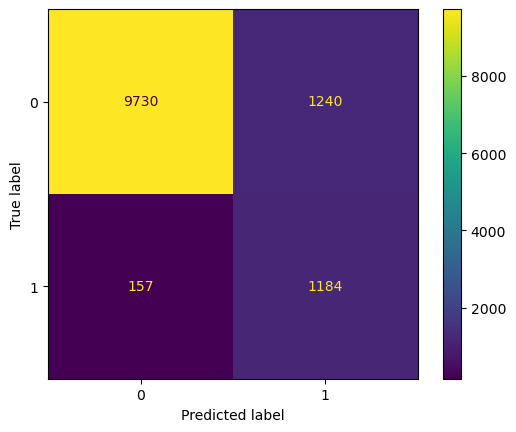

In [63]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=33, class_weight='balanced').fit(X_train_encoded_df, y_train)


# print to see the results of the tree. This will help us detrmine if the model will overfit or underfit
print(f'Training: {dt.score(X_train_encoded_df, y_train)}')
print(f'Test: {dt.score(X_test_encoded_df, y_test)}\n')

#make predictions
y_pred = dt.predict(X_test_encoded_df)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

confus_matrix = confusion_matrix(y_test,y_pred)

print("Decision Tree Performance:\n")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print(f"Precision: {precision * 100:.2f}%\n")
print(f"Recall: {recall * 100:.2f}%\n")
print(f"F1-Score: {f1 * 100:.2f}%\n")
print("\nConfusion Matrix")
print(confus_matrix)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

The **R-squared** value of 91% of the variance for training data. The model is fitting the training data very well.

The test score explains 87% of the variance in the test data. This is still a good score, but it is less than the training data. Indicating some overfitting.

The model fits training data very well but generalizes slightly less well to unseen data.

We see an improvement in the model, where the model is actually predicting the minorty class

**Recall** is reflecting 83.82%. Means the model succesfully identifies a large portion of True Positive cases/Minority class(Arrests Made). 


**Accuracy** 86.48%. This is a reflection of the imbalance within the data as accuracy is reflecting the majority class because there are more samples. 

The model has become more sensitive to the minority class (class 1), achieving high recall but at the expense of some false positives, as seen in the precision score.

This tradeoff is typical when dealing with imbalanced datasets. The "balanced" class weight helps the decision tree prioritize both classes more equally.

In [64]:
# check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
print(f'{roc_auc * 100:.2f}%')

88.49%


The AUC suggests that the model overall performance for all the data regarding True Positive Rate (TPR) and False Positive Rate (FPR).

With a rate of 92%, this indicates that it can distinguish between arrest being made or not. What are True Positives and what are False Positives. ie. someone arrested or not

We'll attempt some Hyperparameter Tuning and run the metrics again.

### Adjusting Hyperparameters

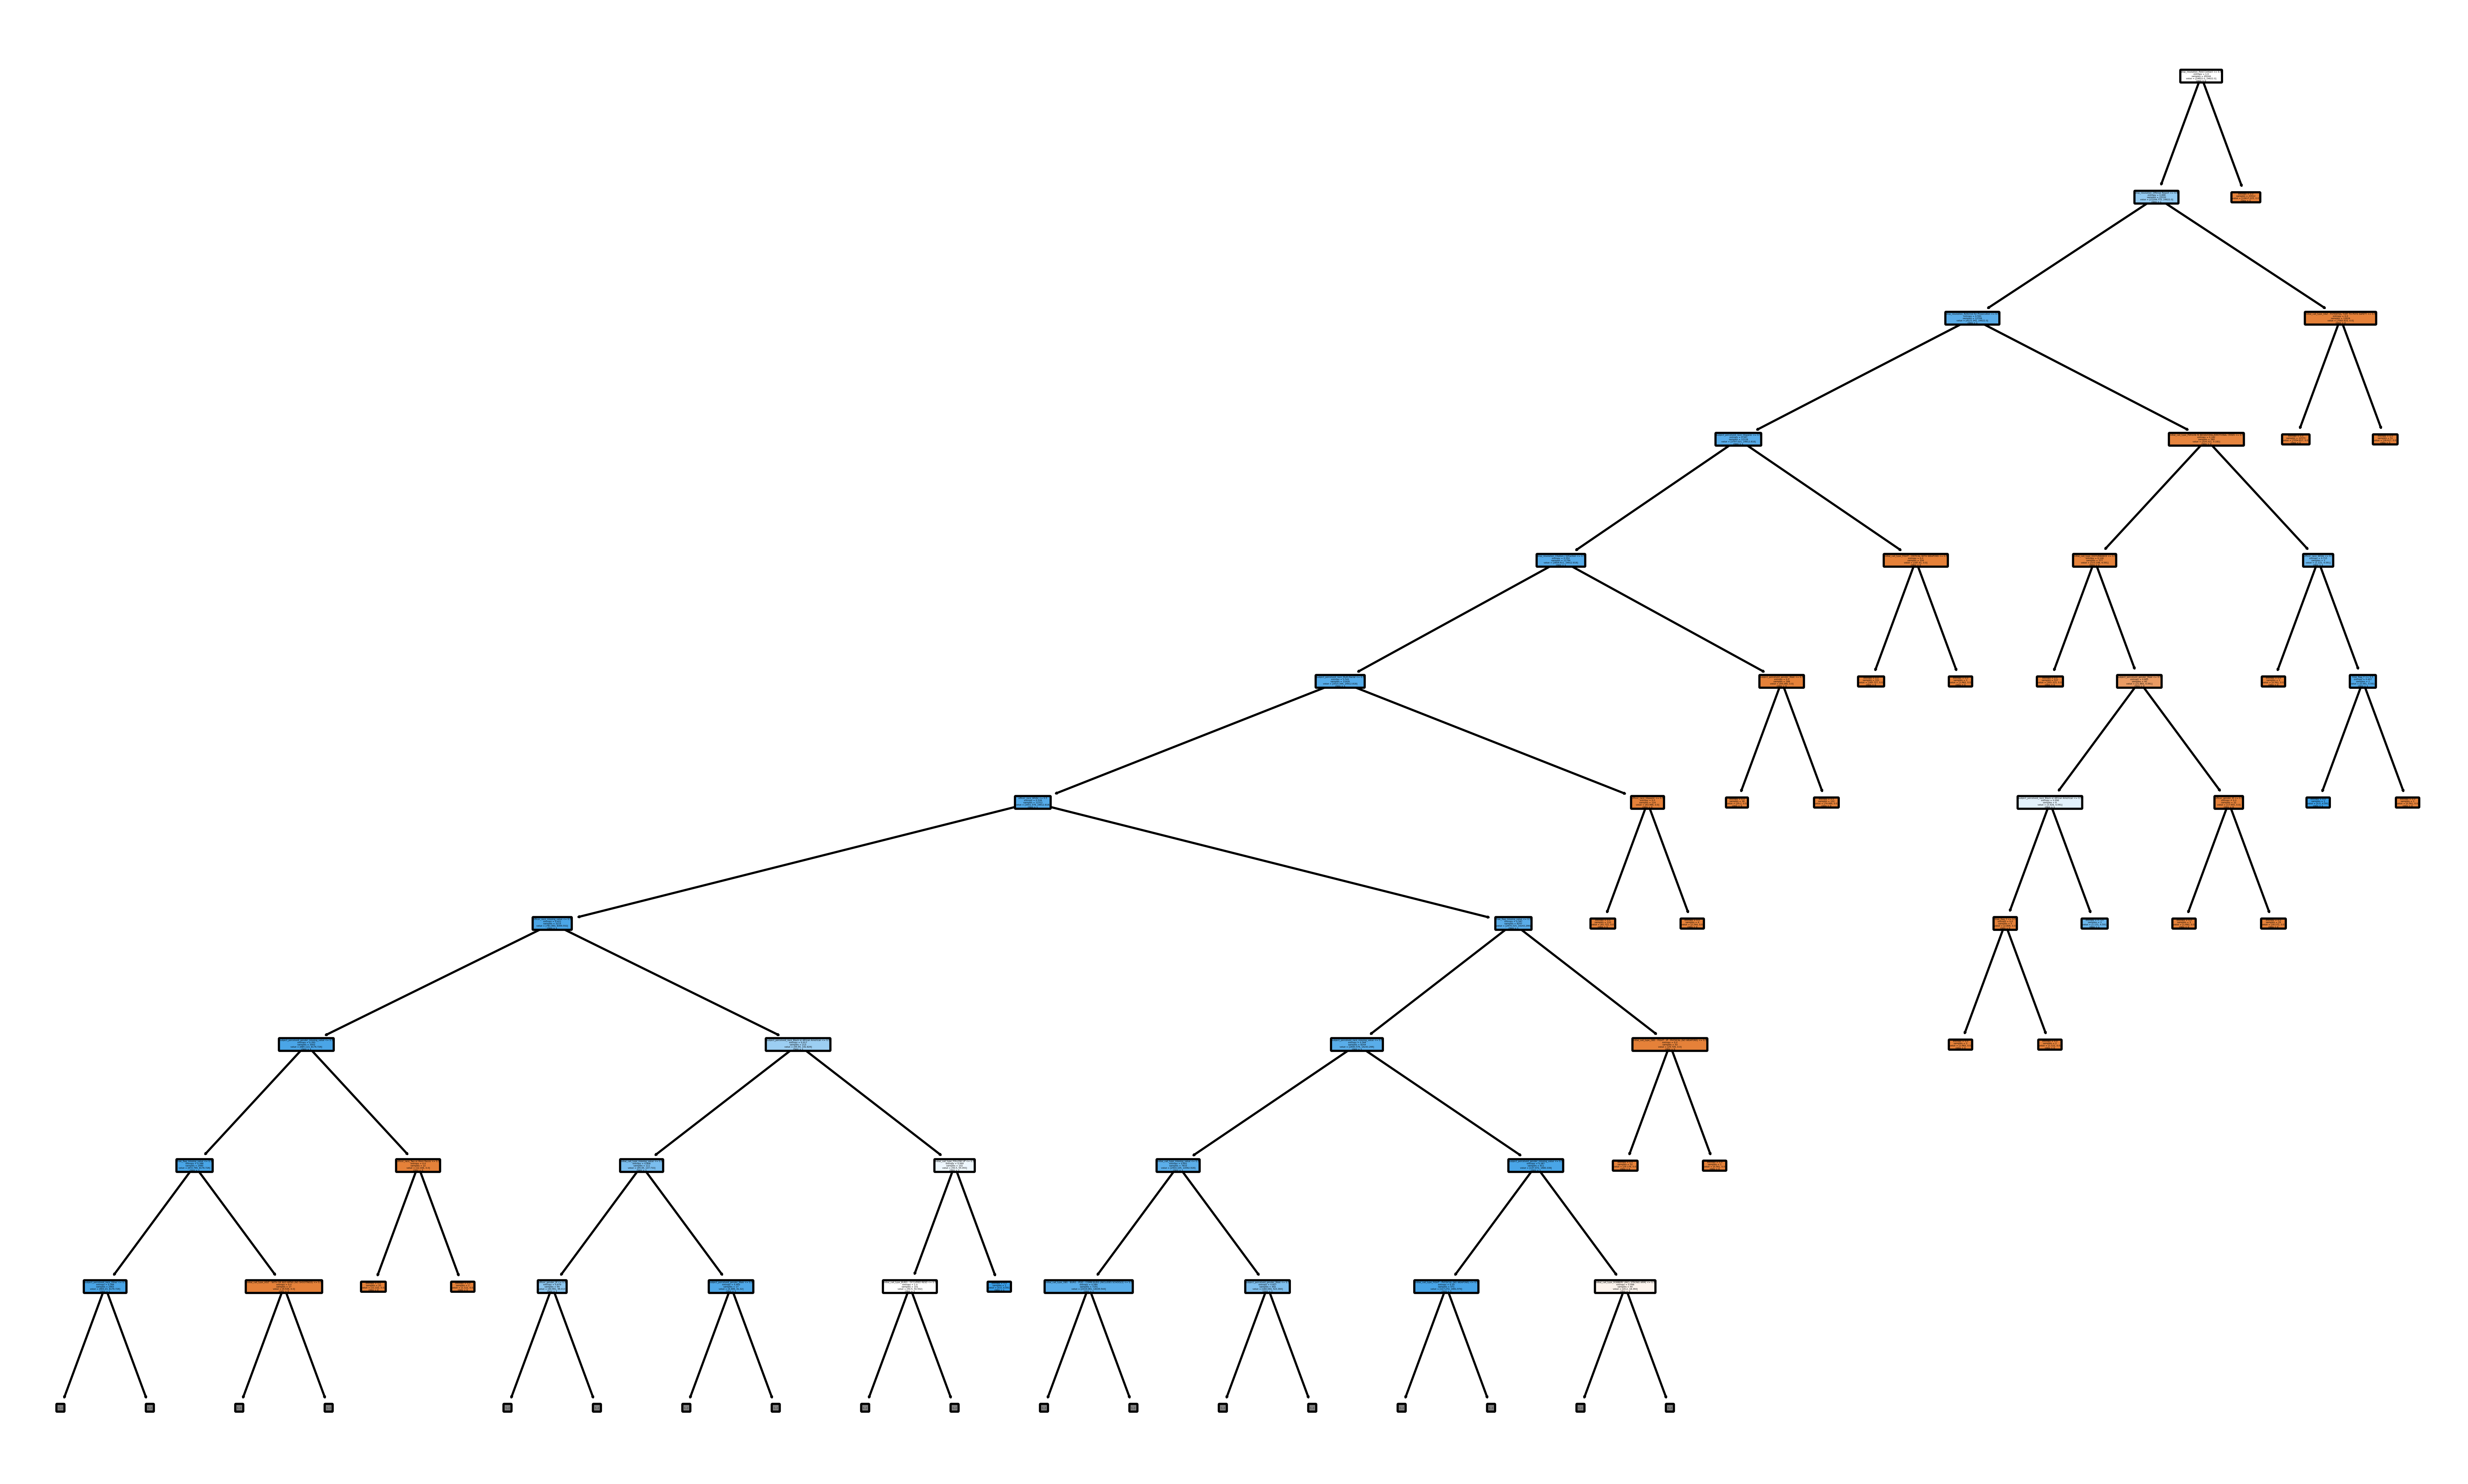

In [65]:
# from sklearn import tree
plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(dt,
              feature_names=X_train_encoded_df.columns,
              class_names=np.unique(y_train).astype('str'),
              filled=True,
              rounded=True,
              max_depth=10)
plt.savefig('./images/Logistic_plot_tree.png')
plt.show()

I visualized the decision tree to understand the model’s decision-making process, diagnose potential issues like overfitting or underfitting, evaluate feature importance, improve model performance, and communicate findings to stakeholders.

Let's tweak some hyperparameters and see fi we get a better performing model.

We'll start by tuning the max depth for the Classifier

We see a change in the F1 Score showing a little over half of the data is somewhat balanced, but we still get a low F1 score. I'll change the threshold and test it again.

In [66]:
def tune_decision_tree(X_train, y_train, X_test, y_test, max_depths=[5, 10, 15], min_samples_splits=[2, 5, 10], min_samples_leaves=[1, 2, 4]):
    """
    Tunes the hyperparameters of a Decision Tree model by iterating over different combinations of hyperparameters.
    
    Parameters:
    - X_train: Training feature dataset
    - y_train: Training target dataset
    - X_test: Test feature dataset
    - y_test: Test target dataset
    - max_depths: List of possible max_depth values for the Decision Tree
    - min_samples_splits: List of possible min_samples_split values for the Decision Tree
    - min_samples_leaves: List of possible min_samples_leaf values for the Decision Tree
    
    Returns:
    - best_f1: Best F1 score achieved during tuning
    - best_params: Dictionary with the best hyperparameters
    """
    
    best_recall = -np.inf  # Initialize best F1 score
    best_params = {}   # Initialize dictionary to store the best hyperparameters
    
    # Iterate over the combinations of hyperparameters
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leaves:
                
                # Instantiate and train the model with the current set of hyperparameters
                model = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    class_weight='balanced',
                    random_state=33
                ).fit(X_train, y_train)
                
                # Make predictions
                y_prediction = model.predict(X_test)
                
                # Calculate Recall Score
                recall = recall_score(y_test, y_prediction)
                
                # Update best F1 score and parameters if necessary
                if recall > best_recall:
                    best_recall = recall
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }
    
    # Return the best F1 score and corresponding hyperparameters
    return best_recall, best_params


# Example usage
best_recall, best_params = tune_decision_tree(X_train_encoded_df, y_train, X_test_encoded_df, y_test)
print(f'Best Recall-Score: {best_recall}')
print(f'Best Parameters: {best_params}')

Best Recall-Score: 1.0
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}


This function is to automate the hyperparameter tuning process for a Decision Tree model to find the combination of hyperparameters that produces the best performance, as measured by the Recall Score.

As a sanity check, we double check the process for each hyperparameter

Max Depth: 5, Precision Score: 0.4581482746839768, Recall Score: 1.0
Max Depth: 6, Precision Score: 0.46645591851071305, Recall Score: 0.9903057419835943
Max Depth: 7, Precision Score: 0.4681001057455058, Recall Score: 0.9903057419835943
Max Depth: 8, Precision Score: 0.47837058399423216, Recall Score: 0.9895600298284862
Max Depth: 9, Precision Score: 0.4903954802259887, Recall Score: 0.970917225950783
Max Depth: 10, Precision Score: 0.49131419939577037, Recall Score: 0.9701715137956749
Max Depth: 11, Precision Score: 0.49449297379415114, Recall Score: 0.970917225950783
Max Depth: 12, Precision Score: 0.49467680608365017, Recall Score: 0.9701715137956749
Max Depth: 13, Precision Score: 0.4958079268292683, Recall Score: 0.9701715137956749
Max Depth: 14, Precision Score: 0.49712753734201454, Recall Score: 0.9679343773303505
Max Depth: 15, Precision Score: 0.5969257045260461, Recall Score: 0.5212527964205816


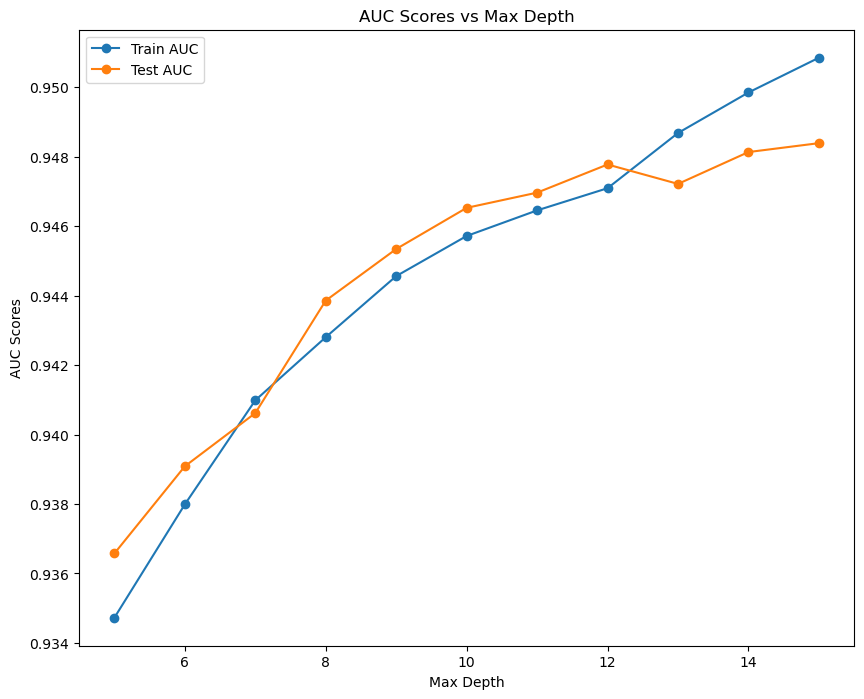

In [67]:
train_auc_threshold = []
test_auc_threshold = []
test_f1_score = []

max_depth_values = np.arange(5,16)

for depth in max_depth_values:
    #Intialize predicted probabilities for training and test sets
    clf = DecisionTreeClassifier(max_depth=depth, random_state=3)
    clf.fit(X_train_encoded_df, y_train)
    
    # Get predicted probabilities for training and test sets, chagning the threshold
    #y_train_pred = clf.predict(X_train_encoded_df)
    #y_test_pred = clf.predict(X_test_encoded_df)
    y_train_prob = clf.predict_proba(X_train_encoded_df)[:,1]
    y_test_prob = clf.predict_proba(X_test_encoded_df)[:,1]
    y_train_pred = (y_train_prob >= 0.4).astype(int)
    y_test_pred = (y_test_prob >= 0.4).astype(int)
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_auc = auc(fpr_train, tpr_train)
    test_auc = auc(fpr_test, tpr_test)
    
    # Append AUC to the list
    train_auc_threshold.append(train_auc)
    test_auc_threshold.append(test_auc)
    
    test_f1 = f1_score(y_test, y_test_pred)
    test_f1_score.append(test_f1)

    print(f"Max Depth: {depth}, Precision Score: {precision_score(y_test, y_test_pred)}, Recall Score: {recall_score(y_test, y_test_pred)}")
    

# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(max_depth_values, train_auc_threshold, label="Train AUC", marker="o")
plt.plot(max_depth_values, test_auc_threshold, label="Test AUC", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("AUC Scores")
plt.title('AUC Scores vs Max Depth')
plt.legend()
plt.savefig('./images/Max_depths.png')
plt.show()


 The above code evaluates the performance of a Decision Tree model by analyzing how different values of the max_depth hyperparameter affect its performance, specifically in terms of AUC (Area Under the ROC Curve) and F1-score. It prints out precsion and recall scores as it processes The analysis is used to understand how tree depth impacts the model's ability to generalize. 

 As stated in the previous cell, the best hypeparameter is 5 with a score o f100%. 

We see an increase of the F1-Score from 52% to 64%

Min Sample Split: 2, Precision Score: 0.6340, Recall Score: 0.453392990305742

Min Sample Split: 3, Precision Score: 0.6350, Recall Score: 0.4489187173750932

Min Sample Split: 4, Precision Score: 0.6366, Recall Score: 0.4571215510812826

Min Sample Split: 5, Precision Score: 0.6386, Recall Score: 0.4519015659955257

Min Sample Split: 6, Precision Score: 0.6397, Recall Score: 0.4541387024608501

Min Sample Split: 7, Precision Score: 0.6383, Recall Score: 0.44742729306487694

Min Sample Split: 8, Precision Score: 0.6371, Recall Score: 0.45563012677106635

Min Sample Split: 9, Precision Score: 0.6361, Recall Score: 0.45488441461595824

Min Sample Split: 10, Precision Score: 0.6353, Recall Score: 0.453392990305742



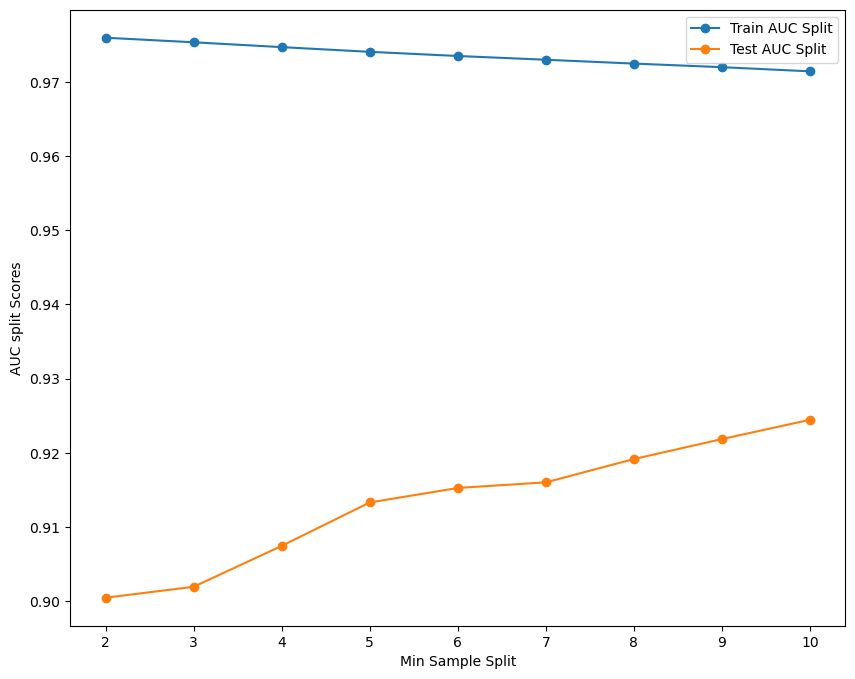

In [99]:
# identify the optimal min-samples-split 
min_sample_splits_value = np.arange(2,11)
train_auc_splits = []
test_auc_splits = []

for split in min_sample_splits_value:
    clf_split = DecisionTreeClassifier(min_samples_split=split, random_state=3)
    clf_split.fit(X_train_encoded_df, y_train)

    y_train_split_pred = clf_split.predict(X_train_encoded_df)
    y_test_split_pred = clf_split.predict(X_test_encoded_df)
    y_train_probs = clf_split.predict_proba(X_train_encoded_df)[:,1]
    y_test_probs = clf_split.predict_proba(X_test_encoded_df)[:,1]

    fpr_train_split, tpr_train_split, _ = roc_curve(y_train, y_train_probs)
    fpr_test_split, tpr_test_split, _ = roc_curve(y_test, y_test_probs)

    train_auc_split = auc(fpr_train_split, tpr_train_split)
    test_auc_split = auc(fpr_test_split, tpr_test_split)
    
    train_auc_splits.append(train_auc_split)
    test_auc_splits.append(test_auc_split)
    # print(f"Min Sample Split: {split}, F1 Score: {f1_score(y_test, y_test_split_probs):.4f}")
    # print(f"Min Sample Split: {split}, Accuracy: {accuracy_score(y_test, y_test_split_probs):.4f}")
    print(f"Min Sample Split: {split}, Precision Score: {precision_score(y_test, y_test_split_pred):.4f}, Recall Score: {recall_score(y_test, y_test_split_pred)}")
    print()


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_auc_splits, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value, test_auc_splits, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.show()

 The above code is designed to evaluate the impact of the min_samples_split hyperparameter on the performance of a Decision Tree model by analyzing changes in AUC (Area Under the ROC Curve) scores for both training and testing datasets.

 We were give a sample split of 2 in our earlier function, but we can see that a split of 8 gives us the best Recall score.

Next, we'll try tune the splits a little more and see if made a difference

Min Sample Split: 2, Precision_Score: 0.5704, Recall Score: 0.6554809843400448
Min Sample Split: 3, Precision_Score: 0.5704, Recall Score: 0.6584638329604773
Min Sample Split: 4, Precision_Score: 0.5709, Recall Score: 0.6577181208053692
Min Sample Split: 5, Precision_Score: 0.5730, Recall Score: 0.6614466815809098
Min Sample Split: 6, Precision_Score: 0.5719, Recall Score: 0.6644295302013423
Min Sample Split: 7, Precision_Score: 0.5694, Recall Score: 0.6636838180462341
Min Sample Split: 8, Precision_Score: 0.5684, Recall Score: 0.6659209545115585
Min Sample Split: 9, Precision_Score: 0.5717, Recall Score: 0.668903803131991
Min Sample Split: 10, Precision_Score: 0.5688, Recall Score: 0.6718866517524236


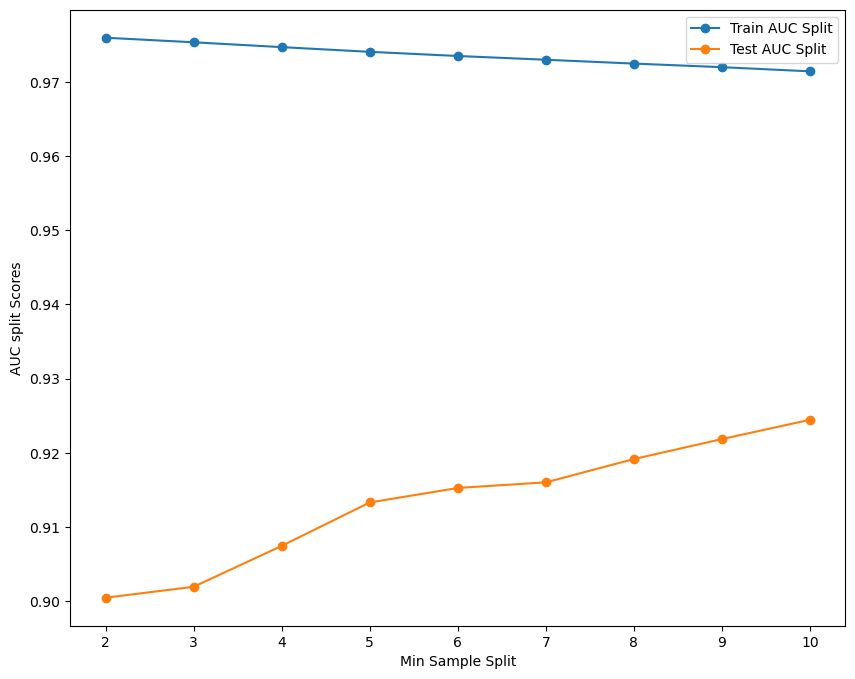

In [69]:
train_auc_splits_thresh = []
test_auc_splits_thresh = []

for split in min_sample_splits_value:
    clf_split = DecisionTreeClassifier(min_samples_split=split, random_state=3)
    clf_split.fit(X_train_encoded_df, y_train)

    # y_train_preds = clf_split.predict(X_train_encoded_df)
    # y_test_preds = clf_split.predict(X_test_encoded_df)
    y_train_probs = clf_split.predict_proba(X_train_encoded_df)[:,1]
    y_test_probs = clf_split.predict_proba(X_test_encoded_df)[:,1]
    
    y_train_preds = (y_train_probs >= 0.4).astype(int)
    y_test_preds = (y_test_probs >= 0.4).astype(int)

    fpr_train_split, tpr_train_split, _ = roc_curve(y_train, y_train_preds)
    fpr_test_split, tpr_test_split, _ = roc_curve(y_test, y_test_preds)

    train_auc_split = auc(fpr_train_split, tpr_train_split)
    test_auc_split = auc(fpr_test_split, tpr_test_split)
    
    train_auc_splits_thresh.append(train_auc_split)
    test_auc_splits_thresh.append(test_auc_split)
    print(f"Min Sample Split: {split}, Precision_Score: {precision_score(y_test, y_test_preds):.4f}, Recall Score: {recall_score(y_test, y_test_preds)}")


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_auc_splits, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value, test_auc_splits, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.savefig('./images/sample_splits.png')
plt.show()

We see a an increase from 46% to 67% for 9 sample splits

Finally, We'll adjust the minimum sample leaf as well.

Min Sample Leaf: 1, Precision Score: 0.6339937434827946
 Accuracy Score: 0.9119486637966047
Min Sample Leaf: 2, Precision Score: 0.6403508771929824
 Accuracy Score: 0.9118674356266754
Min Sample Leaf: 3, Precision Score: 0.6316851664984864
 Accuracy Score: 0.912273576476322
Min Sample Leaf: 4, Precision Score: 0.6225641025641026
 Accuracy Score: 0.9104865567378767
Min Sample Leaf: 5, Precision Score: 0.6378433367243134
 Accuracy Score: 0.9130858581756153


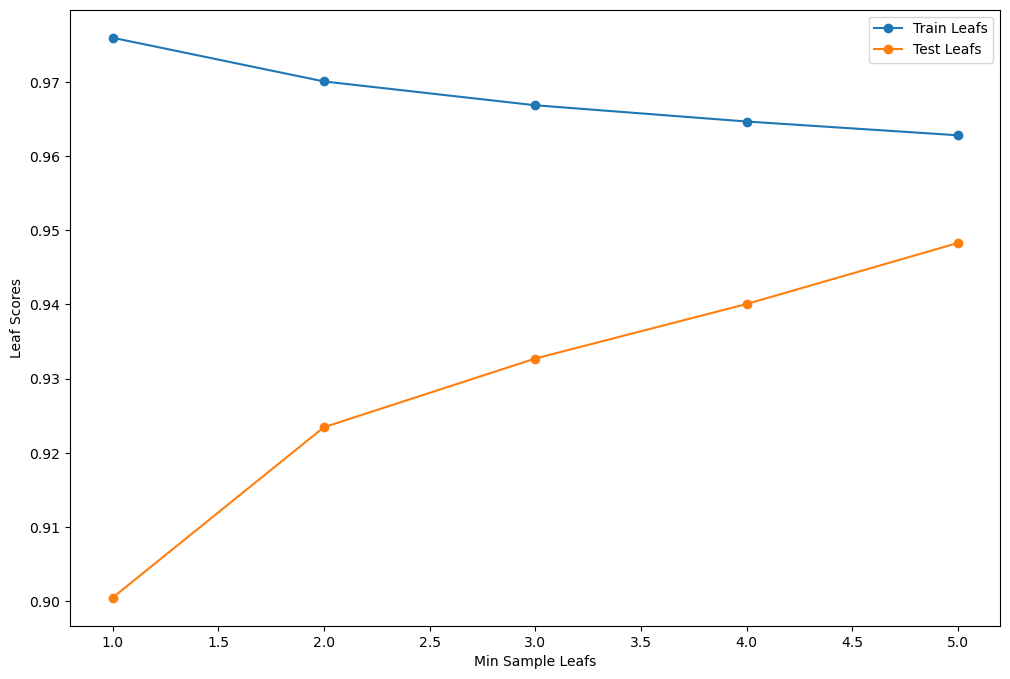

In [70]:
# Set a range for the leaves from 1-5
min_sample_leafs_values = np.arange(1,6)

# Create a list for train and test leaves
train_auc_leafs = []
test_auc_leafs = []

for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_leaf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_leaf.fit(X_train_encoded_df, y_train)

    y_train_leaf_pred = clf_leaf.predict(X_train_encoded_df)
    y_test_leaf_pred = clf_leaf.predict(X_test_encoded_df)

    #predict probabilities
    y_train_leaf_pred_prob = clf_leaf.predict_proba(X_train_encoded_df)[:,1]
    y_test_leaf_pred_prob = clf_leaf.predict_proba(X_test_encoded_df)[:,1]

    # get the false positive and true positive values
    fpr_train_leaf, tpr_train_leaf, _ = roc_curve(y_train, y_train_leaf_pred_prob)
    fpr_test_leaf, tpr_test_leaf, _ = roc_curve(y_test, y_test_leaf_pred_prob)

    # Get the AUC
    train_auc_leaf = auc(fpr_train_leaf, tpr_train_leaf)
    test_auc_leaf = auc(fpr_test_leaf, tpr_test_leaf)

    train_auc_leafs.append(train_auc_leaf)
    test_auc_leafs.append(test_auc_leaf)
    
    print(f"Min Sample Leaf: {leaf}, Precision Score: {precision_score(y_test, y_test_leaf_pred)}\n Accuracy Score: {accuracy_score(y_test, y_test_leaf_pred)}")

plt.figure(figsize=(12,8))
plt.plot(min_sample_leafs_values, train_auc_leafs, label="Train Leafs", marker="o")
plt.plot(min_sample_leafs_values, test_auc_leafs, label="Test Leafs", marker="o")
plt.xlabel("Min Sample Leafs")
plt.ylabel("Leaf Scores")
plt.legend()
plt.savefig('./images/leafs.png')
plt.show()


In [71]:
# create a train and test list for the possible scores
train_auc_leafs_thres = []
test_auc_leafs_thres = []

# iterate over the min_sample_leaves 
for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_leaf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_leaf.fit(X_train_encoded_df, y_train)

    # y_train_leaf_pred = clf_leaf.predict(X_train_encoded_df)
    # y_test_leaf_pred = clf_leaf.predict(X_test_encoded_df)

    #predict probabilities
    y_train_leaf_pred_prob = clf_leaf.predict_proba(X_train_encoded_df)[:,1]
    y_test_leaf_pred_prob = clf_leaf.predict_proba(X_test_encoded_df)[:,1]
    
    y_train_leaf_pred = (y_train_leaf_pred_prob >= 0.6).astype(int)
    y_test_leaf_pred = (y_test_leaf_pred >= 0.6).astype(int)

    # get the false positive and true positive values
    fpr_train_leaf, tpr_train_leaf, _ = roc_curve(y_train, y_train_leaf_pred_prob)
    fpr_test_leaf, tpr_test_leaf, _ = roc_curve(y_test, y_test_leaf_pred_prob)

    # Get the AUC
    train_auc_leaf_thres = auc(fpr_train_leaf, tpr_train_leaf)
    test_auc_leaf_thres = auc(fpr_test_leaf, tpr_test_leaf)

    train_auc_leafs.append(train_auc_leaf)
    test_auc_leafs.append(test_auc_leaf)
    
    print(f"Min Sample Leaf: {leaf}, Precision Score: {precision_score(y_test, y_test_leaf_pred)},\n recall score: {recall_score(y_test, y_test_leaf_pred)}")



Min Sample Leaf: 1, Precision Score: 0.6378433367243134,
 recall score: 0.46756152125279643
Min Sample Leaf: 2, Precision Score: 0.6378433367243134,
 recall score: 0.46756152125279643
Min Sample Leaf: 3, Precision Score: 0.6378433367243134,
 recall score: 0.46756152125279643
Min Sample Leaf: 4, Precision Score: 0.6378433367243134,
 recall score: 0.46756152125279643
Min Sample Leaf: 5, Precision Score: 0.6378433367243134,
 recall score: 0.46756152125279643


This code evaluates the impact of the min_samples_leaf hyperparameter on the performance of a Decision Tree model by analyzing changes in AUC (Area Under the ROC Curve) scores for both the training and testing datasets.

There's not much change in the leaves, so we'll go with the suggested leaf in our original function

Finally, we will decide which ciriterion would work best to optimized this model.

In [72]:
# Import the necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

#create a list of critera
criterion = ['gini', 'entropy']

# iterate over the criteria calculating the best Criterion and F1-Score, printing out the resutls
for crit in criterion:
    dt = DecisionTreeClassifier(criterion=crit, random_state=9).fit(X_train_encoded_df, y_train)
    y_proba = dt.predict(X_test_encoded_df)
    
    print(f"Criterion: {crit}, F1 Score: {f1_score(y_test, y_proba)}")


Criterion: gini, F1 Score: 0.5299739357080799
Criterion: entropy, F1 Score: 0.5229276895943563


# Combine the best parameters

We'll combine the best parameters from our hyperparameter tuning and create a new model.

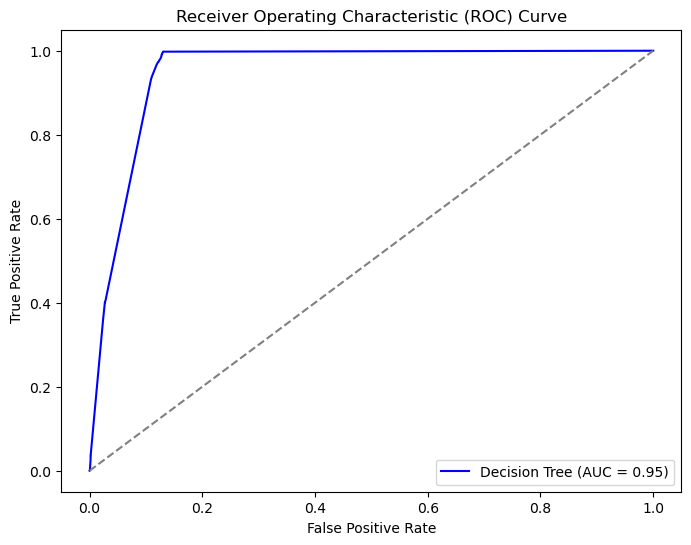

Optimized Decision Tree Performance:

Optimized Accuracy: 0.8844935423604906
Optimized Precision: 0.48522437066763957
Optimized Recall: 0.9917971662938105
Optimized F1 Score: 0.651641352278295
Optimized ROC AUC: 0.9493455815025319
Confusion Matrix:
 [[9559 1411]
 [  11 1330]]


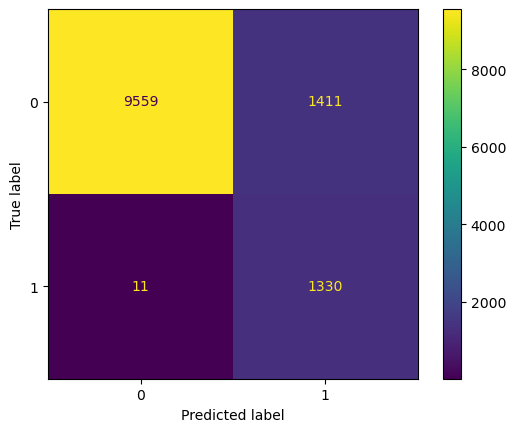

In [73]:
# Instantiate the optmized model
dt_optimized = DecisionTreeClassifier(max_depth=14, 
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      criterion='gini',
                                      class_weight='balanced',
                                      random_state=9).fit(X_train_encoded_df, y_train)


# Evaluate the model
y_probability_optimized = dt_optimized.predict_proba(X_test_encoded_df)[:, 1]

fpr3, tpr3, _ = roc_curve(y_test, y_probability_optimized)
roc_auc = roc_auc_score(y_test, y_probability_optimized)


# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('./images/optimized_ROC_Curve.png')
plt.show()

y_pred_optimized = dt_optimized.predict(X_test_encoded_df)
# y_pred_optimized = (y_probability_optimized >= 0.6).astype(int)

print("Optimized Decision Tree Performance:\n")
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print(f"Optimized Precision: {precision_score(y_test, y_pred_optimized)}")
print(f"Optimized Recall: {recall_score(y_test, y_pred_optimized)}")
print(f"Optimized F1 Score: {f1_score(y_test, y_pred_optimized)}")
print(f"Optimized ROC AUC: {roc_auc}")

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_optimized)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized)
plt.savefig('./images/confusion_matrix.png')


Is this model, we can see that the Recall score is 99%, meaning that it is able to detect False negatives as True positives or False Positives.

[Text(0.9209104280354706, 0.9666666666666667, 'stop_resolution_Field Contact <= 0.5\ngini = 0.5\nsamples = 49244\nvalue = [24622.0, 24622.0]\nclass = NO Arrest'),
 Text(0.9099963761937244, 0.9, 'stop_resolution_Offense Report <= 0.5\ngini = 0.43\nsamples = 25332\nvalue = [11204.775, 24622.0]\nclass = Arrest'),
 Text(0.8554634208731241, 0.8333333333333334, 'stop_resolution_Referred for Prosecution <= 0.5\ngini = 0.246\nsamples = 12708\nvalue = [4121.342, 24622.0]\nclass = Arrest'),
 Text(0.7791396657571623, 0.7666666666666667, 'subject_perceived_race_Hispanic <= 0.5\ngini = 0.232\nsamples = 12128\nvalue = [3797.021, 24612.818]\nclass = Arrest'),
 Text(0.7329041609822646, 0.7, 'stop_resolution_Citation / Infraction <= 0.5\ngini = 0.223\nsamples = 11794\nvalue = [3609.611, 24612.818]\nclass = Arrest'),
 Text(0.673175306957708, 0.6333333333333333, 'subject_perceived_race_Multi-Racial <= 0.5\ngini = 0.219\nsamples = 11626\nvalue = [3515.344, 24612.818]\nclass = Arrest'),
 Text(0.58645975443

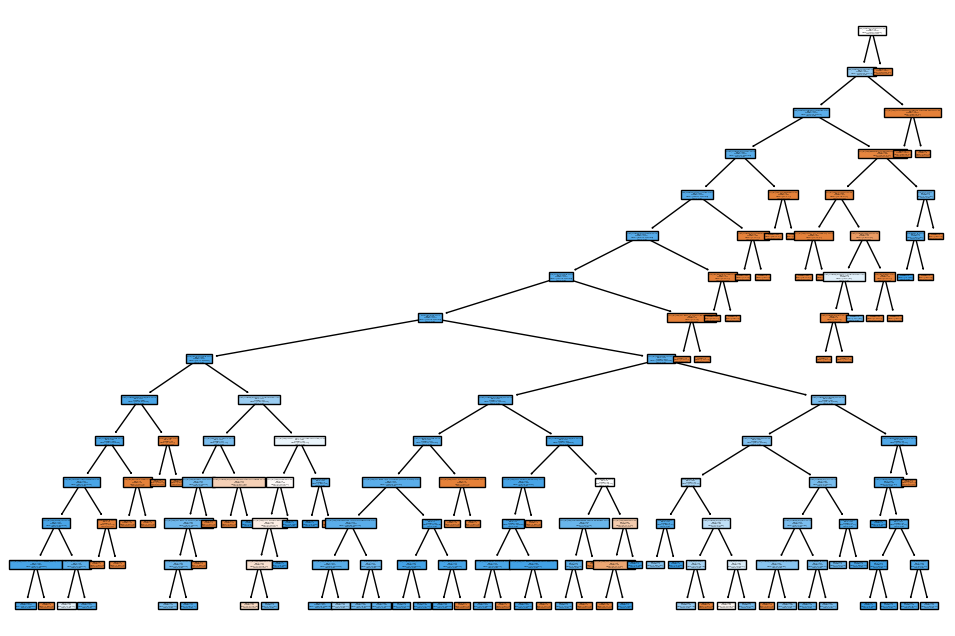

In [74]:
plt.figure(figsize=(12,8))

tree.plot_tree(dt_optimized, feature_names=X_train_encoded_df.columns, class_names=['NO Arrest', 'Arrest'], filled=True)

I'll create a subet focusing on **Suspicious categories** within the **Initial Call Type** Column. This goes back to our business problem where we want to know if stops led to an Arrest. 

Our initial model was able to predict True Postive Cases very well where it will predict if a stop leed or leads to an arrest.

We have a 9112 rows, 8424 instances where there was **'No Arrest':0** and 688 instances where an **'Arrest': 1** was made 

In [75]:
suspicious_rows['Arrest Flag']

6        0
10       0
11       0
17       0
21       0
        ..
61518    0
61530    0
61534    0
61552    0
61553    0
Name: Arrest Flag, Length: 10365, dtype: int32

In [76]:
print(suspicious_rows['Arrest Flag'].value_counts())
print()
print(suspicious_rows['Arrest Flag'].value_counts(normalize=True))

Arrest Flag
0    9570
1     795
Name: count, dtype: int64

Arrest Flag
0    0.9233
1    0.0767
Name: proportion, dtype: float64


In [77]:
suspicious_rows[(suspicious_rows['Arrest Flag'] == 1) & (suspicious_rows['Frisk Flag'] == 'Y')].head()


Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
457            1 - 17  53074543169  20230000329931    53262900808   
493           26 - 35   7728640269  20210000190974    26413475956   
593           36 - 45   7728451484  20190000414566    11689875899   
607           36 - 45  25979165808  20210000182061    25979193254   
971           46 - 55  12782779712  20230000275472    52401624211   

    Stop Resolution                        Weapon Type Officer ID  \
457          Arrest                                NaN       8725   
493          Arrest    Blunt Object/Striking Implement       8389   
593          Arrest                                NaN       8465   
607          Arrest                                NaN       8405   
971          Arrest  Knife/Cutting/Stabbing Instrument       8680   

     Officer YOB Officer Gender       Officer Race  ...     Reported Time  \
457         1987              M              White  ...  12:34:11.0000000   
493         1987              M              White  ...  20:17:05.0000000   
593         1990              M              White  ...  04:22:07.0000000   
607         1993              M              White  ...  02:38:42.0000000   
971         1997              M  Two or More Races  ...  00:20:35.0000000   

                              Initial Call Type  \
457     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
493     TRAFFIC STOP - OFFICER INITIATED ONVIEW   
593     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
607  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
971     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   

                         Final Call Type Call Type  \
457           --AUTOMOBILES - AUTO THEFT       911   
493  --WEAPON,PERSON WITH - OTHER WEAPON    ONVIEW   
593               --PROPERTY DEST (DAMG)       911   
607               --PROPERTY DEST (DAMG)    ONVIEW   
971                    --ASSAULTS, OTHER    ONVIEW   

                                Officer Squad Arrest Flag Frisk Flag Precinct  \
457         WEST PCT 2ND W - KING - PLATOON 1           1          Y     West   
493                           CRG - SQUAD 81B           1          Y     West   
593  NORTH PCT 3RD W - BOY (JOHN) - PLATOON 1           1          Y    North   
607       SOUTH PCT 3RD W - OCEAN - PLATOON 2           1          Y    South   
971        WEST PCT 2ND W - DAVID - PLATOON 2           1          Y     West   

     Sector Beat  
457       K   K1  
493       K   K3  
593       B   B2  
607       O   O1  
971       M   M3  

[5 rows x 23 columns]

Within the subset we found that the 237 cases of arrests are recorded. We will focus on these columns.

In [78]:
print(suspicious_rows[(suspicious_rows['Arrest Flag'] == 1)]['Frisk Flag'].value_counts())
print(suspicious_rows[(suspicious_rows['Arrest Flag'] == 1)]['Frisk Flag'].value_counts(normalize=True))


Frisk Flag
N    558
Y    237
Name: count, dtype: int64
Frisk Flag
N    0.701887
Y    0.298113
Name: proportion, dtype: float64


In [79]:
print(suspicious_rows['Frisk Flag'].value_counts())
print(suspicious_rows['Frisk Flag'].value_counts(normalize=True))

Frisk Flag
N    8562
Y    1751
Name: count, dtype: int64
Frisk Flag
N    0.830214
Y    0.169786
Name: proportion, dtype: float64


In [80]:
features

['Initial Call Type',
 'Stop Resolution',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Gender',
 'Subject Perceived Race',
 'Frisk Flag']

In [81]:
X_stops = suspicious_rows[features]
# X_stops = suspicious_rows[['Initial Call Type','Frisk Flag','Officer Gender', 'Subject Perceived Gender','Officer Race','Subject Perceived Race']]

y_stops = suspicious_rows['Arrest Flag']

X_train_stops, X_test_stops, y_train_stops, y_test_stops = train_test_split(X_stops, y_stops, random_state=42, test_size=0.2)




In [82]:
X_train_stops.value_counts()

Initial Call Type                           Stop Resolution           Officer Gender  Officer Race       Subject Perceived Gender  Subject Perceived Race            Frisk Flag
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW  Field Contact             M               White              Male                      White                             N             618
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT     Field Contact             M               White              Male                      White                             N             339
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW  Field Contact             M               White              Male                      Black or African American         N             250
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT     Offense Report            M               White              Male                      White                             N             239
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW  Arrest                    M               White 

In [83]:
X_train_stops = reformat_columns(X_train_stops)
X_test_stops = reformat_columns(X_test_stops)
y_train_stops = reformat_columns(y_train_stops)
y_test_stops = reformat_columns(y_test_stops)



In [84]:
print(X_train_stops.columns)
print(X_test_stops.columns)
print(y_train_stops.name)
print(y_test_stops.name)

Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')
Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')
arrest_flag
arrest_flag


In [85]:
imputer.fit(X_train_stops)


# transform the features
X_train_stops_imputed = imputer.fit_transform(X_train_stops)
X_test_stops_imputed = imputer.transform(X_test_stops)

X_train_stops_imputed_df = pd.DataFrame(X_train_stops_imputed,
                                columns=X_train_stops.columns, 
                                index=X_train_stops.index
                                )


X_test_stops_imputed_df = pd.DataFrame(X_test_stops_imputed, 
                                columns=X_test_stops.columns, 
                                index=X_test_stops.index
                                )

In [86]:
X_train_stops_encoded, X_test_stops_enconded, stops_encoded_df = one_hot_encode(X_train_stops, X_test_stops)


In [87]:
# X_train_stops_scaled = scaler.fit_transform(X_train_stops_encoded, y_train_stops)

# X_test_stops_scaled = scaler.transform(X_test_stops_enconded)

# X_train_stops_scaled_df = pd.DataFrame(X_train_stops_scaled, 
#                                  columns=X_train_stops_encoded.columns,
#                                  index=X_train_stops_encoded.index
#                                  )
# X_test_stops_scaled_df = pd.DataFrame(X_test_stops_scaled,
#                                       columns=X_test_stops_enconded.columns,
#                                       index=X_test_stops_enconded.index
#                                       )

In [88]:
print(y_train_stops.value_counts())
print(y_train_stops.value_counts(normalize=True))

arrest_flag
0    7661
1     631
Name: count, dtype: int64
arrest_flag
0    0.923903
1    0.076097
Name: proportion, dtype: float64


In [89]:
# X_train_stops_encoded.corrwith(y_train_stops)

The above code provides correlations to the target value. If you want to see the results, feel free to uncomment it.

Logistic Regression Metrics

Accuracy: 87.12%
Precision: 38.05%
Recall:  100.00%
F1 Score: 55.13%
ROC AUC Score: 94.54%

Confusion Matrix:
 [[1642  267]
 [   0  164]]


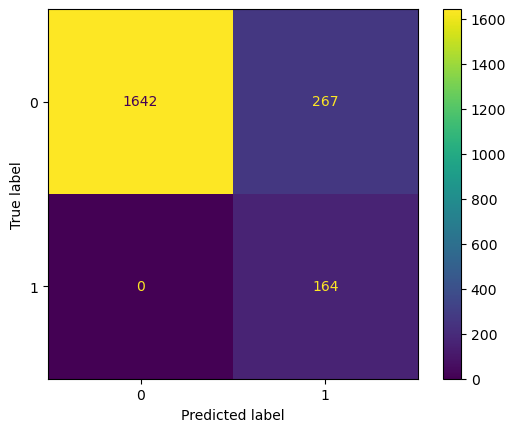

In [90]:
# Instantiate the stops model
baseline_model_stops = LogisticRegression(random_state=33, max_iter=1000, class_weight='balanced')

# Call the evaluate model function
evaluate_model(baseline_model_stops, X_train_stops_encoded, y_train_stops, X_test_stops_enconded, y_test_stops)

In [91]:
# baseline_model_stops = LogisticRegression(random_state=33, max_iter=1000, class_weight='balanced')

# baseline_model_stops.fit(X_train_stops_encoded, y_train_stops)
# # baseline_model_stops.fit(X_train_stops, y_train_stops)

# y_pred_stops = baseline_model_stops.predict(X_test_stops_enconded)

# # Probabilities
# y_test_stop_probabilites = baseline_model_stops.predict_proba(X_test_stops_enconded)[:,1]

# false_positive_stop, true_positive_stop, _ = roc_curve(y_test_stops, y_test_stop_probabilites)

# roc_auc_stops = auc(false_positive_stop, true_positive_stop)


# baseline_model_stops_accuracy = accuracy_score(y_test_stops, y_pred_stops)
# baseline_model_stops_precision = precision_score(y_test_stops, y_pred_stops)
# baseline_model_stops_recall = recall_score(y_test_stops, y_pred_stops)
# baseline_model_stops_f1 = f1_score(y_test_stops, y_pred_stops)



# print(f'Stop Accuracy: {baseline_model_stops_accuracy * 100:.2f}%')
# print(f'Stop Precision: {baseline_model_stops_precision * 100:.2f}%')
# print(f'Stops Recall: {baseline_model_stops_recall * 100:.2f}%')
# print(f'Stop F1: {baseline_model_stops_f1 * 100:.2f}%')
# print(f'AUC: {roc_auc_stops * 100:.2f}%')

# ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_stops)



In [92]:
y_pred_stops = baseline_model_stops.predict(X_test_stops_enconded)
y_test_stop_probabilites = baseline_model_stops.predict_proba(X_test_stops_enconded)[:,1]

false_positive_stop, true_positive_stop, _ = roc_curve(y_test_stops, y_test_stop_probabilites)

roc_auc_stops = auc(false_positive_stop, true_positive_stop)

baseline_model_stops_accuracy = accuracy_score(y_test_stops, y_pred_stops)
baseline_model_stops_precision = precision_score(y_test_stops, y_pred_stops)
baseline_model_stops_recall = recall_score(y_test_stops, y_pred_stops)
baseline_model_stops_f1 = f1_score(y_test_stops, y_pred_stops)


Our base model predicts:

Logistic Regression Metrics

Accuracy: 87.12%
Precision: 38.05%
Recall:  100.00%
F1 Score: 55.13%
ROC AUC Score: 94.54%

We can make some improvements to this model by  hyperparameter tuning. It currently is not recognizing any false negative cases, which can be a good thing but in this case that means that it's not recognizing cases that were arrests and they shouldn't be arrests.

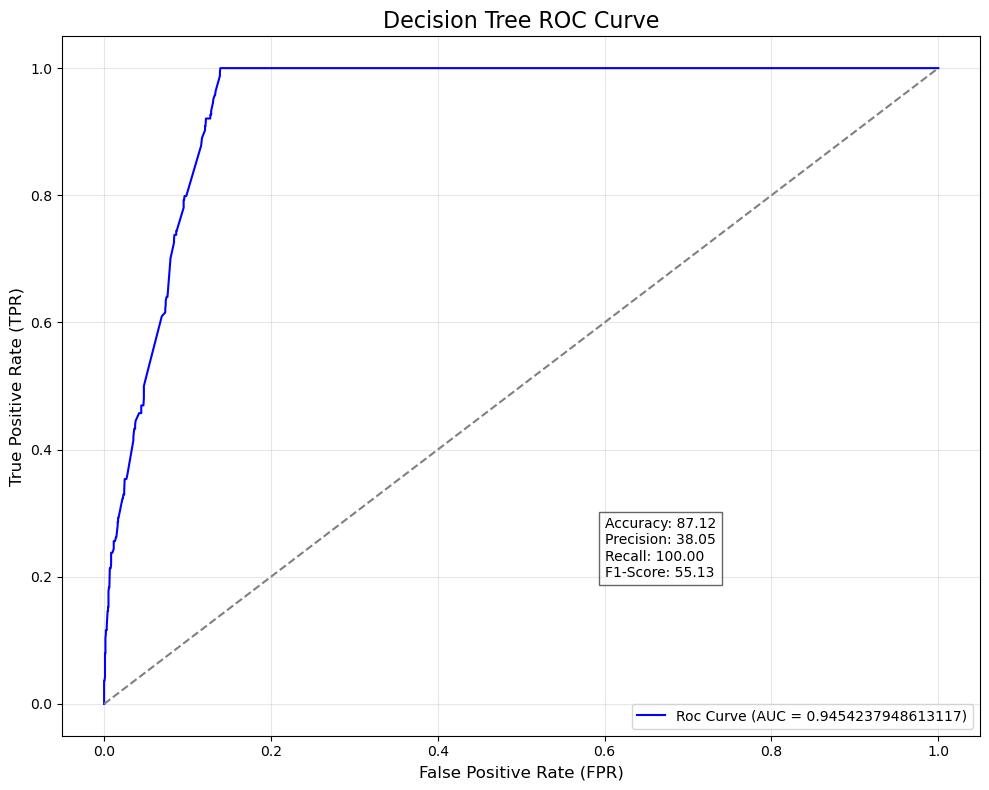

In [93]:
# Set the figure size for the plot
plt.figure(figsize=(10,8))

# Plot the ROC curve for the decision tree model using FPR and TPR values
plt.plot(false_positive_stop, true_positive_stop, color='blue', label=f'Roc Curve (AUC = {roc_auc_stops})')

# Plot a diagonal reference line representing a random classifier (FPR = TPR)
plt.plot([0,1], [0,1], color='gray', linestyle='--')

# Add a title and axis labels with appropriate font sizes
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# Add a legend in the lower-right corner of the plot to label the ROC curve
plt.legend(loc='lower right', fontsize=10)

# Add a light grid to the background for better readability
plt.grid(alpha=0.3)

# Prepare a text box summarizing key evaluation metrics for the model
metrics_text = (f'Accuracy: {baseline_model_stops_accuracy * 100:.2f}\n'
                f'Precision: {baseline_model_stops_precision * 100:.2f}\n'
                f'Recall: {baseline_model_stops_recall * 100:.2f}\n'
                f'F1-Score: {baseline_model_stops_f1 * 100:.2f}'
                )

# Add the text box with metrics to the plot at a specified position
# The bbox parameter adds a semi-transparent white background for readability
plt.text(0.6, 0.2, metrics_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Adjust the layout to ensure all elements fit well within the figure
plt.tight_layout()


The subset baseline model is able to predict 0 False Negatives, meaning that it's recording arrests accurately. Having a Recall of 100% also provides predictions for True positive cases. All arrests are actually arrests by officers.

Training: 0.8745779064158224
Test: 0.8658948383984564

DT Accuracy: 0.8658948383984564
DT Precision: 0.37104072398190047
DT Recall: 1.0
DT F1: 0.5412541254125413

[[1631  278]
 [   0  164]]


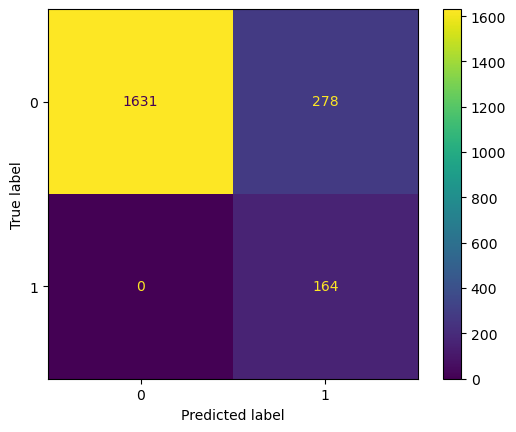

In [94]:
# Instantiate and train a Decision Tree Classifier with specified hyperparameters
# 'random_state' ensures reproducibility
# 'criterion' specifies the splitting criteria (Gini index here)
# 'max_depth' limits the depth of the tree to prevent overfitting
# 'class_weight' balances the classes if they are imbalanced
dt_stops = DecisionTreeClassifier(random_state=33, 
                                  criterion='gini', 
                                  max_depth=5,
                                  class_weight='balanced').fit(X_train_stops_encoded, 
                                                               y_train_stops)

# Make predictions on the test dataset
y_pred_dt_stop = dt_stops.predict(X_test_stops_enconded)

# Calculate performance metrics for the decision tree model
dt_stop_accuracy = accuracy_score(y_test_stops, y_pred_dt_stop)  # Overall accuracy of the model
dt_stop_precision = precision_score(y_test_stops, y_pred_dt_stop)  # Precision for positive predictions
dt_stop_recall = recall_score(y_test_stops, y_pred_dt_stop)  # Recall for positive class
dt_stop_f1 = f1_score(y_test_stops, y_pred_dt_stop)  # F1 score, a harmonic mean of precision and recall

# Display the training and testing scores (overall accuracy of the model on both datasets)
print(f"Training: {dt_stops.score(X_train_stops_encoded, y_train_stops)}")
print(f"Test: {dt_stops.score(X_test_stops_enconded, y_test_stops)}")
print()

# Print detailed performance metrics
print(f'DT Accuracy: {dt_stop_accuracy}')
print(f'DT Precision: {dt_stop_precision}')
print(f'DT Recall: {dt_stop_recall}')
print(f'DT F1: {dt_stop_f1}\n')

# Print the confusion matrix to display counts of true positives, true negatives, false positives, and false negatives
print(confusion_matrix(y_test_stops, y_pred_dt_stop))

# Display the confusion matrix as a plot for better visualization
ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_dt_stop)


In [95]:
# Perform cross-validation on the Decision Tree classifier
cv_stop_scores = cross_val_score(
    dt_stops,  # Pre-trained Decision Tree model
    X_train_stops_encoded,  # Encoded training feature set
    y_train_stops,  # Training target variable
    cv=5,  # Number of folds for cross-validation
    scoring='recall'  # Scoring metric: Recall
)

# Print recall scores from each fold of cross-validation
print(f"Cross-validated recall scores: {cv_stop_scores}")

# Calculate and print the mean recall score across all folds
print(f"Mean Score: {cv_stop_scores.mean()}")

# Calculate and print the standard deviation of the recall scores
# This helps understand the variation in model performance across folds
print(f"Standard Deviation of scores: {cv_stop_scores.std()}")


Cross-validated recall scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation of scores: 0.0


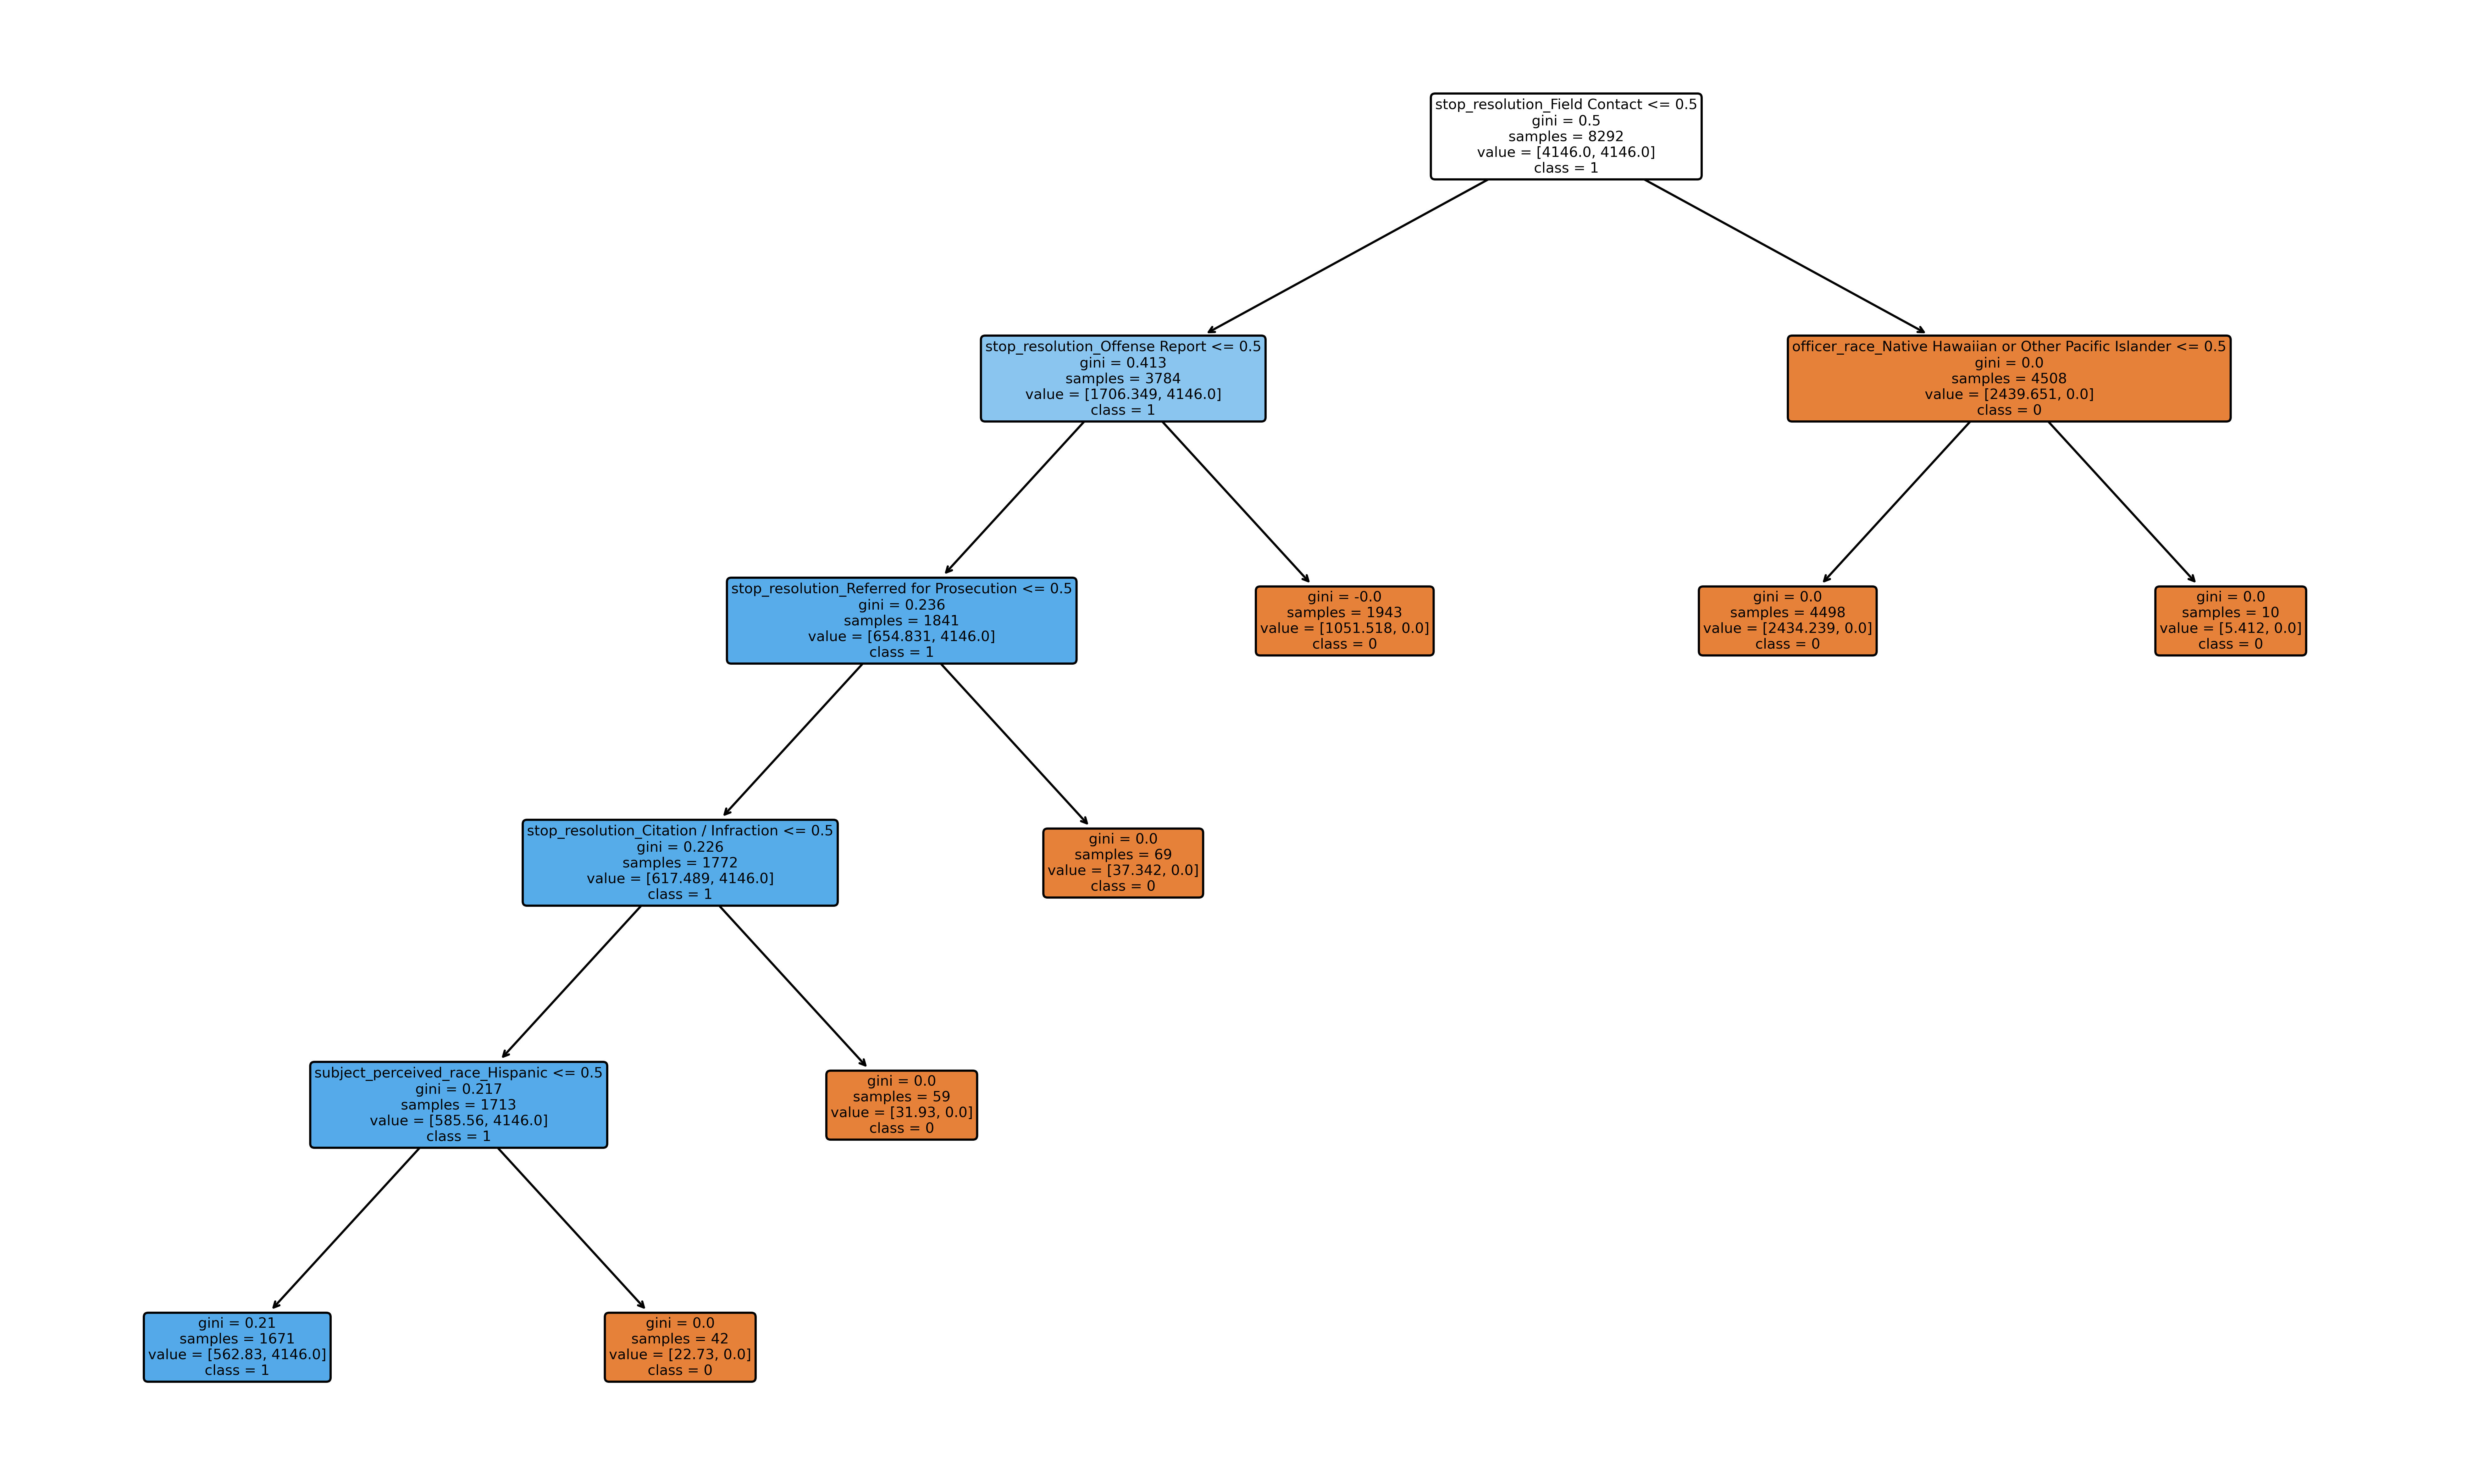

In [96]:
# from sklearn import tree
plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(dt_stops,
              feature_names=X_train_stops_encoded.columns,
              class_names=np.unique(y_train_stops).astype('str'),
              filled=True,
              rounded=True,
              max_depth=5)
plt.savefig('./images/DecisionTree_subset_plot_tree.png')
plt.show()

In [97]:
best_recall, best_params = tune_decision_tree(X_train_encoded_df, y_train, X_test_encoded_df, y_test)

In [100]:
best_stops_f1 = -np.inf
best_stops_params = {}

# Iterate over the combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_sample_splits_value:
        for min_samples_leaf in min_sample_leafs_values:
            
            # Instantiate and train the model with the current set of hyperparameters
            stop_model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                class_weight='balanced',
                random_state=33
            ).fit(
                X_train_stops_encoded,
                y_train_stops
            )
            
            y_stops_prediction = stop_model.predict(X_test_stops_enconded)
            
            f1 = f1_score(y_test_stops, y_stops_prediction)
            
            if f1 > best_stops_f1:
                best_stops_f1 = f1
                best_stops_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

# Print the best F1-Score and Parameters
print(f'Best F1-Score: {best_stops_f1}')
print(f'Best Parameters: {best_stops_params}')


Best F1-Score: 0.5521885521885522
Best Parameters: {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [101]:
# We'll call the tune decision tree function, and get the results.

best_recall, best_params = tune_decision_tree(X_train_stops_encoded, y_train_stops, X_test_stops_enconded, y_test_stops)
print(f'Best Recall: {best_recall}')
print(f'Best Params: {best_params}')

Best Recall: 1.0
Best Params: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}


As we did previously, we'll perform some sanity checks by checking the max-depth, min sample splits, and min sample leaves.

In [102]:
depth_values = np.arange(1,20)
train_depth_aucs = []
test_depth_aucs = []

for depth in depth_values:
    #Intialize predicted probabilities for training and test sets
    clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=33, class_weight='balanced')
    clf_depth.fit(X_train_stops_encoded, y_train_stops)
    
    # Get predicted probabilities for training and test sets
    y_train_stop_pred = clf_depth.predict(X_train_stops_encoded)
    y_test_stop_pred = clf_depth.predict(X_test_stops_enconded)
    
    y_train_stop_prob = clf_depth.predict_proba(X_train_stops_encoded)[:,1]
    y_test_stop_prob = clf_depth.predict_proba(X_test_stops_enconded)[:,1]
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_depth_train, tpr_depth_train, _ = roc_curve(y_train_stops, y_train_stop_prob)
    fpr_depth_test, tpr_depth_test, _ = roc_curve(y_test_stops, y_test_stop_prob)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_depth_auc = auc(fpr_depth_train, tpr_depth_train)
    test_depth_auc = auc(fpr_depth_test, tpr_depth_test)
    
    # Append AUC to the list
    train_depth_aucs.append(train_depth_auc)
    test_depth_aucs.append(test_depth_auc)

    print(f"Max Depth: {depth}, Precision Score: {precision_score(y_test_stops, y_test_stop_pred)} Recall-Score: {recall_score(y_test_stops, y_test_stop_pred)}")
    



Max Depth: 1, Precision Score: 0.166497461928934 Recall-Score: 1.0
Max Depth: 2, Precision Score: 0.3346938775510204 Recall-Score: 1.0
Max Depth: 3, Precision Score: 0.34893617021276596 Recall-Score: 1.0
Max Depth: 4, Precision Score: 0.36444444444444446 Recall-Score: 1.0
Max Depth: 5, Precision Score: 0.37104072398190047 Recall-Score: 1.0
Max Depth: 6, Precision Score: 0.3761467889908257 Recall-Score: 1.0
Max Depth: 7, Precision Score: 0.3805104408352668 Recall-Score: 1.0
Max Depth: 8, Precision Score: 0.3805104408352668 Recall-Score: 1.0
Max Depth: 9, Precision Score: 0.3813953488372093 Recall-Score: 1.0
Max Depth: 10, Precision Score: 0.3813953488372093 Recall-Score: 1.0
Max Depth: 11, Precision Score: 0.3813953488372093 Recall-Score: 1.0
Max Depth: 12, Precision Score: 0.3813953488372093 Recall-Score: 1.0
Max Depth: 13, Precision Score: 0.37995337995337997 Recall-Score: 0.9939024390243902
Max Depth: 14, Precision Score: 0.3829787234042553 Recall-Score: 0.9878048780487805
Max Depth:

Max Depth: 5, Precision Score: 0.37104072398190047, Recall Score: 1.0
Max Depth: 6, Precision Score: 0.3761467889908257, Recall Score: 1.0
Max Depth: 7, Precision Score: 0.3805104408352668, Recall Score: 1.0
Max Depth: 8, Precision Score: 0.3805104408352668, Recall Score: 1.0
Max Depth: 9, Precision Score: 0.3813953488372093, Recall Score: 1.0
Max Depth: 10, Precision Score: 0.3813953488372093, Recall Score: 1.0
Max Depth: 11, Precision Score: 0.3813953488372093, Recall Score: 1.0
Max Depth: 12, Precision Score: 0.3813953488372093, Recall Score: 1.0
Max Depth: 13, Precision Score: 0.37995337995337997, Recall Score: 0.9939024390243902
Max Depth: 14, Precision Score: 0.3829787234042553, Recall Score: 0.9878048780487805
Max Depth: 15, Precision Score: 0.3829787234042553, Recall Score: 0.9878048780487805


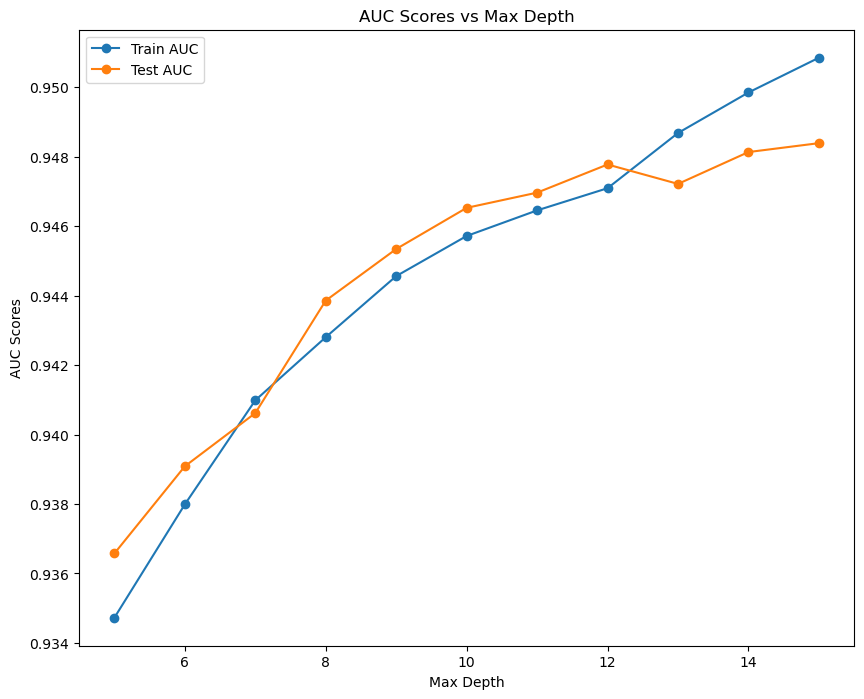

In [103]:
# depth_values = np.arange(1,50)
train_auc_stop_threshold = []
test_auc_stop_threshold = []


for depth in max_depth_values:
    #Intialize predicted probabilities for training and test sets
    clf_stop_depth = DecisionTreeClassifier(max_depth=depth, random_state=3, class_weight='balanced')
    clf_stop_depth.fit(X_train_stops_encoded, y_train_stops)
    
    # Get predicted probabilities for training and test sets, chagning the threshold
   
    y_train_prob2 = clf_stop_depth.predict_proba(X_train_stops_encoded)[:,1]
    y_test_prob2 = clf_stop_depth.predict_proba(X_test_stops_enconded)[:,1]
    y_train_pred2 = (y_train_prob2 >= 0.4).astype(int)
    y_test_pred2 = (y_test_prob2 >= 0.4).astype(int)
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_train_stop_depth, tpr_train_stop_depth, _ = roc_curve(y_train_stops, y_train_prob2)
    fpr_test_stop_depth, tpr_test_stop_depth, _ = roc_curve(y_test_stops, y_test_prob2)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_auc_stop_depth = auc(fpr_train_stop_depth, tpr_train_stop_depth)
    test_auc_stop_depth = auc(fpr_test_stop_depth, tpr_test_stop_depth)
    
    # Append AUC to the list
    train_auc_stop_threshold.append(train_auc_stop_depth)
    test_auc_stop_threshold.append(test_auc_stop_depth)
    

    print(f"Max Depth: {depth}, Precision Score: {precision_score(y_test_stops, y_test_pred2)}, Recall Score: {recall_score(y_test_stops, y_test_pred2)}")
    

# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(max_depth_values, train_auc_threshold, label="Train AUC", marker="o")
plt.plot(max_depth_values, test_auc_threshold, label="Test AUC", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("AUC Scores")
plt.title('AUC Scores vs Max Depth')
plt.legend()
plt.savefig('./images/Max_depths.png')
plt.show()


Min Sample: 2, Precision Score: 0.37404580152671757, F1-Score: 0.5278276481149012
Min Sample: 3, Precision Score: 0.37468354430379747, F1-Score: 0.5295169946332737
Min Sample: 4, Precision Score: 0.37373737373737376, F1-Score: 0.5285714285714286
Min Sample: 5, Precision Score: 0.37279596977329976, F1-Score: 0.5276292335115864
Min Sample: 6, Precision Score: 0.37185929648241206, F1-Score: 0.5266903914590747
Min Sample: 7, Precision Score: 0.37185929648241206, F1-Score: 0.5266903914590747
Min Sample: 8, Precision Score: 0.3787128712871287, F1-Score: 0.5387323943661971
Min Sample: 9, Precision Score: 0.38221153846153844, F1-Score: 0.5482758620689655
Min Sample: 10, Precision Score: 0.381294964028777, F1-Score: 0.5473321858864028


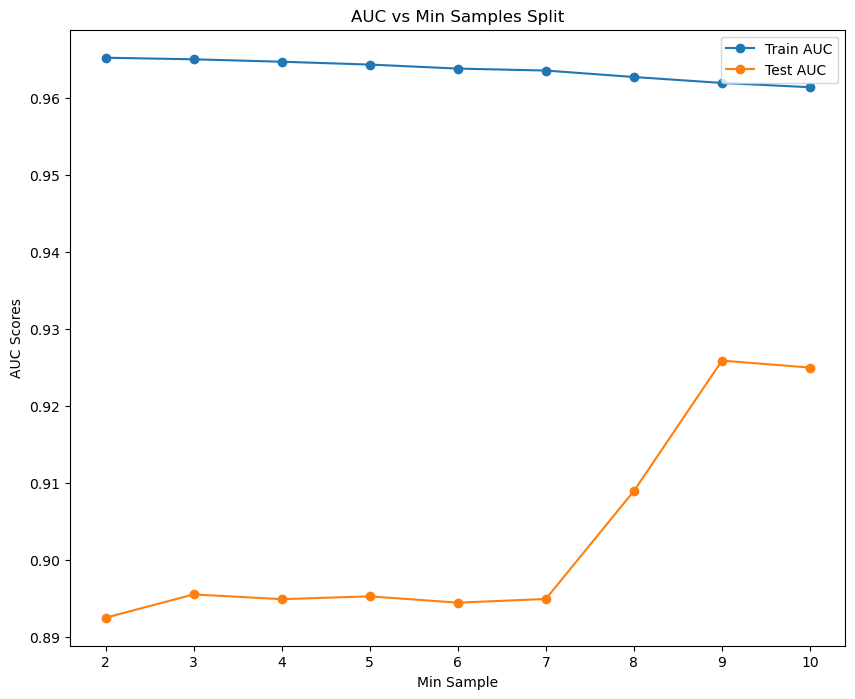

In [104]:
train_split_auc = []
test_split_auc = []

for split in min_sample_splits_value:
    clf_stop_split = DecisionTreeClassifier(random_state=33, min_samples_split=split,class_weight='balanced')
    clf_stop_split.fit(X_train_stops_encoded, y_train_stops)
    
    #predict
    y_train_split_prob = clf_stop_split.predict_proba(X_train_stops_encoded)[:,1]
    y_test_split_prob = clf_stop_split.predict_proba(X_test_stops_enconded)[:,1]
    
    y_train_split_pred = clf_stop_split.predict(X_train_stops_encoded)
    y_test_split_pred = clf_stop_split.predict(X_test_stops_enconded)
    
    # Calculate TPR and FPR
    fpr_split_train, tpr_split_train, _ = roc_curve(y_train_stops, y_train_split_prob)
    fpr_split_test, tpr_split_test, _ = roc_curve(y_test_stops, y_test_split_prob)
    
    
    #Calculate AUC
    train_split = auc(fpr_split_train, tpr_split_train)
    test_split = auc(fpr_split_test, tpr_split_test)
    
    train_split_auc.append(train_split)
    test_split_auc.append(test_split)
    
    print(f"Min Sample: {split}, Precision Score: {precision_score(y_test_stops, y_test_split_pred)}, F1-Score: {f1_score(y_test_stops, y_test_split_pred)}")


# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_split_auc, label="Train AUC", marker="o")
plt.plot(min_sample_splits_value, test_split_auc, label="Test AUC", marker="o")
plt.xlabel("Min Sample")
plt.ylabel("AUC Scores")
plt.title("AUC vs Min Samples Split")
plt.legend()
plt.show()    

Min Sample Split: 2, Precision_Score: 0.3740, Recall Score: 0.8963414634146342
Min Sample Split: 3, Precision_Score: 0.3747, Recall Score: 0.9024390243902439
Min Sample Split: 4, Precision_Score: 0.3728, Recall Score: 0.9024390243902439
Min Sample Split: 5, Precision_Score: 0.3728, Recall Score: 0.9024390243902439
Min Sample Split: 6, Precision_Score: 0.3709, Recall Score: 0.9024390243902439
Min Sample Split: 7, Precision_Score: 0.3719, Recall Score: 0.9024390243902439
Min Sample Split: 8, Precision_Score: 0.3747, Recall Score: 0.9207317073170732
Min Sample Split: 9, Precision_Score: 0.3792, Recall Score: 0.9573170731707317
Min Sample Split: 10, Precision_Score: 0.3813, Recall Score: 0.9695121951219512


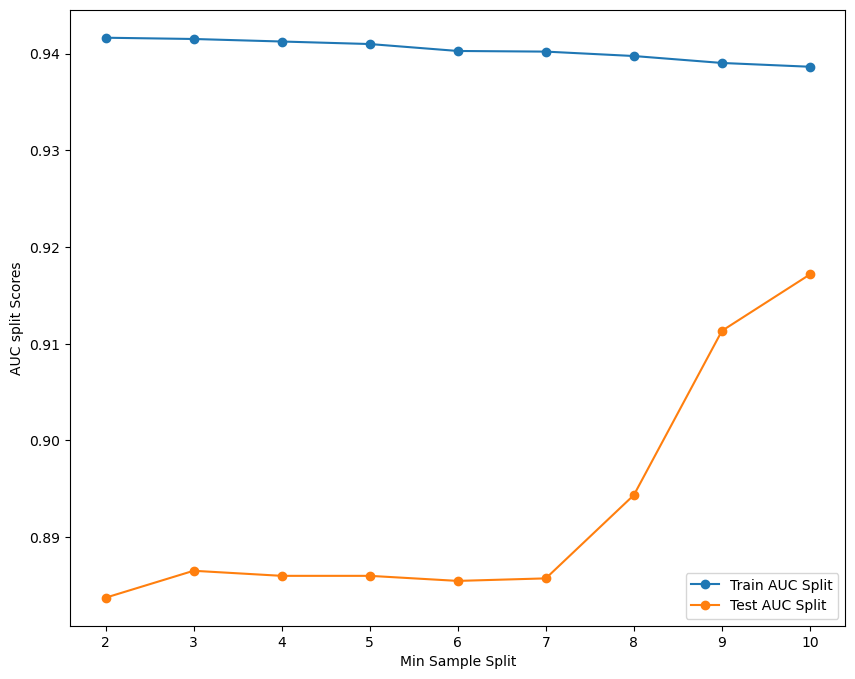

In [105]:
train_auc_stops_splits_thresh2 = []
test_auc_stops_splits_thresh2 = []


for split in min_sample_splits_value:
    clf_stop_split2 = DecisionTreeClassifier(min_samples_split=split, random_state=3, class_weight='balanced')
    clf_stop_split2.fit(X_train_stops_encoded, y_train_stops)

    # y_train_preds = clf_split.predict(X_train_encoded_df)
    # y_test_preds = clf_split.predict(X_test_encoded_df)
    y_train_stop_probs2 = clf_stop_split2.predict_proba(X_train_stops_encoded)[:,1]
    y_test_stop_probs2 = clf_stop_split2.predict_proba(X_test_stops_enconded)[:,1]
    
    y_train_stop_preds2 = (y_train_stop_probs2 >= 0.4).astype(int)
    y_test_stop_preds2 = (y_test_stop_probs2 >= 0.4).astype(int)

    fpr_train_stop_split2, tpr_train_stop_split2, _ = roc_curve(y_train_stops, y_train_stop_preds2)
    fpr_test_stop_split2, tpr_test_stop_split2, _ = roc_curve(y_test_stops, y_test_stop_preds2)

    train_auc_stop_split2 = auc(fpr_train_stop_split2, tpr_train_stop_split2)
    test_auc_stop_split2 = auc(fpr_test_stop_split2, tpr_test_stop_split2)
    
    train_auc_stops_splits_thresh2.append(train_auc_stop_split2)
    test_auc_stops_splits_thresh2.append(test_auc_stop_split2)
    print(f"Min Sample Split: {split}, Precision_Score: {precision_score(y_test_stops, y_test_stop_preds2):.4f}, Recall Score: {recall_score(y_test_stops, y_test_stop_preds2)}")


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value,  train_auc_stops_splits_thresh2, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value,  test_auc_stops_splits_thresh2, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.savefig('./images/sample_splits.png')
plt.show()

Min Leaf: 1, Precision Score: 0.5584415584415584, Recall Score: 0.2621951219512195
Min Leaf: 2, Precision Score: 0.5492957746478874, Recall Score: 0.23780487804878048
Min Leaf: 3, Precision Score: 0.5384615384615384, Recall Score: 0.25609756097560976
Min Leaf: 4, Precision Score: 0.5333333333333333, Recall Score: 0.24390243902439024
Min Leaf: 5, Precision Score: 0.5432098765432098, Recall Score: 0.2682926829268293


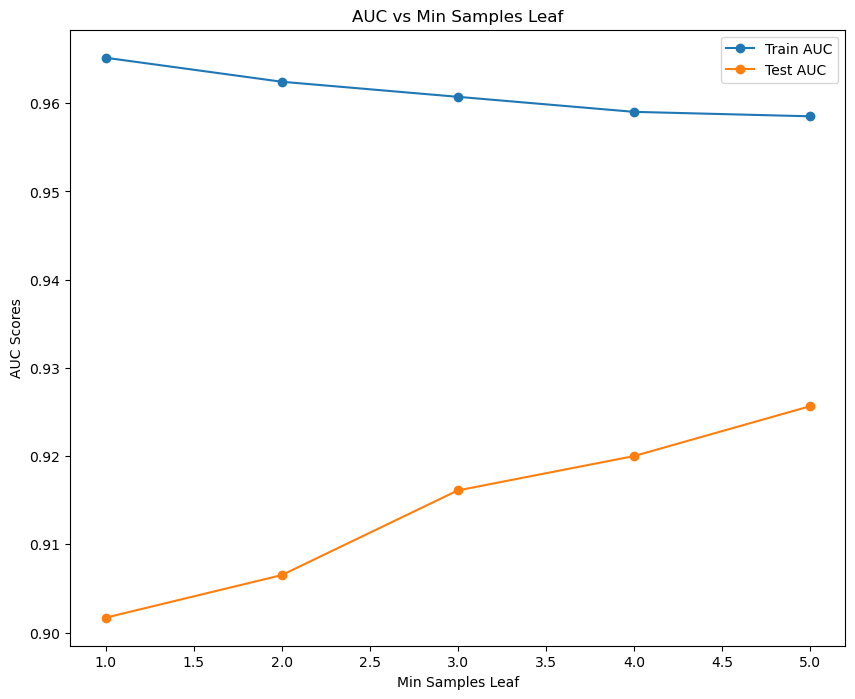

In [106]:
train_stop_leafs = []
test_stop_leafs = []

for leaf in min_sample_leafs_values:
    # Initialize DecisionTreeClassifier with the current min_samples_leaf value
    clf_stop_leaf = DecisionTreeClassifier(random_state=33, min_samples_leaf=leaf)
    clf_stop_leaf.fit(X_train_stops_encoded, y_train_stops)
    
    # Predicted probabilities for AUC calculation
    clf_stop_leaf_train_prob = clf_stop_leaf.predict_proba(X_train_stops_encoded)[:, 1]
    clf_stop_leaf_test_prob = clf_stop_leaf.predict_proba(X_test_stops_enconded)[:, 1]
    
    # Class predictions for precision and F1-score calculation
    clf_stop_leaf_train_pred = clf_stop_leaf.predict(X_train_stops_encoded)
    clf_stop_leaf_test_pred = clf_stop_leaf.predict(X_test_stops_enconded)
    
    # Compute ROC curve metrics
    fpr_stop_train_leaf, tpr_stop_train_leaf, _ = roc_curve(y_train_stops, clf_stop_leaf_train_prob)
    fpr_stop_test_leaf, tpr_stop_test_leaf, _ = roc_curve(y_test_stops, clf_stop_leaf_test_prob)
    
    # Compute AUC
    train_stop_leaf_auc = auc(fpr_stop_train_leaf, tpr_stop_train_leaf)
    test_stop_leaf_auc = auc(fpr_stop_test_leaf, tpr_stop_test_leaf)
    
    # Append AUC scores to respective lists
    train_stop_leafs.append(train_stop_leaf_auc)
    test_stop_leafs.append(test_stop_leaf_auc)
    
    # Print precision and F1-score
    
    print(f"Min Leaf: {leaf}, Precision Score: {precision_score(y_test_stops, clf_stop_leaf_test_pred)}, Recall Score: {recall_score(y_test_stops, clf_stop_leaf_test_pred)}")

# Plot AUC scores
plt.figure(figsize=(10, 8))
plt.plot(min_sample_leafs_values, train_stop_leafs, label="Train AUC", marker="o")
plt.plot(min_sample_leafs_values, test_stop_leafs, label="Test AUC", marker="o")
plt.xlabel("Min Samples Leaf")
plt.ylabel("AUC Scores")
plt.title("AUC vs Min Samples Leaf")
plt.legend()
plt.show()


In [107]:
train_auc_leafs2 = []
test_auc_leafs2 = []
for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_stop_leaf2 = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_stop_leaf2.fit(X_train_stops_encoded, y_train_stops)

    # y_train_leaf_pred = clf_leaf.predict(X_train_encoded_df)
    # y_test_leaf_pred = clf_leaf.predict(X_test_encoded_df)

    #predict probabilities
    y_train_leaf_pred_prob2 = clf_stop_leaf2.predict_proba(X_train_stops_encoded)[:,1]
    y_test_leaf_pred_prob2 = clf_stop_leaf2.predict_proba(X_test_stops_enconded)[:,1]
    
    y_train_leaf_pred2 = (y_train_leaf_pred_prob2 >= 0.4).astype(int)
    y_test_leaf_pred2 = (y_test_leaf_pred_prob2  >= 0.4).astype(int)

    # get the false positive and true positive values
    fpr_train_leaf2, tpr_train_leaf2, _ = roc_curve(y_train_stops, y_train_leaf_pred_prob2)
    fpr_test_leaf2, tpr_test_leaf2, _ = roc_curve(y_test_stops, y_test_leaf_pred_prob2)

    # Get the AUC
    train_auc_leaf_thres2 = auc(fpr_train_leaf2, tpr_train_leaf2)
    test_auc_leaf_thres2 = auc(fpr_test_leaf2, tpr_test_leaf2)

    train_auc_leafs2.append(train_auc_leaf_thres2)
    test_auc_leafs2.append(test_auc_leaf_thres2)
    
    print(f"Min Sample Leaf: {leaf}, Precision Score: {precision_score(y_test_stops, y_test_leaf_pred2)}, recall score: {recall_score(y_test_stops, y_test_leaf_pred2)}")

Min Sample Leaf: 1, Precision Score: 0.47183098591549294, recall score: 0.40853658536585363
Min Sample Leaf: 2, Precision Score: 0.4397163120567376, recall score: 0.3780487804878049
Min Sample Leaf: 3, Precision Score: 0.45714285714285713, recall score: 0.3902439024390244
Min Sample Leaf: 4, Precision Score: 0.4452054794520548, recall score: 0.39634146341463417
Min Sample Leaf: 5, Precision Score: 0.4421768707482993, recall score: 0.39634146341463417


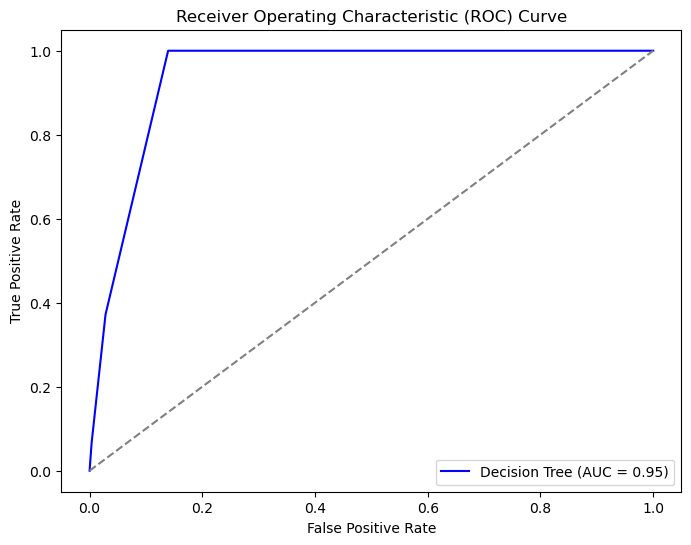

Optimized Decision Tree Performance:

Optimized Accuracy: 0.8716835504100338
Optimized Precision: 0.3813953488372093
Optimized Recall: 1.0
Optimized F1 Score: 0.5521885521885522
Optimized ROC AUC: 0.9423670290919777
Confusion Matrix:
 [[1643  266]
 [   0  164]]


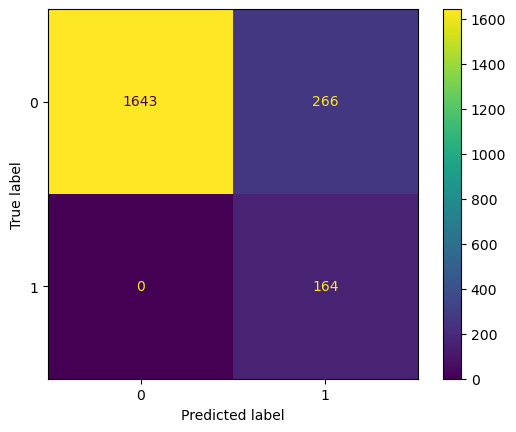

In [108]:
dt_stop_optimized = DecisionTreeClassifier(max_depth=10, 
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      criterion='entropy',
                                      random_state=9,
                                      class_weight='balanced').fit(X_train_stops_encoded, 
                                                          y_train_stops)

# dt_stop_optimized = DecisionTreeClassifier(max_depth=5, 
#                                       min_samples_split=2, 
#                                       min_samples_leaf=1, 
#                                       criterion='entropy',
#                                       random_state=9,
#                                       class_weight='balanced').fit(X_train_stops_scaled_df, 
#                                                           y_train_stops)


# Evaluate the model
y_stop_probability_optimized = dt_stop_optimized.predict_proba(X_test_stops_enconded)[:, 1]

fpr_stop, tpr_stop, _ = roc_curve(y_test_stops, y_stop_probability_optimized)
roc_stop_auc = roc_auc_score(y_test_stops, y_stop_probability_optimized)


# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stop, tpr_stop, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('./images/optimized_ROC_Curve.png')
plt.show()

# y_pred_optimized = dt_optimized.predict(X_test_encoded_df)
y_stop_pred_optimized = (y_stop_probability_optimized >= 0.4).astype(int)

print("Optimized Decision Tree Performance:\n")
print(f"Optimized Accuracy: {accuracy_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized Precision: {precision_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized Recall: {recall_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized F1 Score: {f1_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized ROC AUC: {roc_stop_auc}")


print(f"Confusion Matrix:\n {confusion_matrix(y_test_stops,y_stop_pred_optimized)}")

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_stop_pred_optimized)

In [109]:
y_train_stops.value_counts()

arrest_flag
0    7661
1     631
Name: count, dtype: int64

As stated earlier, we a total of 631 cases that were arrests, but of those arrests, 237 cases included a frisk. Becuase this dataset is imbalanced, we will aim to double the amount of the minority cases and try to find the best possible model from the synthetic data.

In [110]:
from imblearn.over_sampling import SMOTE
subset_count = pd.Series(y_train_stops).value_counts()
majority_count = subset_count[0]
minority_count = subset_count[1]

#double the minority class
target_minority_count = minority_count * 2

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy={0: majority_count, 1:target_minority_count})
# smote = SMOTE(random_state=33, sampling_strategy=0.5)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_stops_encoded, y_train_stops)

# Check the resampled class distribution
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())



Resampled class distribution: arrest_flag
0    7661
1    1262
Name: count, dtype: int64


In [111]:
print('Original Class Distribution:\n')
print(y.value_counts())

print('--------------------------------------------')
print('Synthetic Sample Class Distributions: \n')
print(pd.Series(y_train_resampled).value_counts())


Original Class Distribution:

Arrest Flag
0    54851
1     6704
Name: count, dtype: int64
--------------------------------------------
Synthetic Sample Class Distributions: 

arrest_flag
0    7661
1    1262
Name: count, dtype: int64


Compared to the original dataset, the subset has a ratio of 6:1, after perfoming Smote.

In [112]:
smote2 = SMOTE(random_state=33)

X_train_resample2, y_train_resample2 = smote2.fit_resample(X_train_stops_encoded, y_train_stops)

print("Resampled class distribution:", pd.Series(y_train_resample2).value_counts())

Resampled class distribution: arrest_flag
0    7661
1    7661
Name: count, dtype: int64


Just to be curious, we'll perform normal smote to compare models

Precision Score: 37.76%
Recall: 88.41%
F1-Score: 52.92%
[[1670  239]
 [  19  145]]


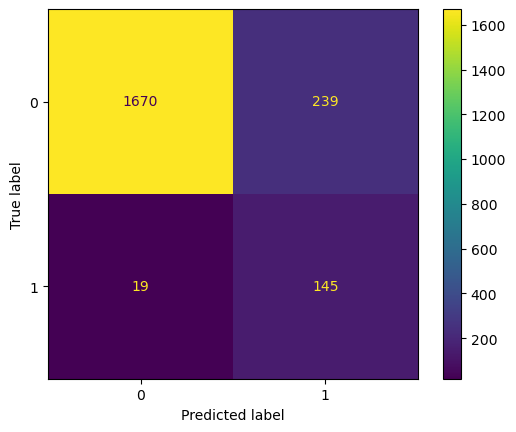

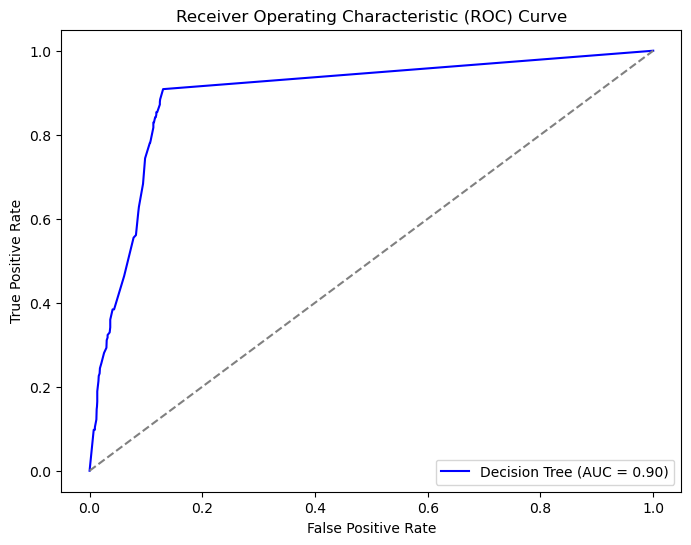

In [113]:
# Initialize and train the Decision Tree classifier with the resampled training dataset.
# The classifier uses the Gini impurity criterion and balanced class weights to handle class imbalance.
dt_resampled = DecisionTreeClassifier(random_state=33, criterion='gini', class_weight='balanced').fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using the trained model
y_pred_resampled = dt_resampled.predict(X_test_stops_enconded)

# Calculate and print various evaluation metrics: accuracy, precision, recall, and F1-score.
resampled_accuracy = accuracy_score(y_test_stops, y_pred_resampled)
resampled_precision = precision_score(y_test_stops, y_pred_resampled)
resample_recall = recall_score(y_test_stops, y_pred_resampled)
resample_f1 = f1_score(y_test_stops, y_pred_resampled)

# Print precision, recall, and F1 scores in percentage format
print(f"Precision Score: {resampled_precision * 100:.2f}%")
print(f"Recall: {resample_recall * 100:.2f}%")
print(f"F1-Score: {resample_f1 * 100:.2f}%")

# Display the confusion matrix to see the performance of the model on the test set
print(confusion_matrix(y_test_stops, y_pred_resampled))

# Visualize the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_resampled)


# Evaluate the model by getting the predicted probabilities for the positive class (class 1)
y_stop_resampled_probability = dt_resampled.predict_proba(X_test_stops_enconded)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_stops, y_stop_resampled_probability)

# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_resampled_auc = roc_auc_score(y_test_stops, y_stop_resampled_probability)

# Calculate Precision-Recall curve values
precision, recall, _ = precision_recall_curve(y_test_stops, y_pred_resampled)

# Plot the ROC curve with the FPR and TPR values
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', label=f'Decision Tree (AUC = {roc_resampled_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the axes and give the plot a title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Display the legend in the lower-right corner
plt.legend(loc="lower right")

# Show the plot
plt.show()



After tackling the imbalance issue, we can that the model is correctly identifying 875 of actual True Postive cases, Arrests. 

But, precision is low at 37%, meaning that its only correct 37% of the time. The model is making false positive predicitons.

Prediciting cases where the individual is arrested but shouldn't be arrested

Accuracy: 86.59%
Precision Score: 37.10%
Recall: 100.00%
F1-Score: 54.13%
[[1631  278]
 [   0  164]]


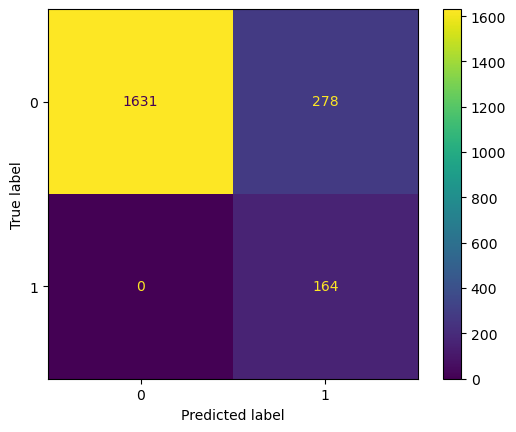

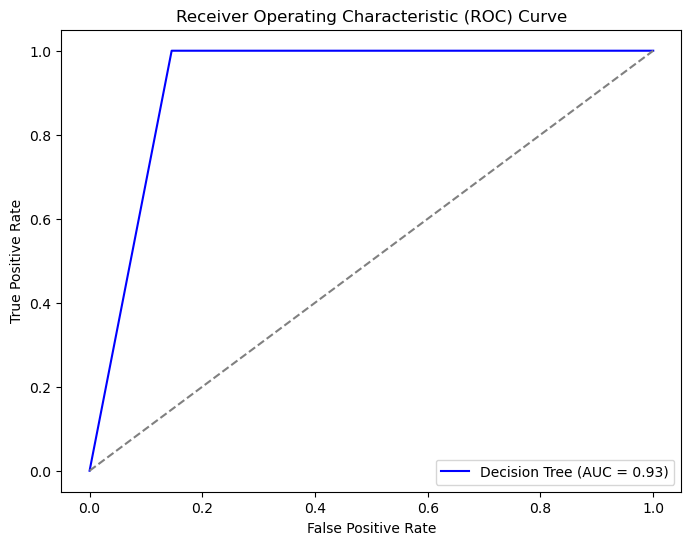

In [114]:
# Initialize and train the Decision Tree classifier using the 'entropy' criterion, 
# with a max depth of 5 and balanced class weights to handle class imbalance.
dt_resampled2 = DecisionTreeClassifier(random_state=33, criterion='entropy', max_depth=5, class_weight='balanced').fit(X_train_resample2, y_train_resample2)

# Make predictions on the test set using the trained model
y_pred_resampled2 = dt_resampled2.predict(X_test_stops_enconded)

# Calculate and print various evaluation metrics: accuracy, precision, recall, and F1-score.
resampled_accuracy2 = accuracy_score(y_test_stops, y_pred_resampled2)
resampled_precision2 = precision_score(y_test_stops, y_pred_resampled2)
resample_recall2 = recall_score(y_test_stops, y_pred_resampled2)
resample_f12 = f1_score(y_test_stops, y_pred_resampled2)

# Print the evaluation metrics (accuracy, precision, recall, F1-score) in percentage format
print(f"Accuracy: {resampled_accuracy2 * 100:.2f}%")
print(f"Precision Score: {resampled_precision2 * 100:.2f}%")
print(f"Recall: {resample_recall2 * 100:.2f}%")
print(f"F1-Score: {resample_f12 * 100:.2f}%")

# Display the confusion matrix to see the performance of the model on the test set
print(confusion_matrix(y_test_stops, y_pred_resampled2))

# Visualize the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_resampled2)


# Evaluate the model by getting the predicted probabilities for the positive class (class 1)
y_stop_resampled_probability2 = dt_resampled2.predict_proba(X_test_stops_enconded)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_resampled2, tpr_resampled2, _ = roc_curve(y_test_stops, y_stop_resampled_probability2)

# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_resampled_auc2 = roc_auc_score(y_test_stops, y_stop_resampled_probability2)

# Plot the ROC curve with the FPR and TPR values
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled2, tpr_resampled2, color='blue', label=f'Decision Tree (AUC = {roc_resampled_auc2:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the axes and give the plot a title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Display the legend in the lower-right corner
plt.legend(loc="lower right")

# Show the plot
plt.show()


SMOTE optimized Decision Tree: 

Accuracy: 87.36%
Precision Score: 38.44%
Recall: 99.39%
F1-Score: 55.44%

Confusion Matrix (SMOTE)
[[1648  261]
 [   1  163]]
SMOTE Optimized ROC AUC: 0.939271933971304


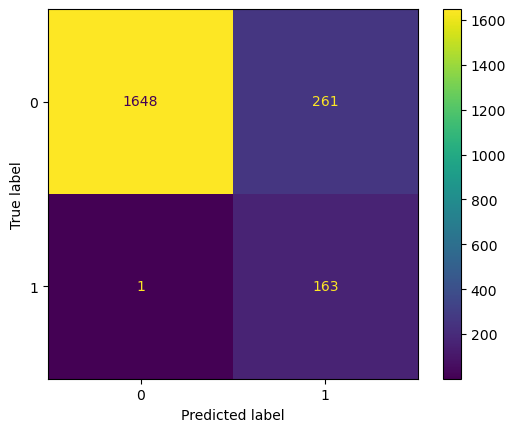

In [115]:
# Initialize and train the Decision Tree classifier with optimized hyperparameters 
# for a balanced class distribution using SMOTE resampled data
dt_optimized_smote = DecisionTreeClassifier(
    max_depth=15,            # Limit the tree depth to 15 to prevent overfitting
    min_samples_split=2,     # Minimum number of samples required to split a node
    min_samples_leaf=1,      # Minimum number of samples required at a leaf node
    criterion='gini',       # Use Gini impurity for split evaluation
    class_weight='balanced', # Adjust class weights to handle class imbalance
    random_state=33          # Set the random seed for reproducibility
).fit(X_train_resampled, y_train_resampled)  # Train the model using the resampled data

# Get the predicted probabilities for the positive class (class 1) on the test data
y_prob_smote = dt_optimized_smote.predict_proba(X_test_stops_enconded)[:, 1]

# Calculate the ROC AUC score for the model
smote_roc_auc_score = roc_auc_score(y_test_stops, y_prob_smote)

# Convert probabilities into binary predictions (1 for probabilities >= 0.5, else 0)
y_pred_smote = (y_prob_smote >= 0.5).astype(int)

# Print evaluation metrics: accuracy, precision, recall, and F1-score
print('SMOTE optimized Decision Tree: \n')
print(f"Accuracy: {accuracy_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"Recall: {recall_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test_stops, y_pred_smote) * 100:.2f}%\n")

# Print and display the confusion matrix for the predictions
print('Confusion Matrix (SMOTE)')
cm = confusion_matrix(y_test_stops, y_pred_smote)
print(cm)

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_smote)

# Print the ROC AUC score of the model
print(f'SMOTE Optimized ROC AUC: {smote_roc_auc_score}')


Our Recall score span from 80% to 100%. Lets find the avg of them all and use them in a model.

In [116]:
# List of recall scores from different models or configurations (this part is already given)
recall_scores = [0.52,0.88,.99,1.0,1.0,1.0,0.93,0.95,0.88]

# Calculate the average recall score
avg_recall = np.mean(recall_scores)
print(f"Average Recall Score: {avg_recall:.2f}")



Average Recall Score: 0.91


Model Recall (max_depth=3): 1.00
Model Recall (max_depth=3): 0.35
Confusion Matrix for model with max_depth=3:
[[1603  306]
 [   0  164]]


Model with max_depth=3 passed the average recall threshold
Model Recall (max_depth=5): 1.00
Model Recall (max_depth=5): 0.37
Confusion Matrix for model with max_depth=5:
[[1631  278]
 [   0  164]]


Model with max_depth=5 passed the average recall threshold
Model Recall (max_depth=7): 0.95
Model Recall (max_depth=7): 0.37
Confusion Matrix for model with max_depth=7:
[[1639  270]
 [   8  156]]


Model with max_depth=7 passed the average recall threshold
Model Recall (max_depth=9): 0.97
Model Recall (max_depth=9): 0.38
Confusion Matrix for model with max_depth=9:
[[1645  264]
 [   5  159]]


Model with max_depth=9 passed the average recall threshold
Model Recall (max_depth=11): 0.95
Model Recall (max_depth=11): 0.38
Confusion Matrix for model with max_depth=11:
[[1655  254]
 [   8  156]]


Model with max_depth=11 passed the average recall threshold
B

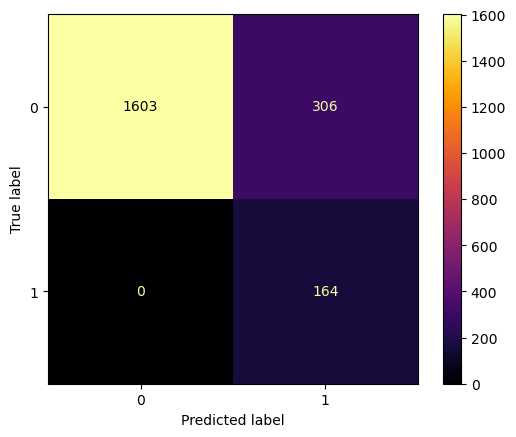

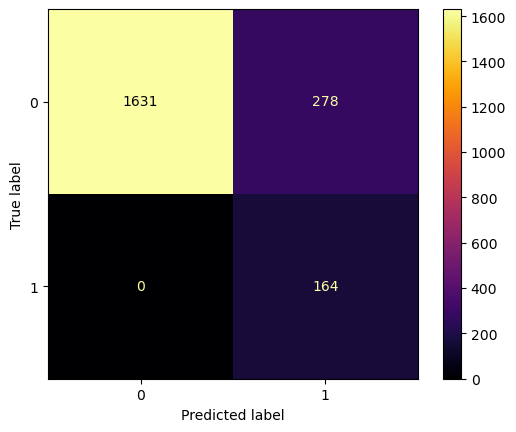

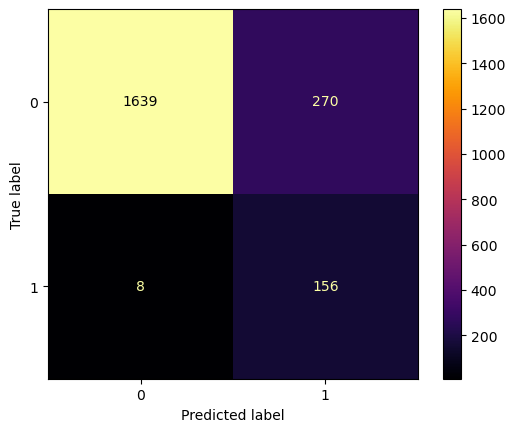

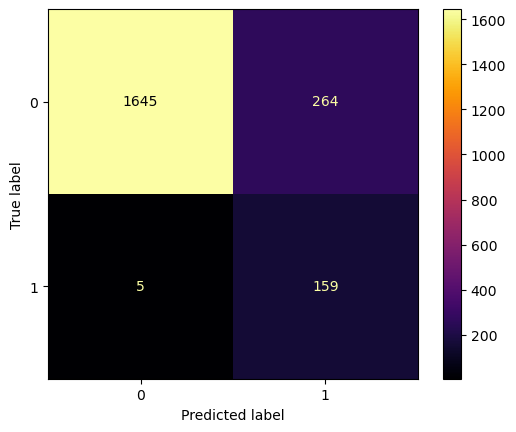

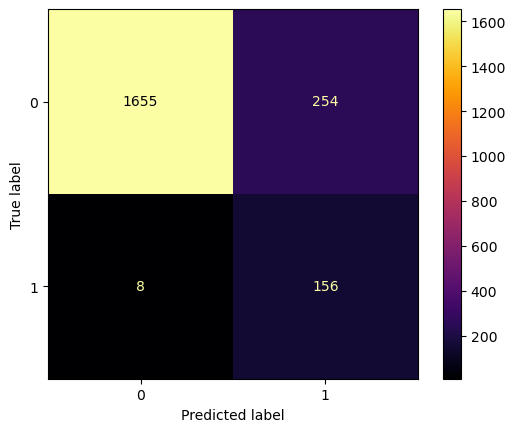

In [117]:
# Example models and their configurations
models = [
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=7),
    DecisionTreeClassifier(max_depth=9),
    DecisionTreeClassifier(max_depth=11),
]

# Initialize best recall with a low value (-1) to ensure any recall score will be better
best_recall = -1
best_model = None

# Evaluate each model
for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_stops_enconded)
    
    # Calculate recall and precision score
    model_recall = recall_score(y_test_stops, y_pred)
    model_precision = precision_score(y_test_stops, y_pred)
    print(f"Model Recall (max_depth={model.max_depth}): {model_recall:.2f}")
    print(f"Model Recall (max_depth={model.max_depth}): {model_precision:.2f}")
    
     # Generate confusion matrix
    cm = confusion_matrix(y_test_stops, y_pred)
    print(f"Confusion Matrix for model with max_depth={model.max_depth}:")
    print(cm)
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='inferno')  # You can change the colormap
    print("\n")
    
    # Compare model recall with the average recall score
    if model_recall >= avg_recall:
        print(f"Model with max_depth={model.max_depth} passed the average recall threshold")
        
        # Compare and select the best model based on recall
        if model_recall > best_recall:
            best_recall = model_recall
            best_model = model

# Output the best model and its recall score
if best_model is not None:
    print(f"Best Model Recall: {best_recall:.2f}")
    print(f"Best Model: {best_model}")
else:
    print("No model passed the average recall threshold.")

In [118]:
from sklearn.model_selection import cross_validate

# Use cross-validation with recall as the scoring metric
recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

# Display the recall scores for each fold
print("Recall Scores from Each Fold: ", recall_scores)

# Calculate and print the average recall score across all folds
avg_recall = np.mean(recall_scores)
print(f"Average Recall from Cross-Validation: {avg_recall:.2f}")

# Optionally, perform cross-validation with multiple metrics (e.g., recall and accuracy)
cv_results = cross_validate(model, X_train_resampled, y_train_resampled, cv=5, scoring=['recall'])

# Display the detailed results (e.g., recall and accuracy for each fold)
print("Cross-Validation Results (Recall):")
# print("Recall Scores:", cv_results['test_recall'])
# print("Accuracy Scores:", cv_results['test_accuracy'])

# Calculate and print the average recall and accuracy scores
avg_recall = np.mean(cv_results['test_recall'])
# avg_accuracy = np.mean(cv_results['test_accuracy'])


Recall Scores from Each Fold:  [0.87301587 0.92885375 0.743083   0.99603175 0.98412698]
Average Recall from Cross-Validation: 0.91
Cross-Validation Results (Recall):


# Evaluation

The goal of this evaluation is to compare several Decision Tree models with varying maximum depths to identify the best-performing model. The primary focus is on maximizing recall, as it minimizes false negatives, which might be crucial depending on the problem's requirements. Additional metrics such as accuracy, precision, F1-score, and ROC AUC are also considered for a comprehensive evaluation.
Performance Metrics

The following metrics are used to evaluate each model:

Accuracy: Measures the proportion of correctly predicted instances out of all instances.
Precision: Indicates how many of the predicted positive cases are true positives. High precision reduces false positives.
Recall: Measures how many of the actual positive cases are correctly identified. High recall reduces false negatives.
F1-Score: The harmonic mean of precision and recall, offering a balanced evaluation metric.
Confusion Matrix: Provides a breakdown of true positives, false positives, true negatives, and false negatives, offering insights into model errors.
ROC Curve and AUC: The ROC curve visualizes the model's ability to distinguish between classes, and the Area Under the Curve (AUC) quantifies this performance.

**Evaluation Process**

Training and Prediction: Each model is trained on the resampled training dataset and tested on the same test dataset.
Metric Calculation: For each model, the following metrics are calculated:
    Accuracy
    Precision
    Recall
    F1-Score
    ROC AUC
Confusion Matrix Visualization: The confusion matrix is plotted for each model to understand the distribution of errors.
ROC Curve: The ROC curve is plotted for each model, along with its AUC score, to evaluate its performance across all classification thresholds.
Best Model Selection: Models are compared based on their recall scores. The model with the highest recall is selected as the best model. If recall scores are tied, secondary metrics such as F1-score or AUC are used to break the tie.

**Observations**
Performance of Each Model

Models with varying max_depth were tested, ranging from 3 to 11.
Recall scores were prioritized to minimize false negatives.
The confusion matrix for each model revealed the distribution of predictions, highlighting areas of improvement.
ROC curves provided insights into how well each model discriminated between positive and negative classes.



Optimized Decision Tree Performance:

Optimized Accuracy: 0.8844935423604906
Optimized Precision: 0.48522437066763957
Optimized Recall: 0.9917971662938105
Optimized F1 Score: 0.651641352278295
Optimized ROC AUC: 0.9493455815025319
Confusion Matrix:
 [[9559 1411]
 [  11 1330]]


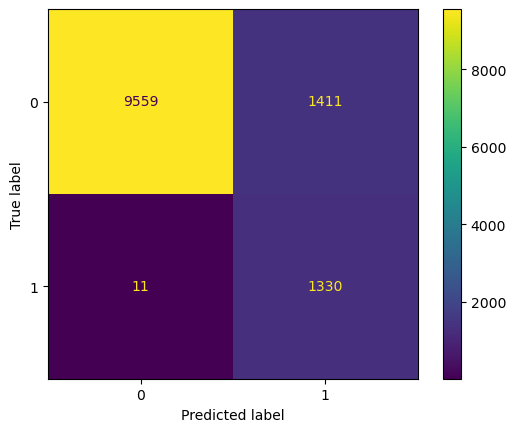

In [119]:
print("Optimized Decision Tree Performance:\n")
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print(f"Optimized Precision: {precision_score(y_test, y_pred_optimized)}")
print(f"Optimized Recall: {recall_score(y_test, y_pred_optimized)}")
print(f"Optimized F1 Score: {f1_score(y_test, y_pred_optimized)}")
print(f"Optimized ROC AUC: {roc_auc}")

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_optimized)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized)
plt.savefig('./images/confusion_matrix.png')

SMOTE optimized Decistion Tree: 

Accuracy: 87.36%
Precision Score: 38.44%
Recall: 99.39%
F1-Score:55.44%

Confusion Matrix (SMOTE)
[[1648  261]
 [   1  163]]
Smote Optimized ROC AUC: 0.939271933971304


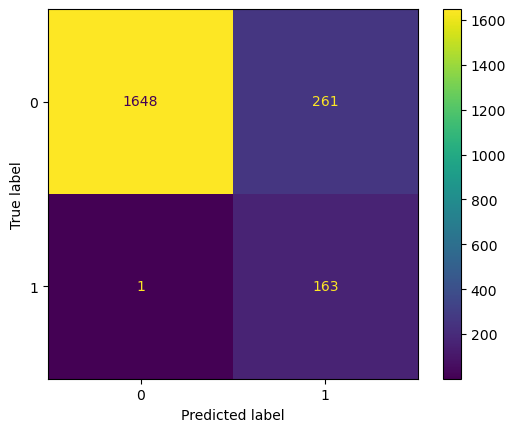

In [120]:
print('SMOTE optimized Decistion Tree: \n')
print(f"Accuracy: {accuracy_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"Recall: {recall_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"F1-Score:{f1_score(y_test_stops, y_pred_smote)* 100:.2f}%\n")

print('Confusion Matrix (SMOTE)')
cm = confusion_matrix(y_test_stops, y_pred_smote)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_smote)
print(f'Smote Optimized ROC AUC: {smote_roc_auc_score}')

Model with max_depth=3
Accuracy: 85.24%
Precision: 34.89%
Recall: 100.00%
F1-Score: 51.74%
ROC AUC: 0.92
Confusion Matrix for max_depth=3:
[[1603  306]
 [   0  164]]


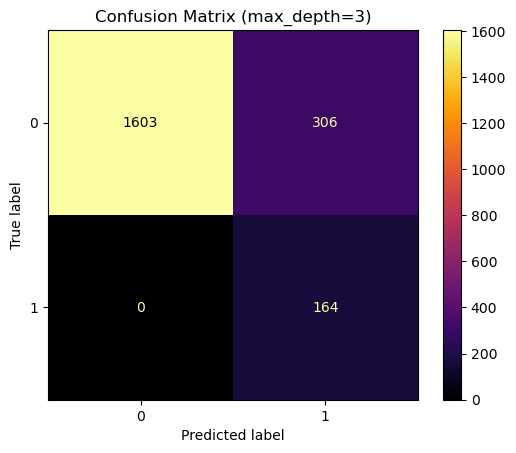

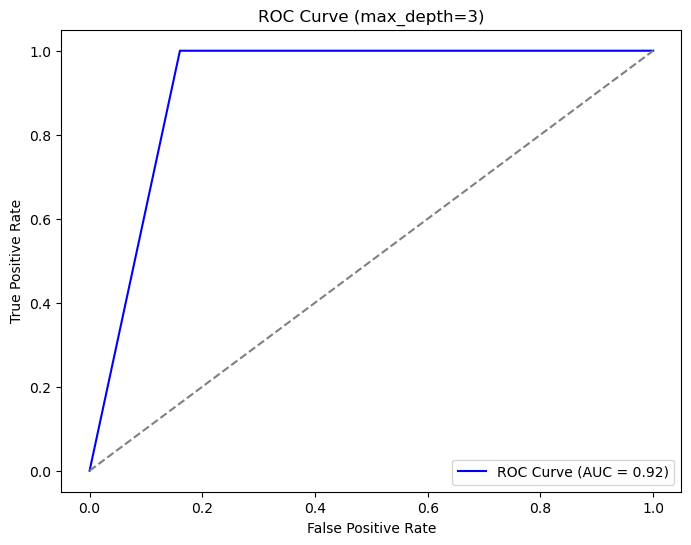

Model with max_depth=5
Accuracy: 86.59%
Precision: 37.10%
Recall: 100.00%
F1-Score: 54.13%
ROC AUC: 0.93
Confusion Matrix for max_depth=5:
[[1631  278]
 [   0  164]]


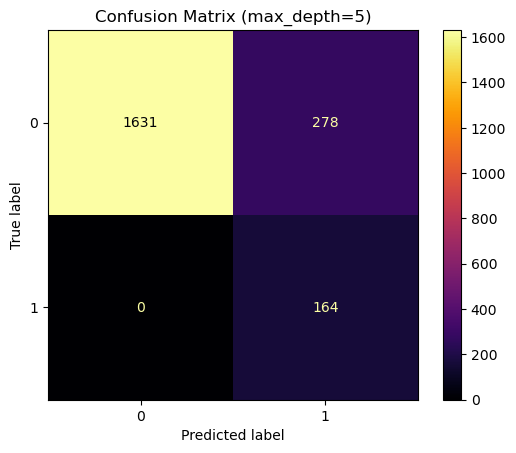

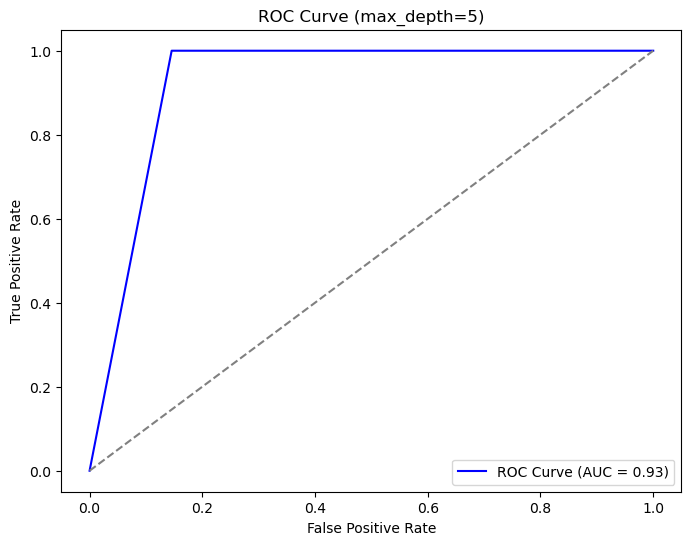

Model with max_depth=7
Accuracy: 86.59%
Precision: 36.62%
Recall: 95.12%
F1-Score: 52.88%
ROC AUC: 0.93
Confusion Matrix for max_depth=7:
[[1639  270]
 [   8  156]]


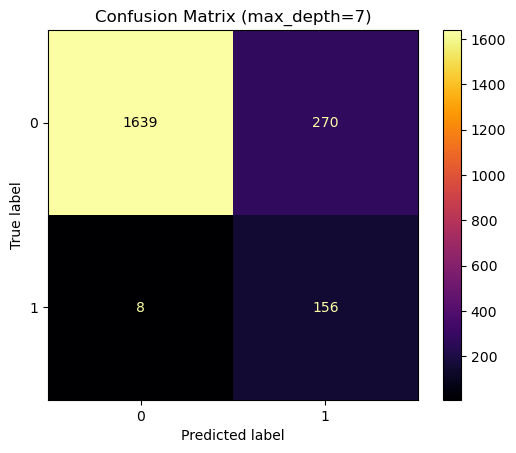

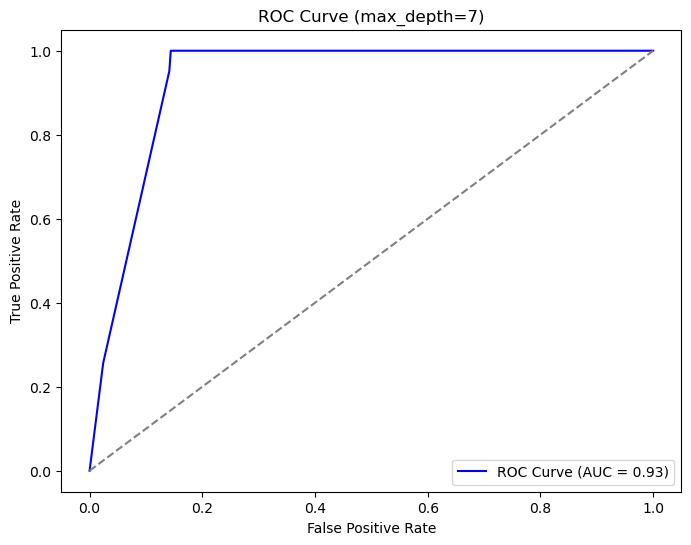

Model with max_depth=9
Accuracy: 87.02%
Precision: 37.59%
Recall: 96.95%
F1-Score: 54.17%
ROC AUC: 0.94
Confusion Matrix for max_depth=9:
[[1645  264]
 [   5  159]]


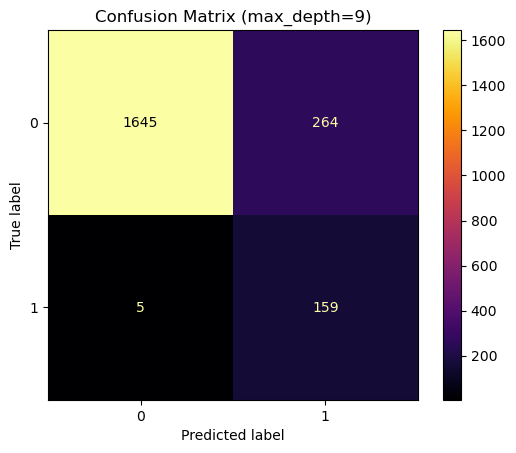

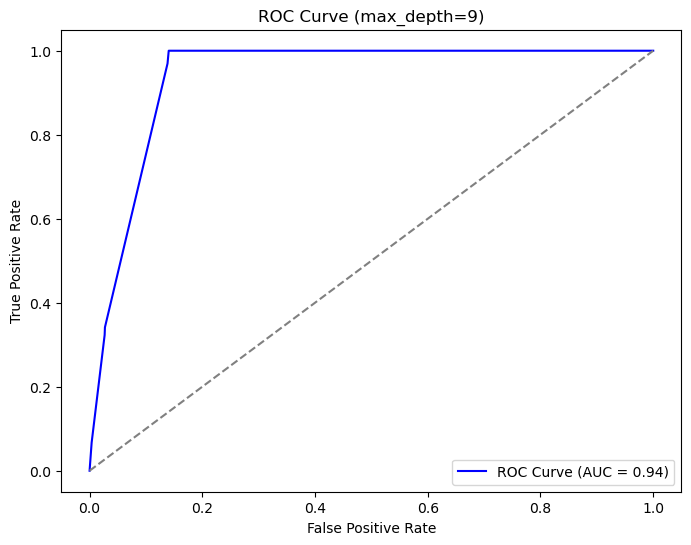

Model with max_depth=11
Accuracy: 87.36%
Precision: 38.05%
Recall: 95.12%
F1-Score: 54.36%
ROC AUC: 0.94
Confusion Matrix for max_depth=11:
[[1655  254]
 [   8  156]]


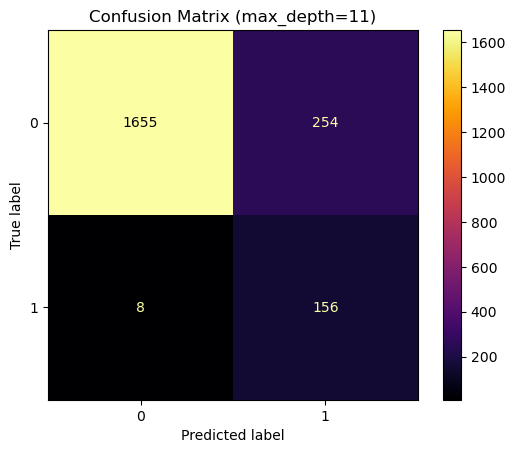

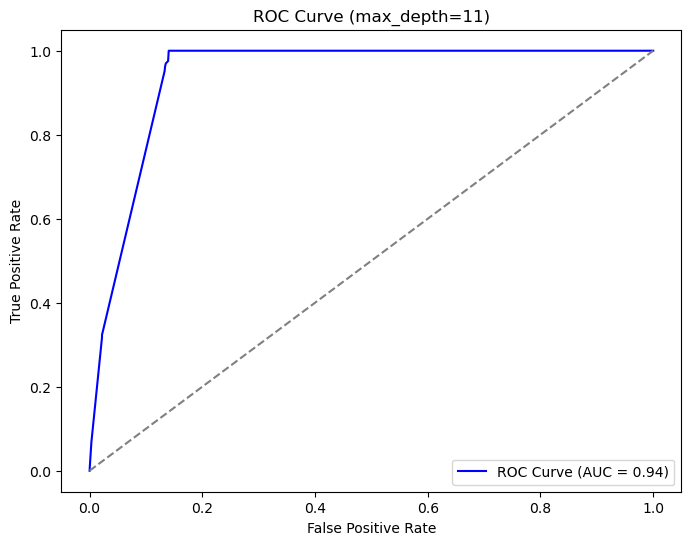

Best Model: max_depth=3 with Recall: 1.00


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize best recall with a low value (-1) to ensure any recall score will be better
best_recall = -1
best_model = None

# Iterate through models with different max_depths
for model in models:
    # Train the model with resampled data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict using the trained model
    y_pred = model.predict(X_test_stops_enconded)
    
    # Calculate performance metrics
    model_accuracy = accuracy_score(y_test_stops, y_pred)
    model_precision = precision_score(y_test_stops, y_pred)
    model_recall = recall_score(y_test_stops, y_pred)
    model_f1 = f1_score(y_test_stops, y_pred)
    
    # Calculate ROC Curve and AUC
    y_pred_proba = model.predict_proba(X_test_stops_enconded)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test_stops, y_pred_proba)
    roc_auc = roc_auc_score(y_test_stops, y_pred_proba)
    
    # Print performance metrics
    print(f"Model with max_depth={model.max_depth}")
    print(f"Accuracy: {model_accuracy * 100:.2f}%")
    print(f"Precision: {model_precision * 100:.2f}%")
    print(f"Recall: {model_recall * 100:.2f}%")
    print(f"F1-Score: {model_f1 * 100:.2f}%")
    print(f"ROC AUC: {roc_auc:.2f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test_stops, y_pred)
    print(f"Confusion Matrix for max_depth={model.max_depth}:")
    print(cm)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='inferno')
    plt.title(f"Confusion Matrix (max_depth={model.max_depth})")
    plt.show()
    
    # ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (max_depth={model.max_depth})')
    plt.legend(loc="lower right")
    plt.show()
    
    # Compare model recall with the best recall seen so far
    if model_recall > best_recall:
        best_recall = model_recall
        best_model = model

# Output the best model based on recall
if best_model is not None:
    print(f"Best Model: max_depth={best_model.max_depth} with Recall: {best_recall:.2f}")
else:
    print("No model met the recall threshold.")


**Key Findings**

Models with lower max_depth tended to underfit the data, resulting in lower recall and F1-scores.
As max_depth increased, recall improved; however, deeper models risked overfitting, as indicated by diminishing returns in ROC AUC and precision.
The best-performing model was selected based on the highest recall score while balancing other metrics like F1-score and AUC.

**Results**

The selected best model had the following characteristics:

    Maximum Depth: 3
    Recall: 97%

## Next Steps


Based on the model's performance, the following steps are recommended:

* Compared to the initial logistic regression model. The model performance overall is doing well when determining True Positive cases from False Negative cases.

* We want to improve our data collection.

* Accurately record Stops and Incidents.

* Refine the Model with the additional data.

This will help determine the models performance for other metrics. Diminshing the number of false positive cases and possibly address the imbalance issue.

## Conclusion

 The model helped identify the most suitable Decision Tree model for the task. By prioritizing recall, the selected model effectively minimizes false negatives, making it appropriate for scenarios where failing to identify positive cases, Arrests, has high consequences.